## Import modules

In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from scripts.data_loader import load_data, load_excel_data
from scripts.db_utils import fetch_data_from_db
from scripts.data_visualization import plot_column_frequency, plot_histograms, plot_graphical_analysis, bivariate_analysis, plot_correlation_matrix, plot_correlation_matrix, analyze_correlation
from scripts.analysis import top_10_handsets, top_3_handset_manufacturers, top_5_handsets_per_top_3_manufacturers, aggregate_user_behavior, segment_users_by_decile, calculate_basic_metrics, analyze_opportunities, analyze_dispersion, preprocess_data, apply_pca
from scripts.sql_query import get_user_data_query
from scripts.analysis import missing_values_table, convert_columns_to_mb,apply_ms_to_sec_and_drop

## Data Loading

In [4]:
# Define your query
query = "SELECT * FROM xdr_data;"  # Replace with the table or query you want

# Fetch data
data_tel = fetch_data_from_db(query)

# Display the data
if data_tel is not None:
    print(data_tel.head())
else:
    print("Failed to fetch data.")

c:\Users\fikad\Desktop\DESKTOP\10acedamy\Week_2\scripts\db_utils.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [5]:
data_tel

Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...        1.585461e+07        2.501332e+06   
1                     L77566A  ...        2.024740e+07        1.911173e+07   
2                     D42335A  ...        1.972566e+07        1.469958e+07   
3                     T21824A  ...        2.138812e+07        1.514664e+07   
4                     D88865A  ...        1.525938e+07        1.896287e+07   
...                       ...  ...                 ...                 ...   
149996                D20434A  ...        1.619167e+07        1.176343e+07   
149997                D10223C  ...        1.387723e+07        8.288284e+06   
149998                T51102A  ...        2.266051e+07        1.855903e+06   
149999                L88342B  ...        8.817106e+06        8.305402e+06   
150000                   None  ...        1.163407e+07        1.100941e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8.198936e+06        9.656251e+06       2.780823e+08   
1             1.833841e+07        1.722713e+07       6.087501e+08   
2             1.758779e+07        6.163408e+06       2.295846e+08   
3             1.399465e+07        1.097942e+06       7.995382e+08   
4             1.712458e+07        4.152180e+05       5.277072e+08   
...                    ...                 ...                ...   
149996        1.788370e+07        1.967816e+07       5.266097e+08   
149997        1.935015e+07        2.129315e+07       6.268931e+08   
149998        9.963942e+06        5.065760e+06       5.535395e+08   
149999        3.322253e+06        1.317259e+07       3.525370e+08   
150000        1.162685e+07        1.100175e+07       4.220447e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07      1.717444e+08      8.814393e+06   
1            1.170709e+06      5.269042e+08      1.505514e+07   
2            3.956300e+05      4.106926e+08      4.215763e+06   
3            1.084972e+07      7.490399e+08      1.279728e+07   
4            3.529801e+06      5.507095e+08      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06      3.264510e+06      1.348742e+07   
149997       4.735033e+06      7.121804e+08

In [18]:
# Load the dataset
data_tel = load_data(r'C:\Users\fikad\Desktop\10acedamy\Week_2\Data\Copy of Week2_challenge_data_source(CSV).csv')
data_tel.head(2)

Bearer Id           Start  Start ms              End  End ms  Dur. (ms)  \
0  1.311448e+19  4/4/2019 12:01     770.0  4/25/2019 14:35   662.0  1823652.0   
1  1.311448e+19  4/9/2019 13:04     235.0   4/25/2019 8:15   606.0  1365104.0   

           IMSI  MSISDN/Number          IMEI     Last Location Name  ...  \
0  2.082014e+14   3.366496e+10  3.552121e+13  9.16456699548519E+015  ...   
1  2.082019e+14   3.368185e+10  3.579401e+13                L77566A  ...   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2501332.0           8198936.0   
1          20247395.0          19111729.0          18338413.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  

[2 rows x 55 columns]

In [6]:
data_tel.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [18]:
# Load the dataset
data_tel_xls = load_excel_data(r'C:\Users\fikad\Desktop\10acedamy\Week_2\Data\Week2_challenge_data_source.xlsx')
data_tel_xls.head(2)

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0   
1            L77566A  ...          20247395.0          19111729.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  

[2 rows x 55 columns]

In [34]:
data_tel.shape

(150001, 55)

In [20]:
# Load the dataset
data_describe = load_excel_data(r'C:\Users\fikad\Desktop\10acedamy\Week_2\Data\Field Descriptions.xlsx')
data_describe.head(2)

Fields                        Description
0  bearer id             xDr session identifier
1  Dur. (ms)  Total Duration of the xDR (in ms)

### checking data types

In [21]:
print(data_tel.dtypes)


Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [6]:
transformed_data_tel = data_tel.copy()
# Example usage
columns_to_convert = ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                      'Activity Duration DL (ms)', 'Activity Duration UL (ms)']

apply_ms_to_sec_and_drop(columns_to_convert, transformed_data_tel)

Bearer Id            Start              End          IMSI  \
0       1.311448e+19   4/4/2019 12:01  4/25/2019 14:35  2.082014e+14   
1       1.311448e+19   4/9/2019 13:04   4/25/2019 8:15  2.082019e+14   
2       1.311448e+19   4/9/2019 17:42  4/25/2019 11:58  2.082003e+14   
3       1.311448e+19   4/10/2019 0:31   4/25/2019 7:36  2.082014e+14   
4       1.311448e+19  4/12/2019 20:10  4/25/2019 10:40  2.082014e+14   
...              ...              ...              ...           ...   
149996  7.277826e+18   4/29/2019 7:28   4/30/2019 6:02  2.082022e+14   
149997  7.349883e+18   4/29/2019 7:28  4/30/2019 10:41  2.082019e+14   
149998  1.311448e+19   4/29/2019 7:28  4/30/2019 10:46  2.082017e+14   
149999  1.311448e+19   4/29/2019 7:28  4/30/2019 10:40  2.082021e+14   
150000           NaN             None             None           NaN   

        MSISDN/Number          IMEI     Last Location Name  \
0        3.366496e+10  3.552121e+13  9.16456699548519E+015   
1        3.368185e+10  3.579401e+13                L77566A   
2        3.376063e+10  3.528151e+13                D42335A   
3        3.375034e+10  3.535661e+13                T21824A   
4        3.369980e+10  3.540701e+13                D88865A   
...               ...           ...                    ...   
149996   3.365069e+10  3.548311e+13                D20434A   
149997   3.366345e+10  3.566051e+13                D10223C   
149998   3.362189e+10  3.572121e+13                T51102A   
149999   3.361962e+10  8.618620e+13                L88342B   
150000            NaN           NaN                   None   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                          23.0                     44.0   
1                          16.0                     26.0   
2                           6.0                      9.0   
3                          44.0                     44.0   
4                           6.0                      9.0   
...                         ...                      ...   
149996                     52.0                     65.0   
149997                     23.0                     54.0   
149998                     43.0                     47.0   
149999                     34.0                     37.0   
150000                      NaN                      NaN   

        TCP DL Retrans. Vol (Bytes)  ...  Other UL (Bytes)  Total UL (Bytes)  \
0                               NaN  ...      8.814393e+06        36749741.0   
1                               NaN  ...      1.505514e+07        53800391.0   
2                               NaN  ...      4.215763e+06        27883638.0   
3                               NaN  ...      1.279728e+07        43324218.0   
4                               NaN  ...      1.391032e+07        38542814.0   
...                             ...  ...               ...               ...   
149996                          NaN  ...      1.348742e+07        57628851.0   
149997                          NaN  ...      2.457758e+06        39135081.0   
149998                          NaN  ...      1.131473e+07        34912224.0   
149999                          NaN  ...      1.406930e+06        29626096.0   
150000                          NaN  ...      8.264799e+06               NaN   

        Total DL (Bytes)  Start sec  End sec  Dur. (sec)  Avg RTT DL (sec)  \
0            308879636.0      0.770    0.662    1823.652             0.042   
1            653384965.0      0.235    0.606    1365.104             0.065   
2            279807335.0      0.001    0.652    1361.762               NaN   
3            846028530.0      0.486    0.171    1321.509               NaN   
4            569138589.0      0.565    0.954    1089.009               NaN   
...                  ...        ...      ...         ...               ...   
149996       574175259.0      0.451    0.214      81.230             0.032   
149997       666648844.0      0.483    0.187      97.970             0.027   
149998       5927

In [7]:
# List of columns to convert from Bytes to MB
columns_to_convert = [
    'HTTP UL (Bytes)', 'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Total UL (Bytes)', 'HTTP DL (Bytes)',
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
    'Gaming DL (Bytes)', 'Total DL (Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)'
]

# Apply the function to convert all columns
convert_columns_to_mb(columns_to_convert, transformed_data_tel)

Bearer Id            Start              End          IMSI  \
0       1.311448e+19   4/4/2019 12:01  4/25/2019 14:35  2.082014e+14   
1       1.311448e+19   4/9/2019 13:04   4/25/2019 8:15  2.082019e+14   
2       1.311448e+19   4/9/2019 17:42  4/25/2019 11:58  2.082003e+14   
3       1.311448e+19   4/10/2019 0:31   4/25/2019 7:36  2.082014e+14   
4       1.311448e+19  4/12/2019 20:10  4/25/2019 10:40  2.082014e+14   
...              ...              ...              ...           ...   
149996  7.277826e+18   4/29/2019 7:28   4/30/2019 6:02  2.082022e+14   
149997  7.349883e+18   4/29/2019 7:28  4/30/2019 10:41  2.082019e+14   
149998  1.311448e+19   4/29/2019 7:28  4/30/2019 10:46  2.082017e+14   
149999  1.311448e+19   4/29/2019 7:28  4/30/2019 10:40  2.082021e+14   
150000           NaN             None             None           NaN   

        MSISDN/Number          IMEI     Last Location Name  \
0        3.366496e+10  3.552121e+13  9.16456699548519E+015   
1        3.368185e+10  3.579401e+13                L77566A   
2        3.376063e+10  3.528151e+13                D42335A   
3        3.375034e+10  3.535661e+13                T21824A   
4        3.369980e+10  3.540701e+13                D88865A   
...               ...           ...                    ...   
149996   3.365069e+10  3.548311e+13                D20434A   
149997   3.366345e+10  3.566051e+13                D10223C   
149998   3.362189e+10  3.572121e+13                T51102A   
149999   3.361962e+10  8.618620e+13                L88342B   
150000            NaN           NaN                   None   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  DL TP < 50 Kbps (%)  \
0                          23.0                     44.0                100.0   
1                          16.0                     26.0                100.0   
2                           6.0                      9.0                100.0   
3                          44.0                     44.0                100.0   
4                           6.0                      9.0                100.0   
...                         ...                      ...                  ...   
149996                     52.0                     65.0                100.0   
149997                     23.0                     54.0                100.0   
149998                     43.0                     47.0                100.0   
149999                     34.0                     37.0                100.0   
150000                      NaN                      NaN                  NaN   

        ...  Youtube DL (MB)  Netflix DL (MB)  Gaming DL (MB)  Total DL (MB)  \
0       ...        15.854611         8.198936      278.082303     308.879636   
1       ...        20.247395        18.338413      608.750074     653.384965   
2       ...        19.725661        17.587794      229.584621     279.807335   
3       ...        21.388122        13.994646      799.538153     846.028530   
4       ...        15.259380        17.124581      527.707248     569.138589   
...     ...              ...              ...             ...            ...   
149996  ...        16.191667        17.883703      526.609673     574.175259   
149997  ...        13.877234        19.350146      626.893062     666.648844   
149998  ...        22.660510         9.963942      553.539484     592.786405   
149999  ...         8.817106         3.322253      352.536971     371.895920   
150000  ...        11.634073        11.626852      422.044703            NaN   

        TCP DL Retrans. Vol (MB)  TCP UL Retrans. Vol (MB)  Other DL (MB)  \
0                            NaN                       NaN     171.744450   
1                            NaN                       NaN     526.904238   
2                            NaN                       NaN     410.692588   
3                            NaN                       NaN     749.039933   
4                            NaN                       NaN     550.709500   
...  

Identifying and working on categorical dataset

In [8]:
# Get unique values
print(transformed_data_tel['Handset Manufacturer'].unique())

# Get frequency of each value
print(transformed_data_tel['Handset Manufacturer'].value_counts())


['Samsung' 'undefined' 'Huawei' 'Apple' 'Zte'
 'TP-Link Technologies Co Ltd' 'Ertebat Hamrah Guya Arvand'
 'Wiko Global Sasu' None 'TCL Communication Ltd'
 'Oneplus Technology (Shenzhen) Co Ltd' 'Zebra Technologies Corp.' 'Nokia'
 'Wiko' 'Tcl Communication Ltd' 'ZTE' 'Lenovo' 'Asustek'
 'Xiaomi Communications Co Ltd' 'Rim' 'Hmd Global Oy'
 'Sony Mobile Communications AB' 'D-Link Corporation' 'Wct'
 'Dn Electronics' 'Sony Mobile Communications Ab' 'Netgear Inc'
 'Neel Enterprise' 'Teletalk Pvt Ltd' 'DDM Brands LLC'
 'Tp-Link Technologies Co Ltd' 'Sierra Wireless' 'Google Inc'
 'Shenzhen Chainway Information Technology Co Ltd' 'Microsoft Mobile Oy'
 'Htc' 'Crosscall' 'Shenzhen Kdi Communication Co Ltd'
 'Simcom Wireless Solutions Co Ltd'
 'Qingdao Hisense Communications Co Ltd' 'Lg' 'Archos Sa'
 'Hewlett-Packard' 'Spa Condor Electronics' 'Sonaki Corporation S.A.'
 'New-Bund Technology Co Limited' 'Meizu Technology Co Ltd' 'LG' 'Doro Ab'
 'Shenzhen Jeko Communication Co Limited'
 'Vivo Mo

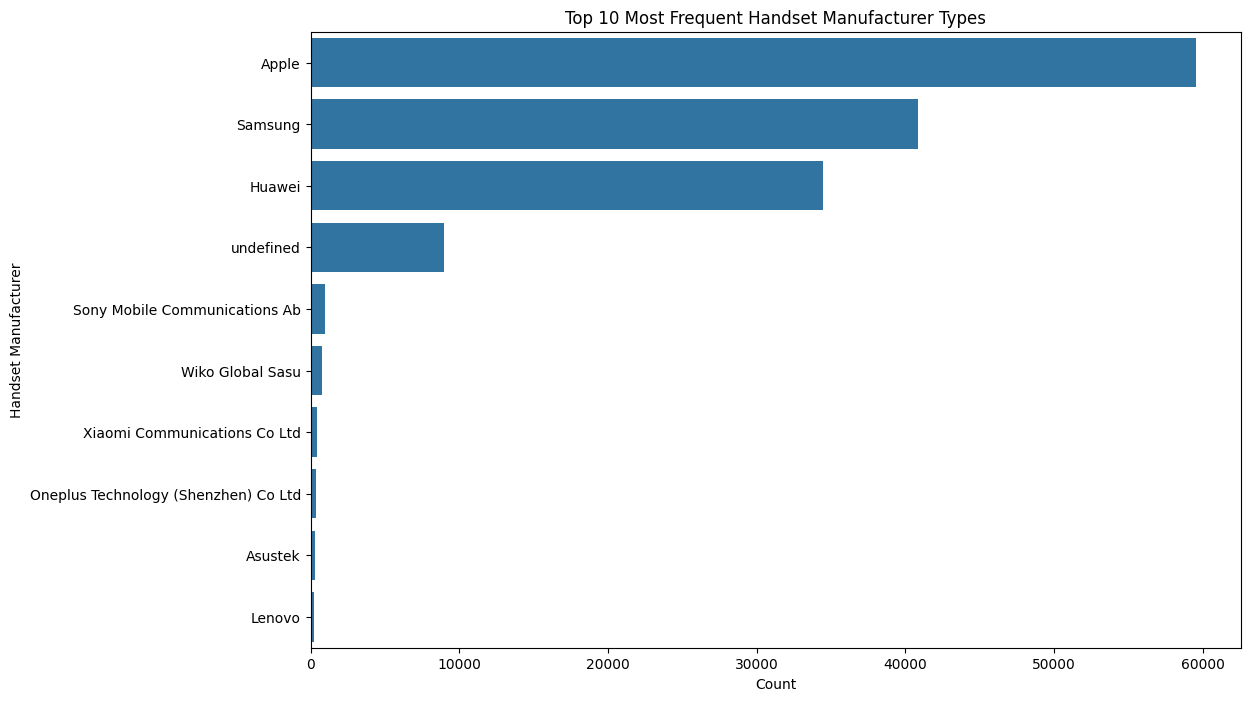

In [10]:
plot_column_frequency(transformed_data_tel, column='Handset Manufacturer', top_n=10)


In [11]:
# Get unique values
print(transformed_data_tel['Handset Type'].unique())

# Get frequency of each value
print(transformed_data_tel['Handset Type'].value_counts())


['Samsung Galaxy A5 Sm-A520F' 'Samsung Galaxy J5 (Sm-J530)'
 'Samsung Galaxy A8 (2018)' ... 'Asustek Asus Zb500Kg'
 'Huawei Mediapad T5 10 Pro' 'Shenzhen Jeko Co. Blackview Bv5800 Pro']
Handset Type
Huawei B528S-23A                                     19752
Apple iPhone 6S (A1688)                               9419
Apple iPhone 6 (A1586)                                9023
undefined                                             8987
Apple iPhone 7 (A1778)                                6326
                                                     ...  
Tcl Communicatio. Alcatel Onetouch Pop 3 (5.5)           1
Microsoft Mobile. Nokia Lumia 630 Dual Sim Rm-978        1
Power Idea Techn. Rg160                                  1
Teletalk Pvt Ltd Colors F016                             1
Spa Condor Elect. F6                                     1
Name: count, Length: 1396, dtype: int64


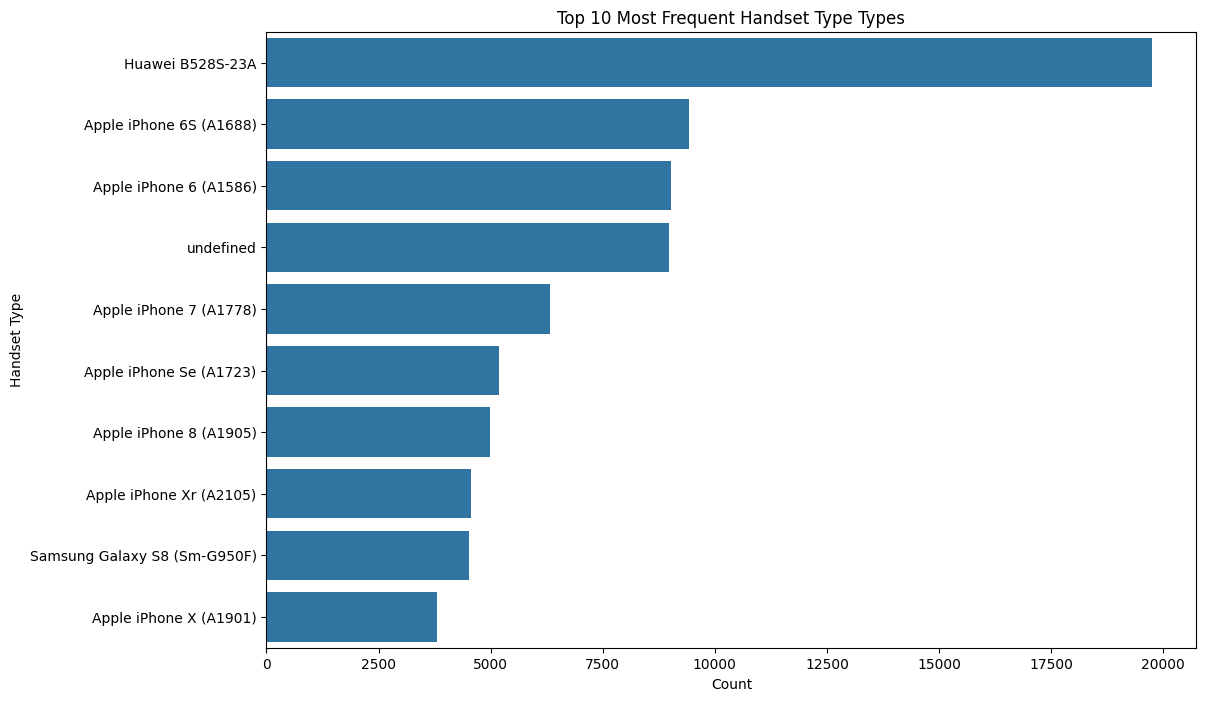

In [33]:
plot_column_frequency(data_tel, column='Handset Type', top_n=10)

In [12]:
# Separate numeric and object columns
numeric_cols = transformed_data_tel.select_dtypes(include=['number'])
object_cols = transformed_data_tel.select_dtypes(include=['object'])

In [13]:
# Describe numeric columns
print("Descriptive Statistics for Numeric Columns:")
print(numeric_cols.describe())

Descriptive Statistics for Numeric Columns:
          Bearer Id          IMSI  MSISDN/Number          IMEI  \
count  1.490100e+05  1.494310e+05   1.489350e+05  1.494290e+05   
mean   1.013887e+19  2.082016e+14   4.188282e+10  4.847455e+13   
std    2.893173e+18  2.148809e+10   2.447443e+12  2.241637e+13   
min    6.917538e+18  2.040471e+14   3.360100e+10  4.400152e+11   
25%    7.349883e+18  2.082014e+14   3.365130e+10  3.546071e+13   
50%    7.349883e+18  2.082015e+14   3.366371e+10  3.572201e+13   
75%    1.304243e+19  2.082018e+14   3.368349e+10  8.611970e+13   
max    1.318654e+19  2.140743e+14   8.823971e+14  9.900120e+13   

       Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  DL TP < 50 Kbps (%)  \
count            150000.000000            150000.000000        149247.000000   
mean              13300.045927              1770.428647            92.844754   
std               23971.878541              4625.355500            13.038031   
min                   0.000000           

In [14]:
# Describe object columns
print("\nDescriptive Statistics for Object Columns:")
print(object_cols.describe())


Descriptive Statistics for Object Columns:
                 Start             End Last Location Name  \
count           150000          150000             148848   
unique            9997            6403              45547   
top     4/26/2019 7:25  4/25/2019 0:01            D41377B   
freq               203            1150                 80   

       Handset Manufacturer      Handset Type  
count                149429            149429  
unique                  170              1396  
top                   Apple  Huawei B528S-23A  
freq                  59565             19752  


### Checking missing value

In [15]:
# Print the total count and percentage of missing values
missing_values = transformed_data_tel.isnull().sum()
total_rows = len(transformed_data_tel)

print("Missing Values Summary:")
print(pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': (missing_values / total_rows) * 100
}).sort_values(by='Percentage', ascending=False))

Missing Values Summary:
                                          Missing Values  Percentage
Nb of sec with 37500B < Vol UL                    130254   86.835421
Nb of sec with 6250B < Vol UL < 37500B            111843   74.561503
Nb of sec with 125000B < Vol DL                    97538   65.024900
TCP UL Retrans. Vol (MB)                           96649   64.432237
Nb of sec with 31250B < Vol DL < 125000B           93586   62.390251
Nb of sec with 1250B < Vol UL < 6250B              92894   61.928920
Nb of sec with 6250B < Vol DL < 31250B             88317   58.877607
TCP DL Retrans. Vol (MB)                           88146   58.763608
HTTP UL (MB)                                       81810   54.539636
HTTP DL (MB)                                       81474   54.315638
Avg RTT DL (sec)                                   27829   18.552543
Avg RTT UL (sec)                                   27812   18.541210
Last Location Name                                  1153    0.768662
MSISDN/Num

In [16]:
# Print the total count and percentage of missing values
missing_values = transformed_data_tel.isnull().sum()
total_rows = len(transformed_data_tel)

print("Missing Values Summary:")
print(pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': (missing_values / total_rows) * 100
}).sort_values(by='Percentage', ascending=False))

Missing Values Summary:
                                          Missing Values  Percentage
Nb of sec with 37500B < Vol UL                    130254   86.835421
Nb of sec with 6250B < Vol UL < 37500B            111843   74.561503
Nb of sec with 125000B < Vol DL                    97538   65.024900
TCP UL Retrans. Vol (MB)                           96649   64.432237
Nb of sec with 31250B < Vol DL < 125000B           93586   62.390251
Nb of sec with 1250B < Vol UL < 6250B              92894   61.928920
Nb of sec with 6250B < Vol DL < 31250B             88317   58.877607
TCP DL Retrans. Vol (MB)                           88146   58.763608
HTTP UL (MB)                                       81810   54.539636
HTTP DL (MB)                                       81474   54.315638
Avg RTT DL (sec)                                   27829   18.552543
Avg RTT UL (sec)                                   27812   18.541210
Last Location Name                                  1153    0.768662
MSISDN/Num

In [17]:
# Count duplicate rows
duplicate_rows = transformed_data_tel.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


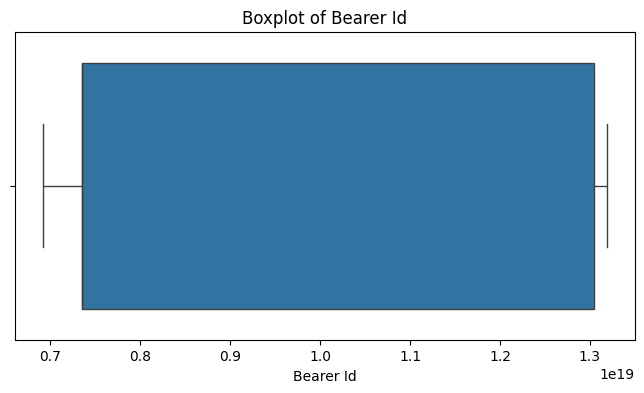

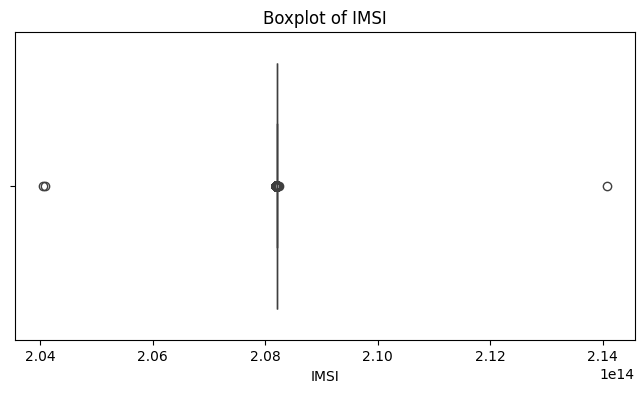

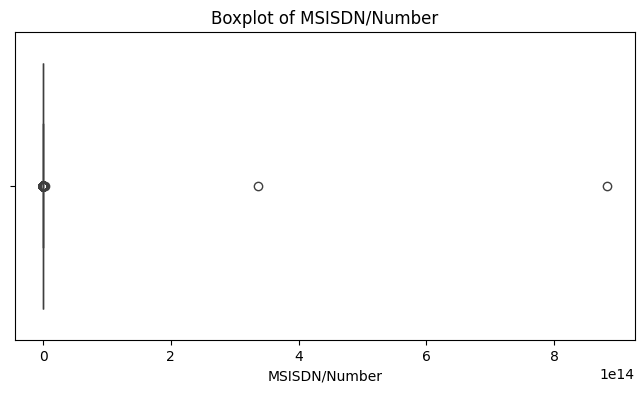

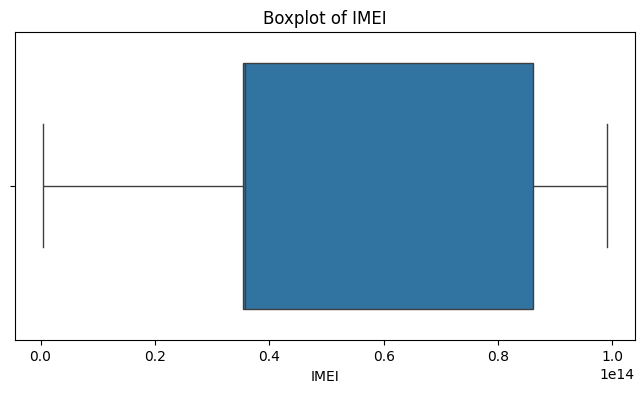

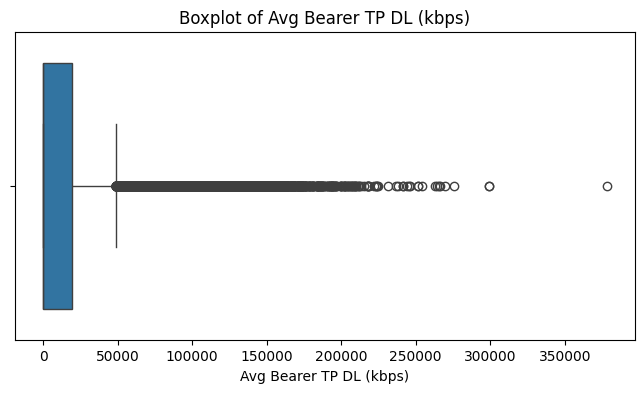

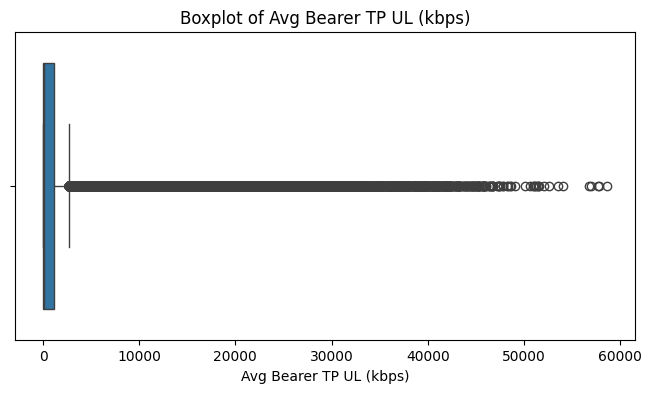

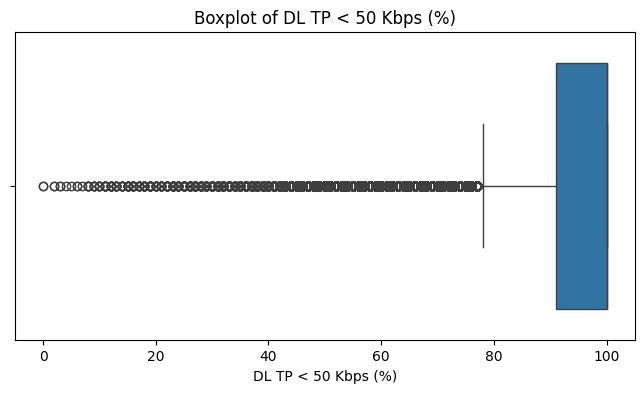

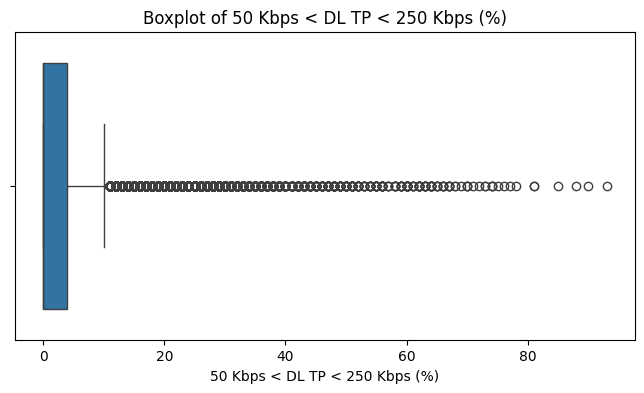

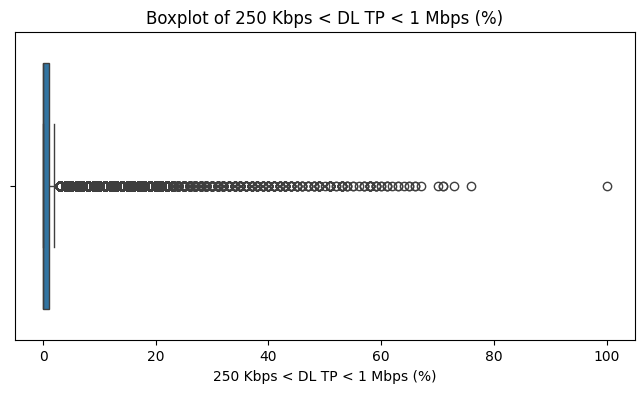

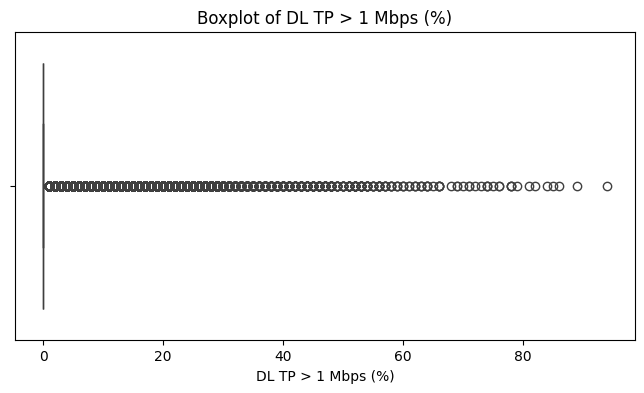

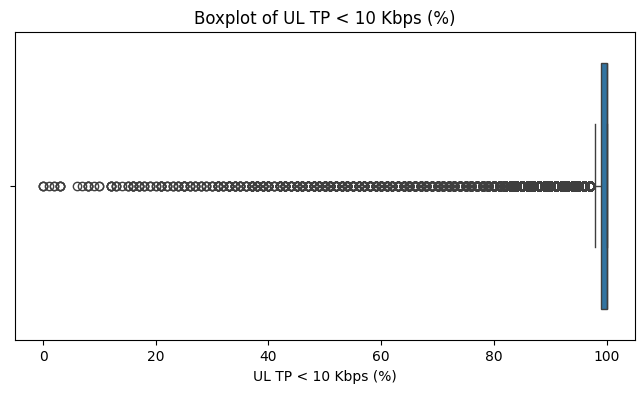

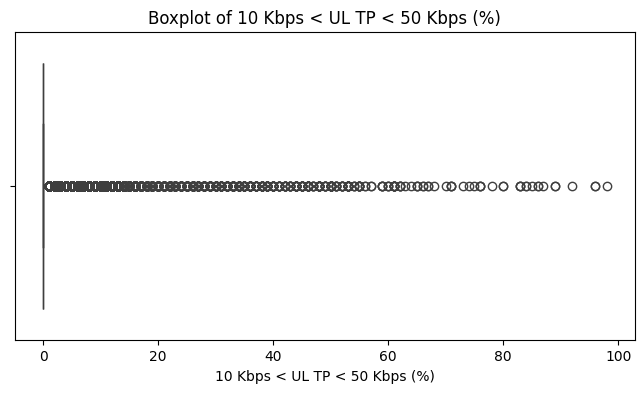

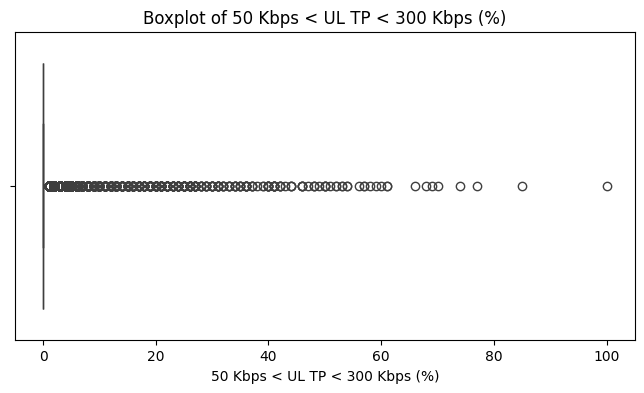

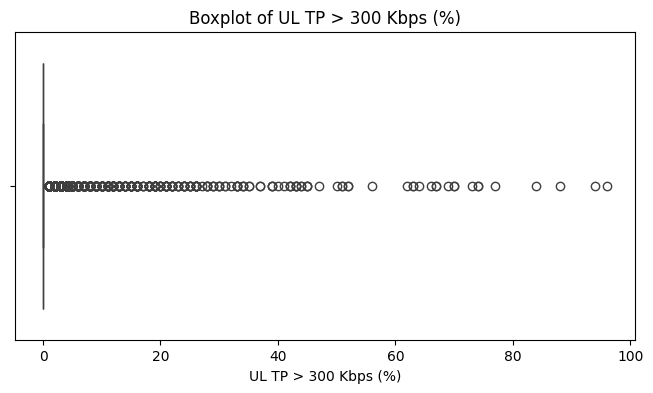

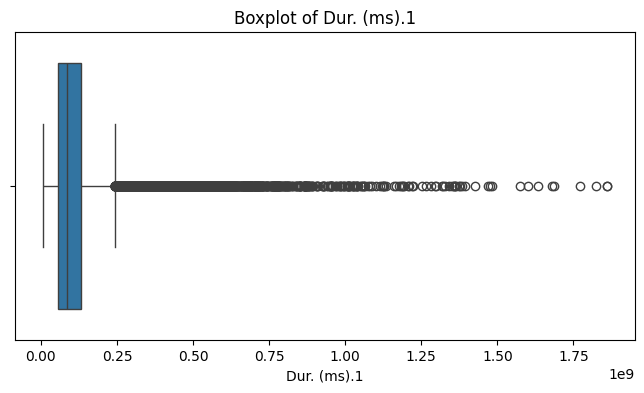

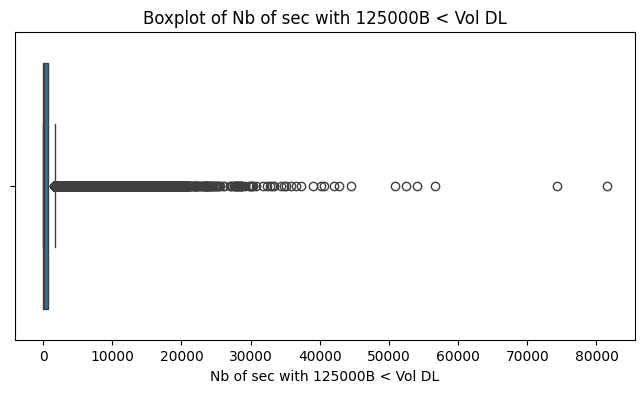

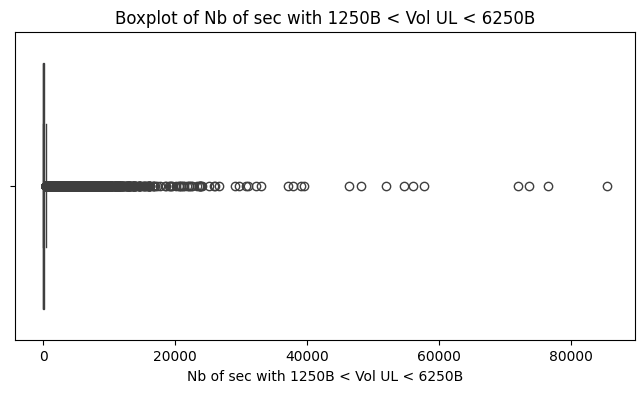

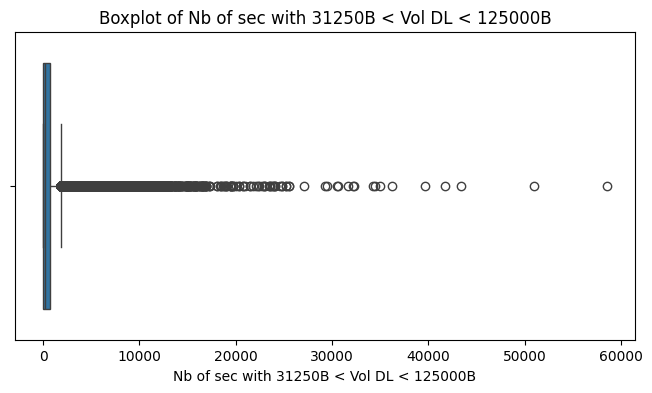

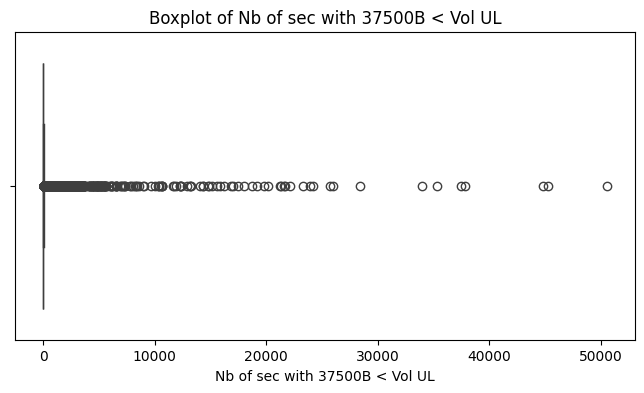

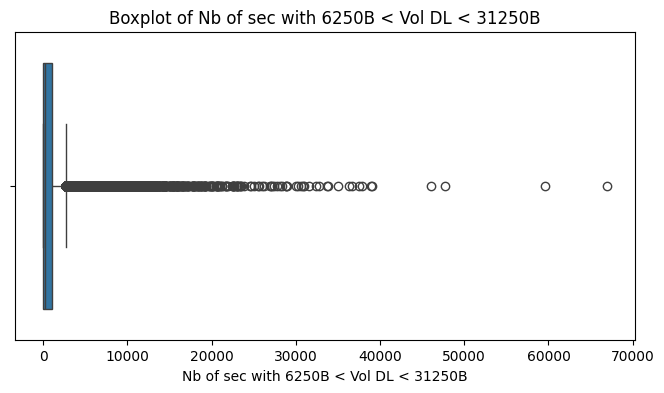

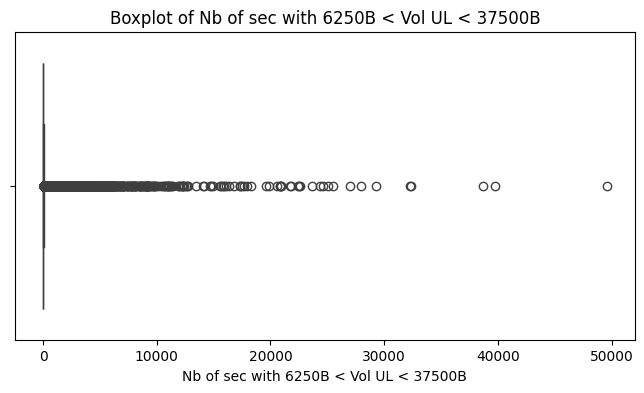

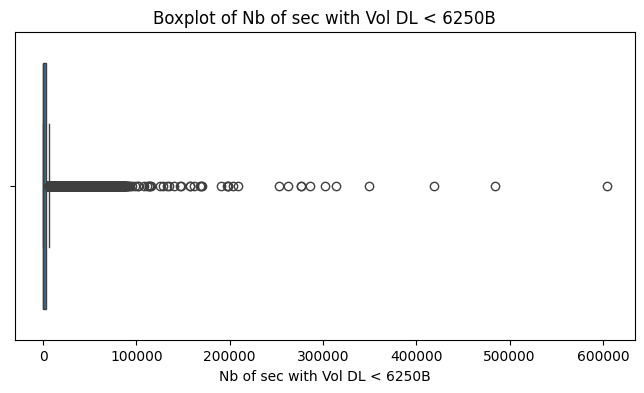

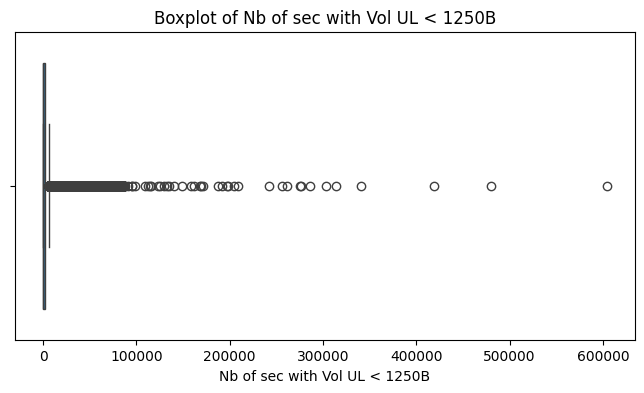

ValueError: Could not interpret value `Start sec` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x400 with 0 Axes>

In [19]:
# Boxplot for numerical features
numerical_cols = transformed_data_tel.select_dtypes(include=["float64", "int64"]).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_tel, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


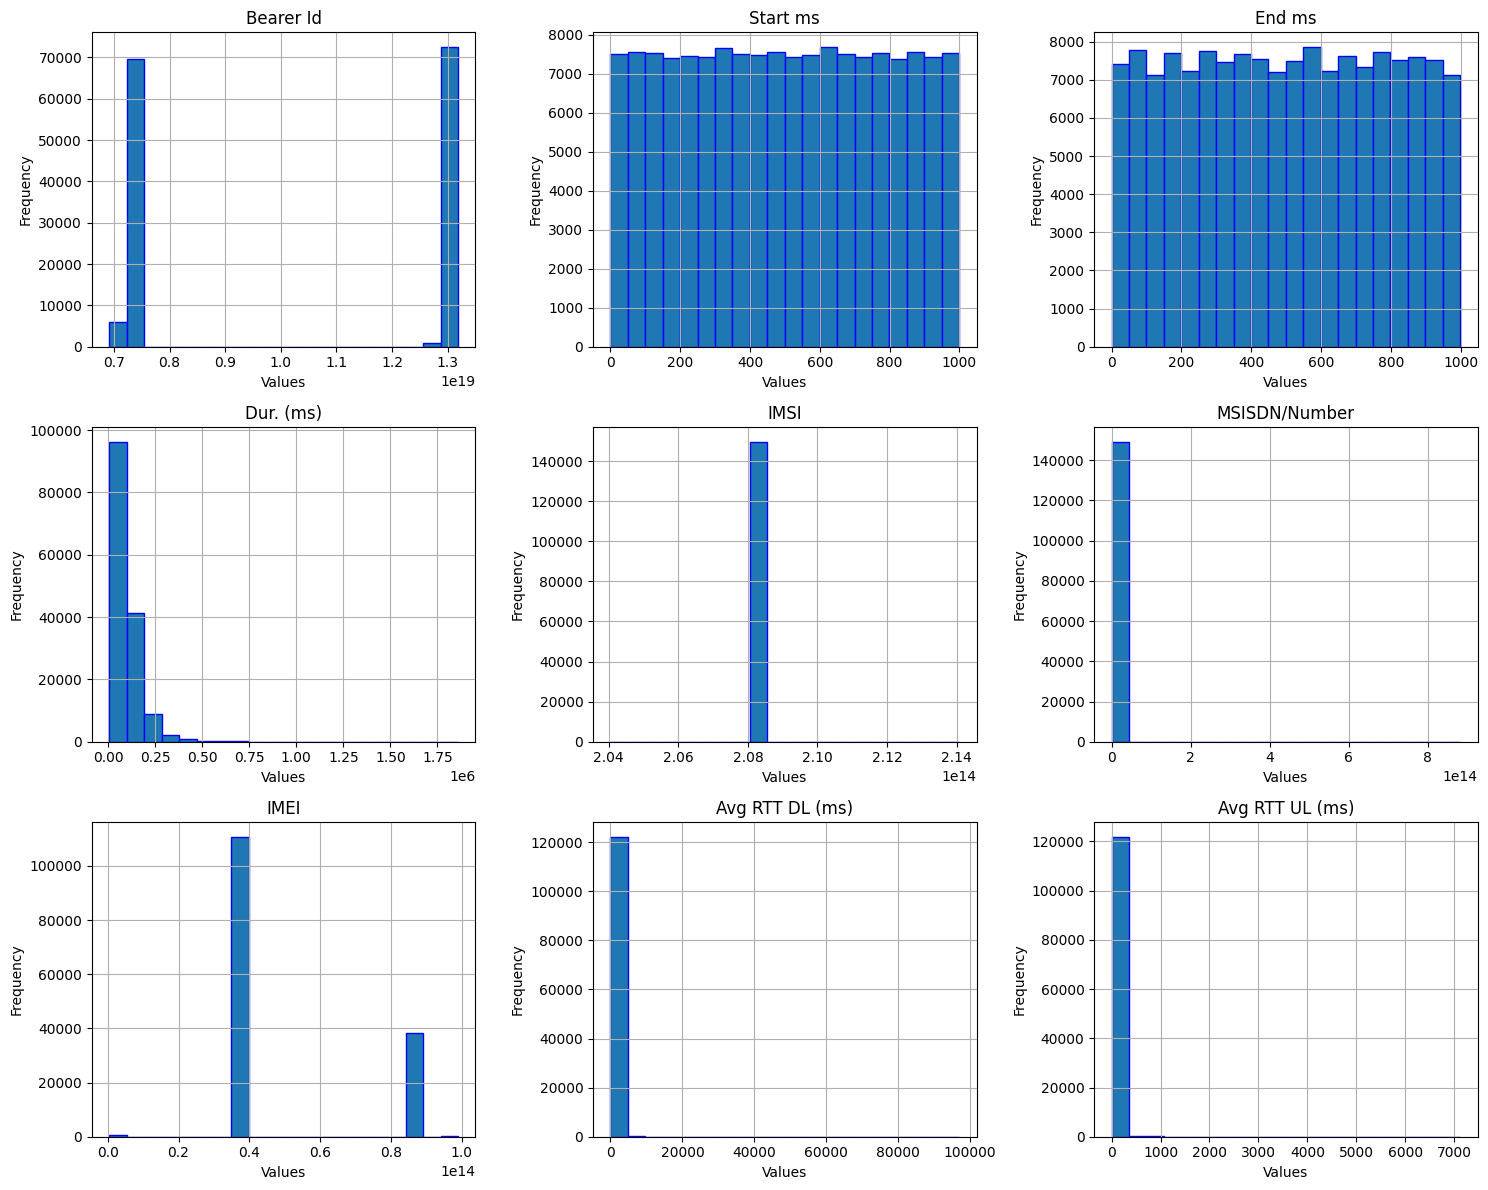

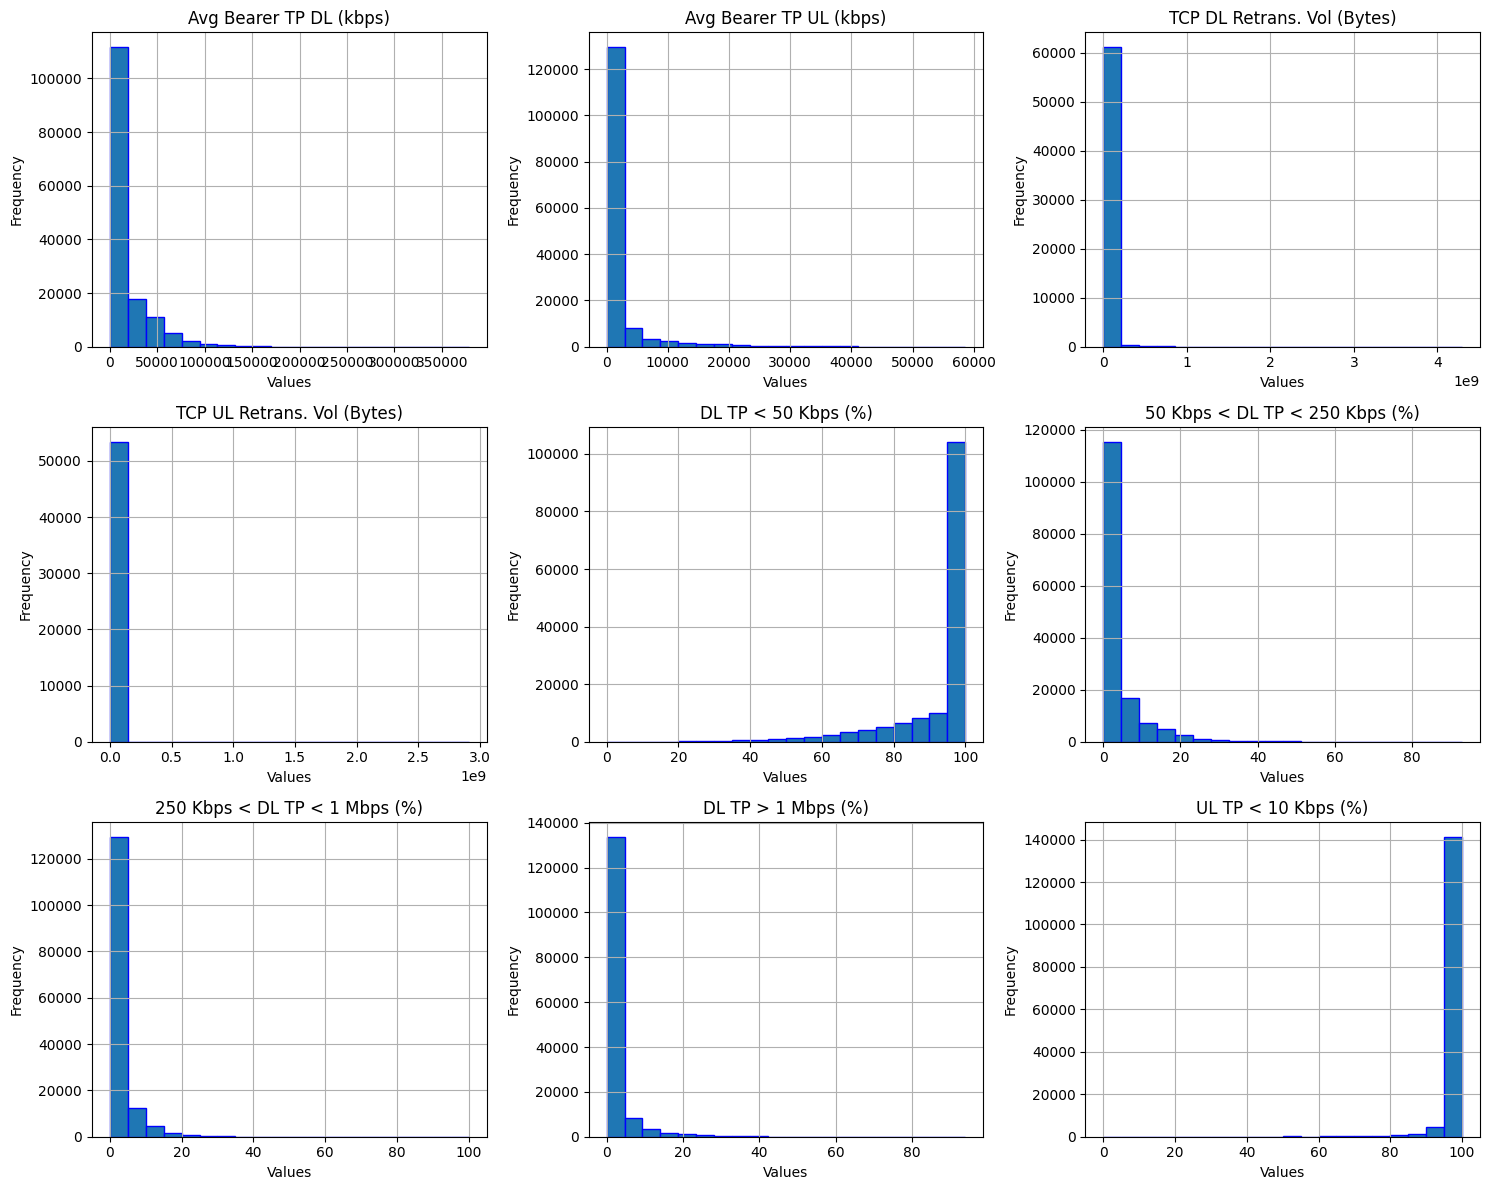

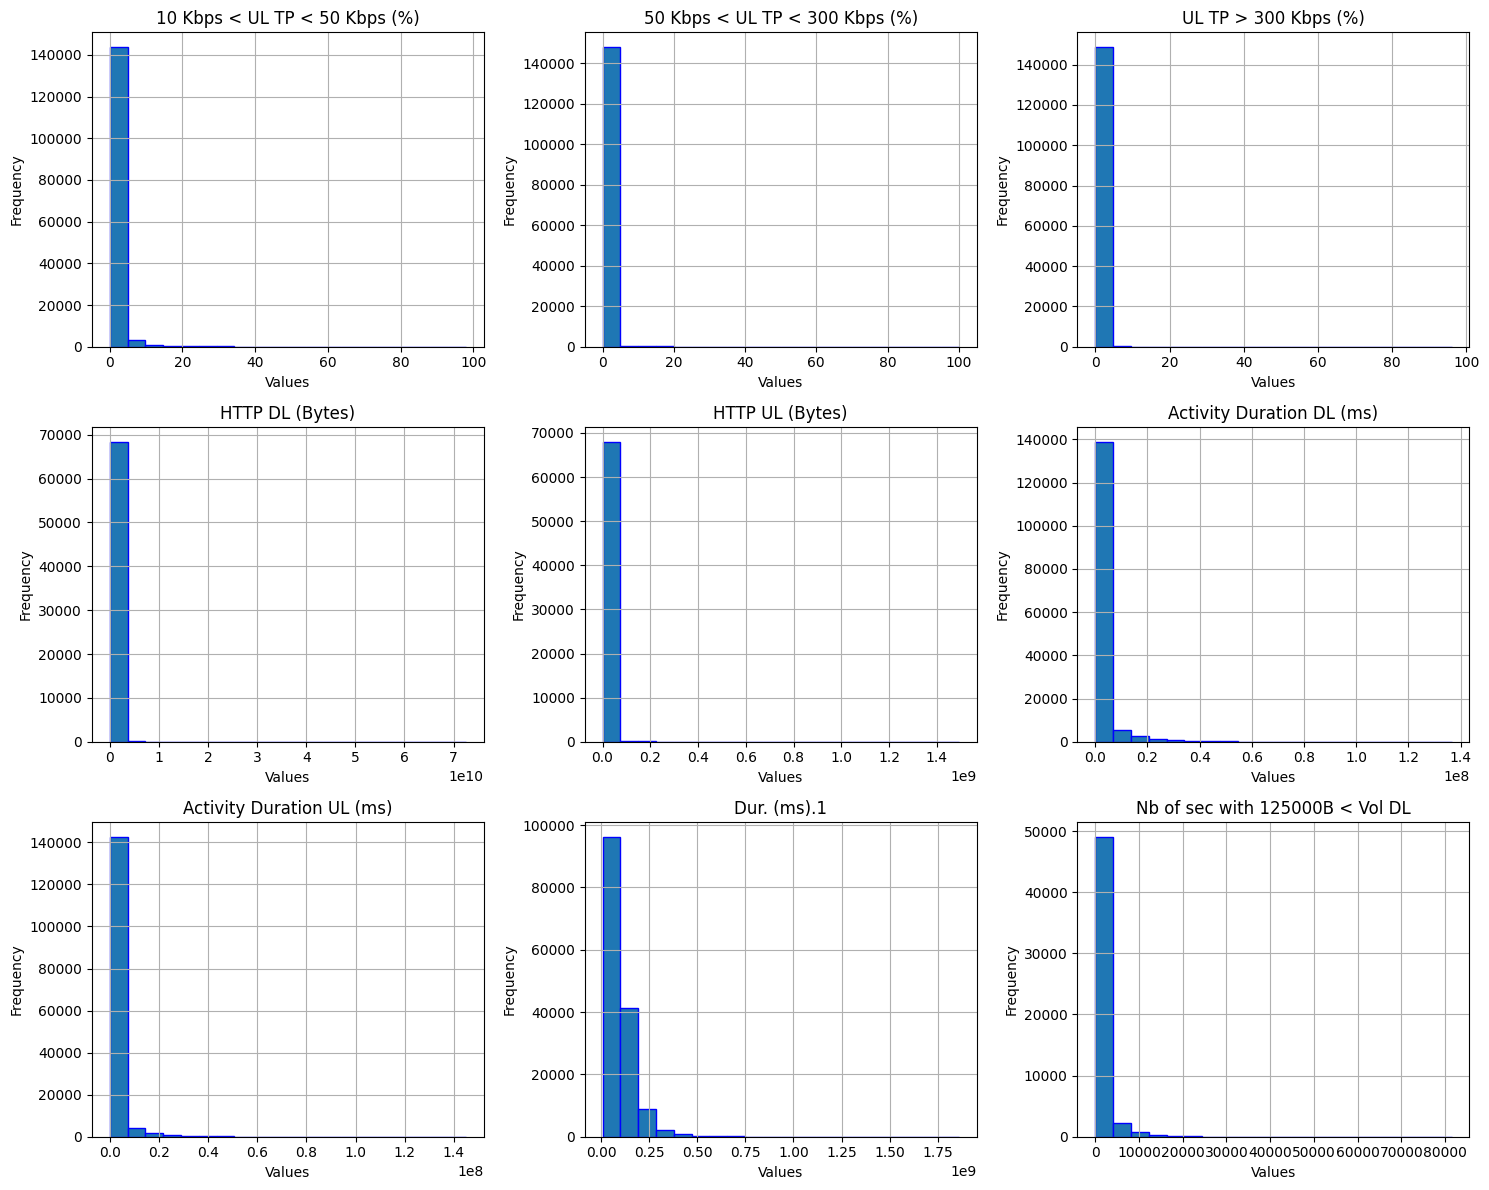

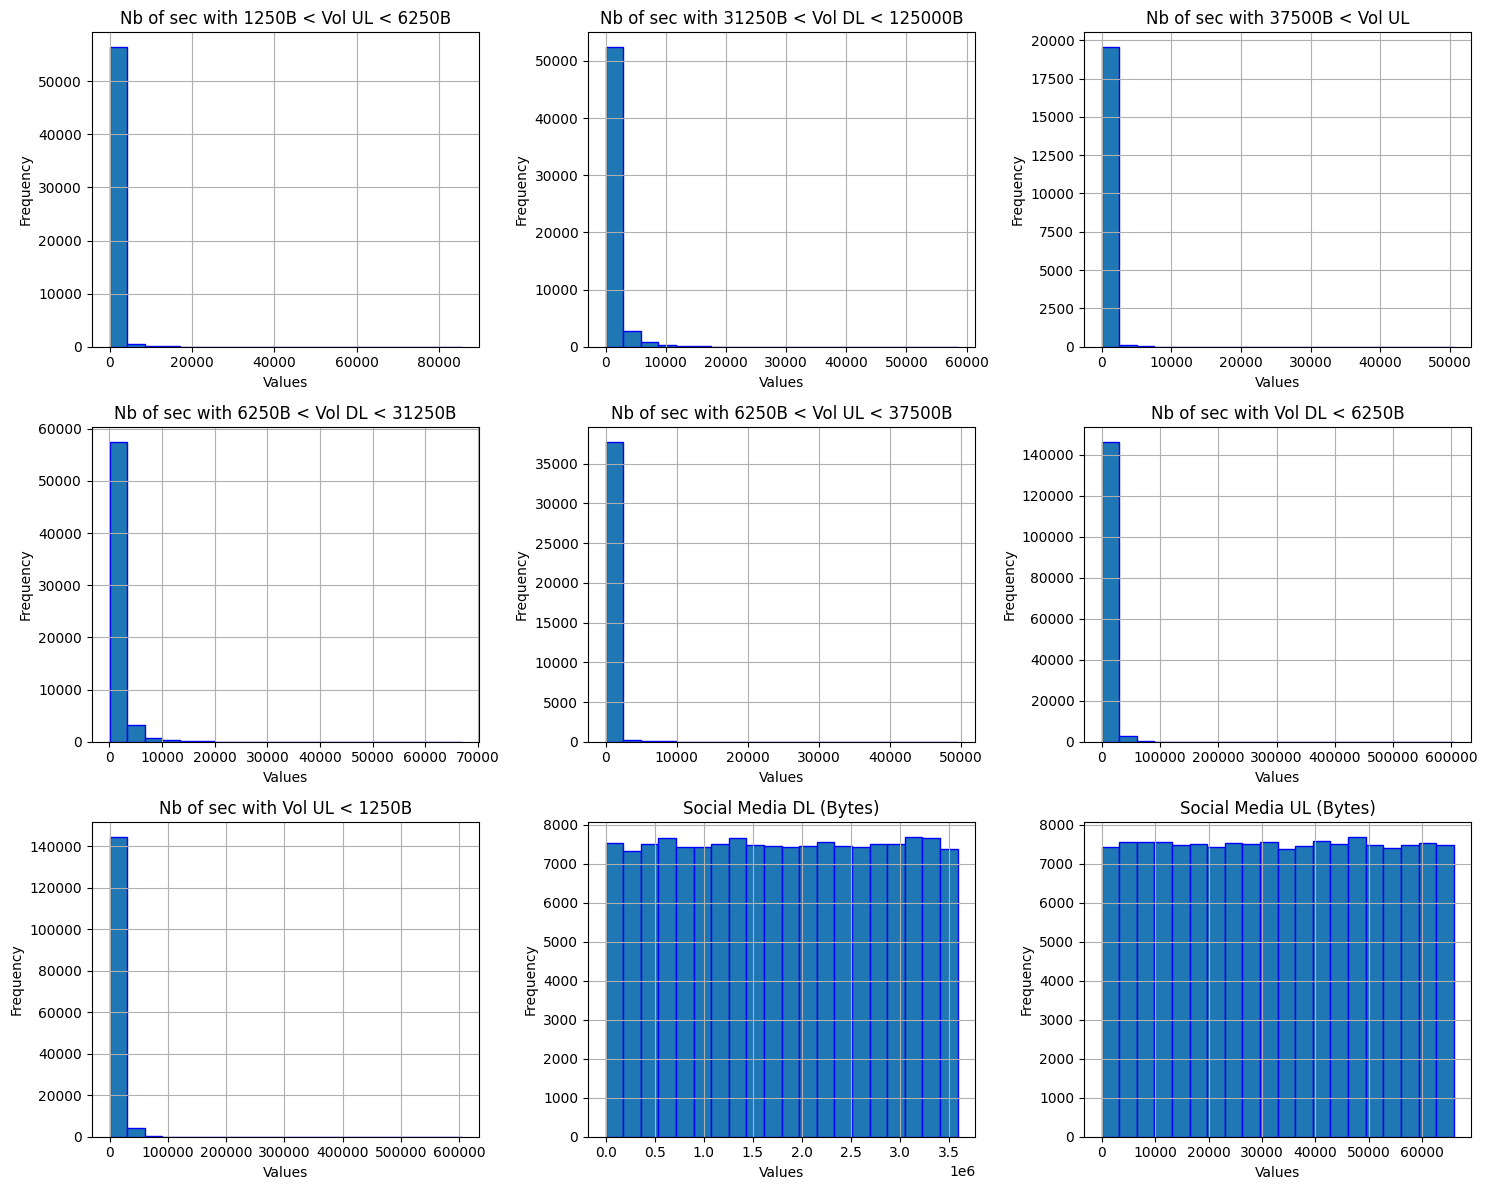

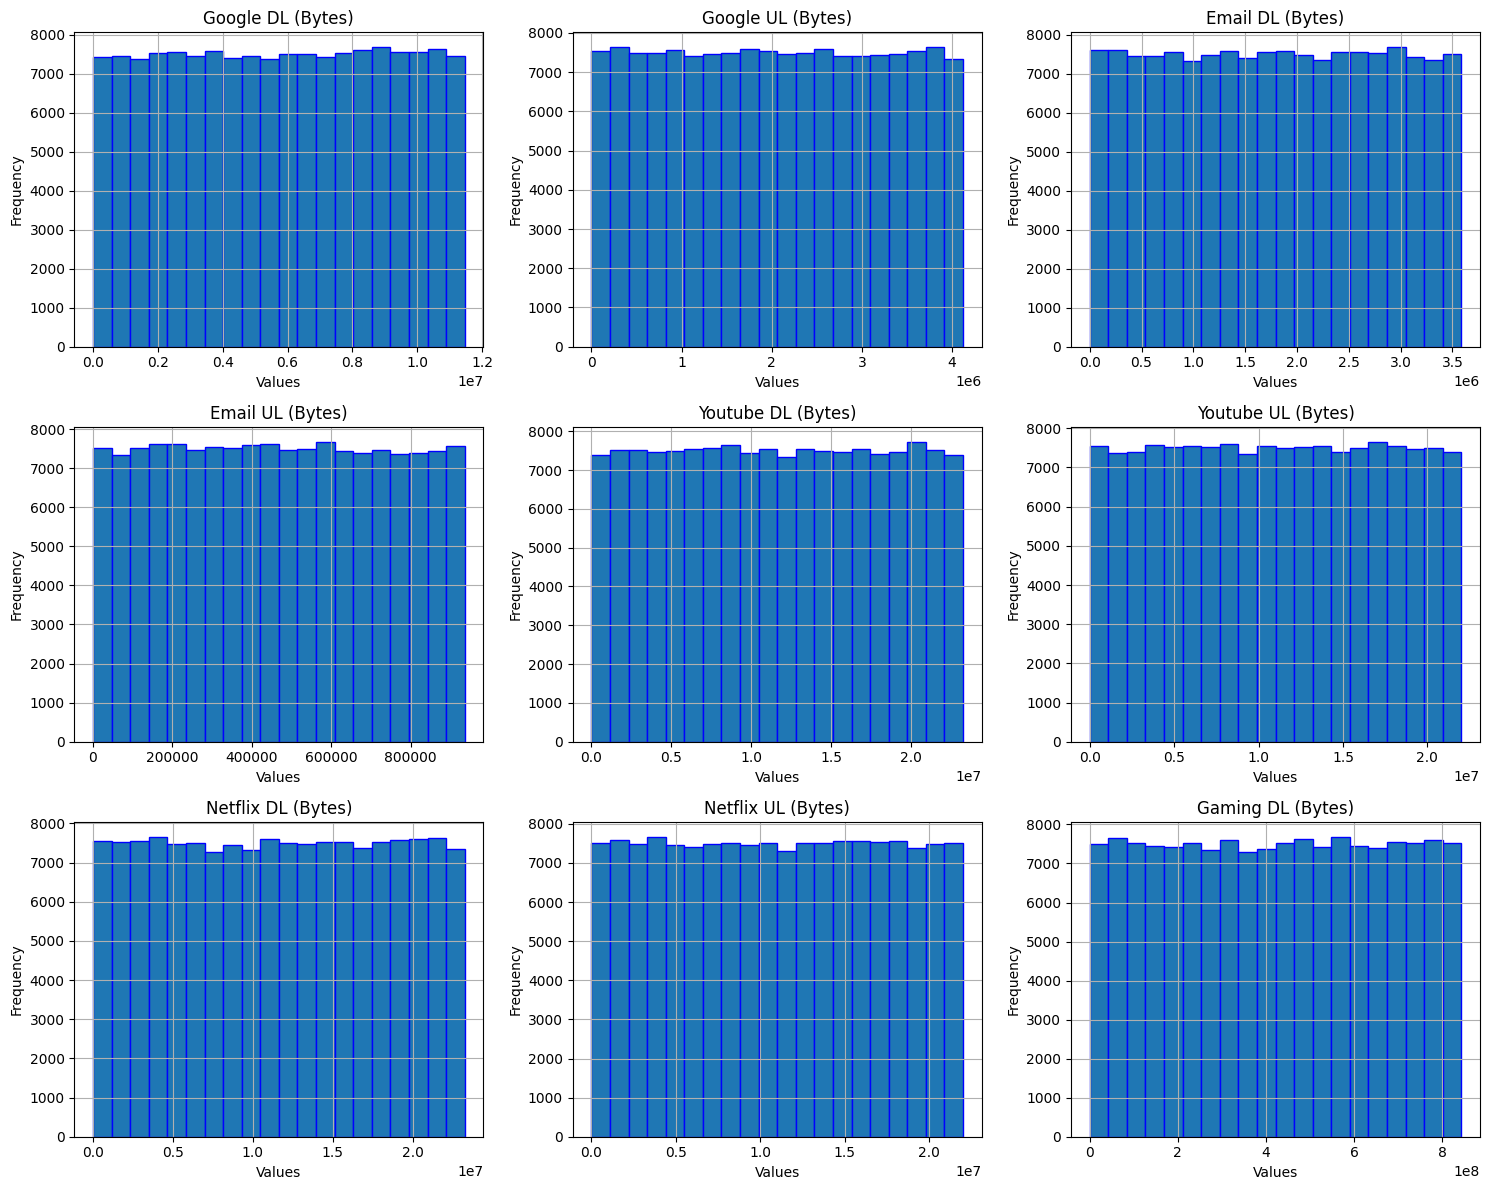

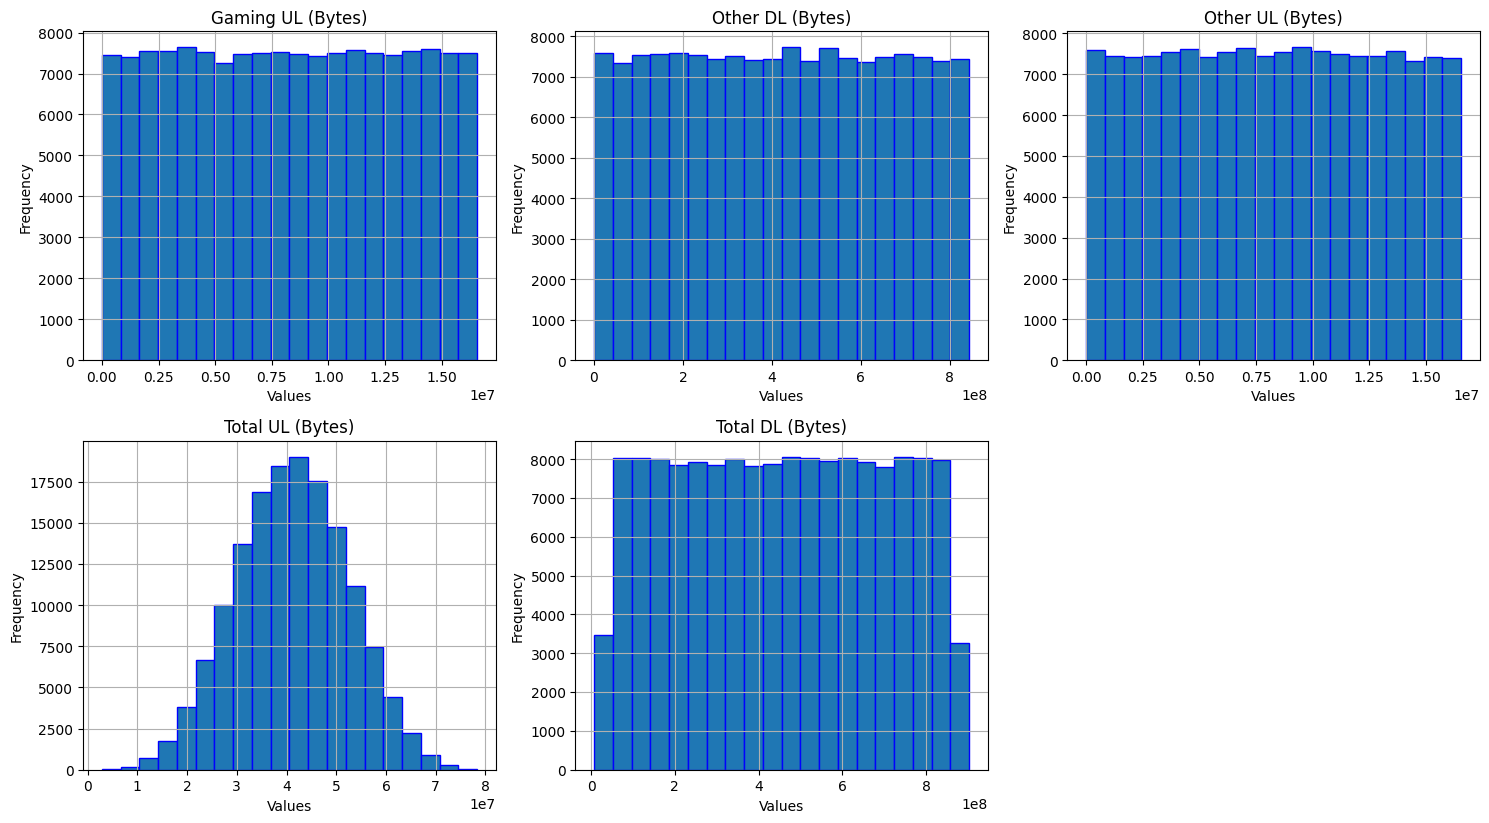

In [8]:
numerical_cols = data_tel.select_dtypes(include=["float64", "int64"]).columns
num_columns = data_tel[numerical_cols]
plot_histograms(data_tel, numerical_cols)


# Telecom User Overview Analysis

Identifying the Top 10 Handsets Used by Customers

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


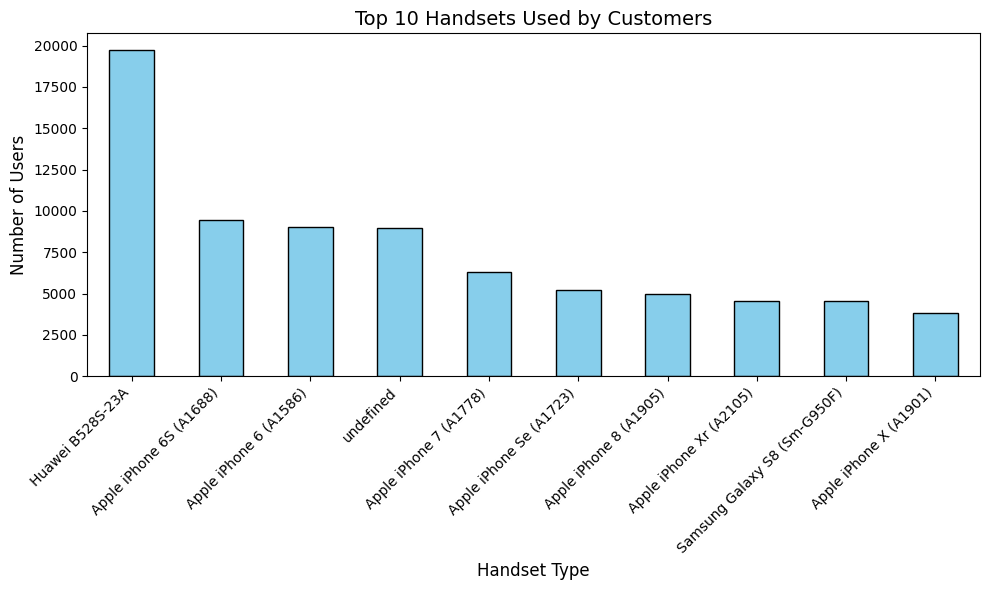

In [5]:
top_handsets_df = top_10_handsets(data_tel, column='Handset Type')


Identifying the Top 3 Handset Manufacturers


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


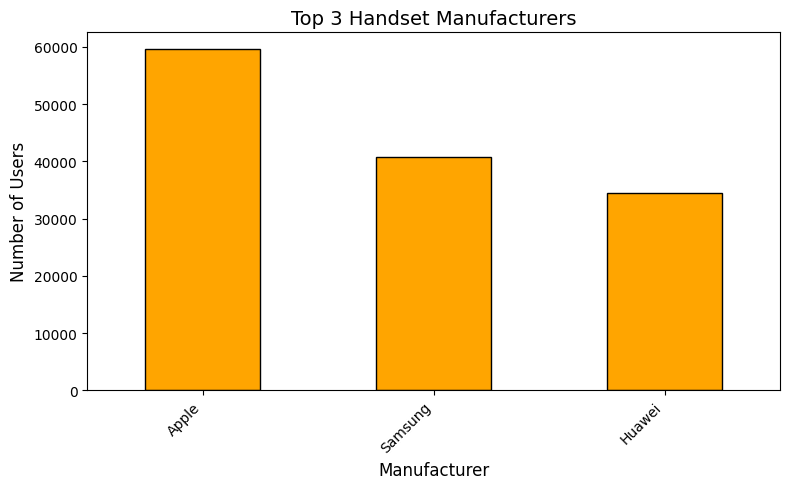

     Count  count
0    Apple  59565
1  Samsung  40839
2   Huawei  34423


In [6]:
# Call the method with your DataFrame
top_manufacturers_df = top_3_handset_manufacturers(data_tel, column='Handset Manufacturer')

# Display the returned DataFrame (if needed)
print(top_manufacturers_df)


 Identifying the Top 5 Handsets Per Top 3 Handset Manufacturers


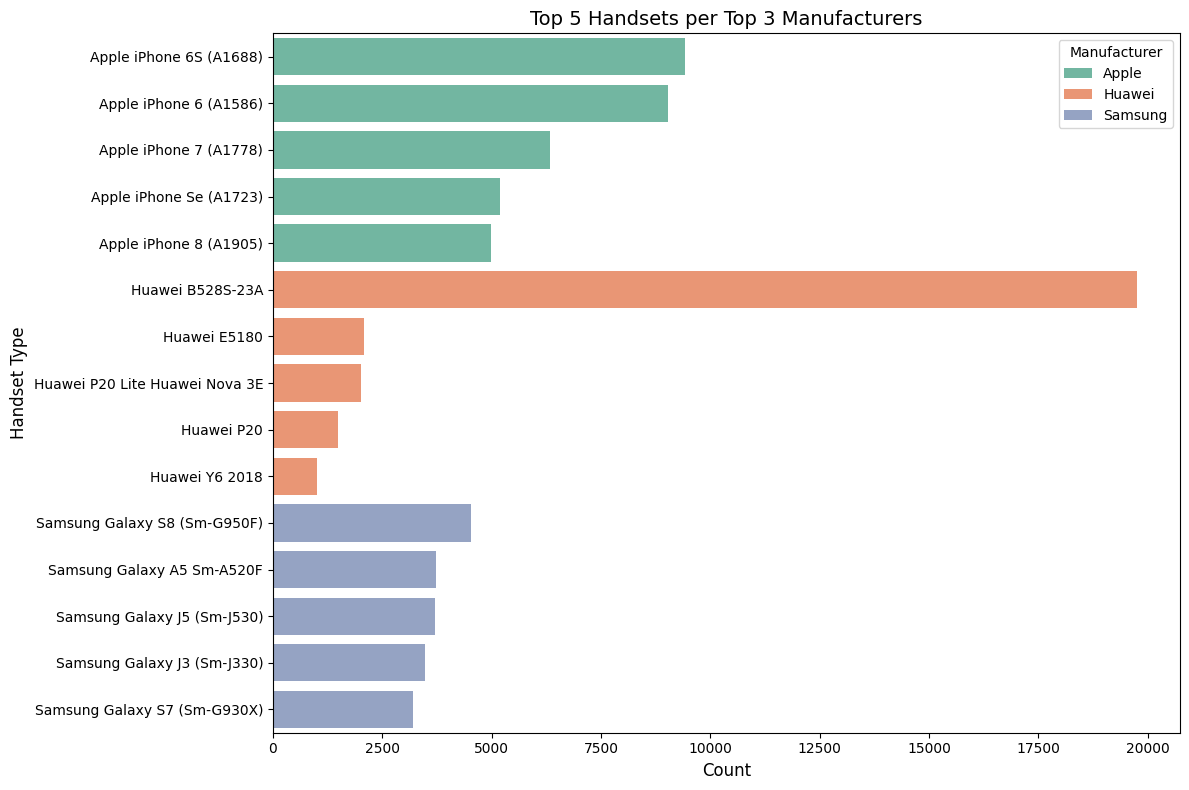

Top 5 Handsets for Each of the Top 3 Manufacturers:
    Handset Manufacturer                    Handset Type  Count
35                 Apple         Apple iPhone 6S (A1688)   9419
31                 Apple          Apple iPhone 6 (A1586)   9023
41                 Apple          Apple iPhone 7 (A1778)   6326
55                 Apple         Apple iPhone Se (A1723)   5187
48                 Apple          Apple iPhone 8 (A1905)   4993
83                Huawei                Huawei B528S-23A  19752
104               Huawei                    Huawei E5180   2079
183               Huawei  Huawei P20 Lite Huawei Nova 3E   2021
182               Huawei                      Huawei P20   1480
224               Huawei                  Huawei Y6 2018    997
359              Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
242              Samsung      Samsung Galaxy A5 Sm-A520F   3724
292              Samsung     Samsung Galaxy J5 (Sm-J530)   3696
284              Samsung     Samsung Galaxy J3 (Sm-J

In [5]:
# Call the function to get the top 5 handsets for the top 3 manufacturers
top_5_handsets = top_5_handsets_per_top_3_manufacturers(data_tel)

# Display the results
print("Top 5 Handsets for Each of the Top 3 Manufacturers:")
print(top_5_handsets)


 aggregate the user behavior

In [19]:
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
# Apply the aggregation function
aggregated_user_behavior = aggregate_user_behavior(data_tel)

# Now, aggregated_user_behavior contains the aggregated data for each user
print(aggregated_user_behavior)

                IMSI  num_sessions  total_duration  total_social_media_dl  \
0       2.040471e+14             1         869.844              1500145.0   
1       2.040808e+14             1         877.385               668596.0   
2       2.082001e+14             1          86.019              3073697.0   
3       2.082001e+14             1          86.254              2542767.0   
4       2.082001e+14             2         573.923              3326811.0   
...              ...           ...             ...                    ...   
107260  2.082099e+14             1         127.367              1209387.0   
107261  2.082099e+14             1         168.543              3462783.0   
107262  2.082099e+14             1          86.399              2601607.0   
107263  2.082522e+14             1          56.613               621586.0   
107264  2.140743e+14             1         226.790              2309742.0   

        total_social_media_ul  total_google_dl  total_google_ul  \
0       

In [7]:
aggregated_user_behavior.columns
aggregated_user_behavior

IMSI  num_sessions  total_duration  total_social_media_dl  \
0       2.040471e+14             1         869.844              1500145.0   
1       2.040808e+14             1         877.385               668596.0   
2       2.082001e+14             1          86.019              3073697.0   
3       2.082001e+14             1          86.254              2542767.0   
4       2.082001e+14             2         573.923              3326811.0   
...              ...           ...             ...                    ...   
107260  2.082099e+14             1         127.367              1209387.0   
107261  2.082099e+14             1         168.543              3462783.0   
107262  2.082099e+14             1          86.399              2601607.0   
107263  2.082522e+14             1          56.613               621586.0   
107264  2.140743e+14             1         226.790              2309742.0   

        total_social_media_ul  total_google_dl  total_google_ul  \
0                     45943.0        5985089.0        3233558.0   
1                     46628.0        8572779.0        1865881.0   
2                     49084.0         603691.0        1020971.0   
3                     34337.0       10699827.0        3111651.0   
4                     99905.0        9118088.0        2547799.0   
...                       ...              ...              ...   
107260                47216.0        8114248.0        3933358.0   
107261                 2972.0         661679.0        3626134.0   
107262                 8059.0        1612388.0        2815546.0   
107263                45495.0        1208403.0        1019102.0   
107264                 6512.0        2567308.0         491983.0   

        total_email_dl  total_email_ul  total_youtube_dl  total_youtube_ul  \
0            2518425.0        812549.0        18980320.0        21960390.0   
1             842279.0        678492.0         9839889.0         2120016.0   
2            3076735.0        580766.0         5556563.0        14325876.0   
3            3248863.0        606871.0        22414714.0         3242918.0   
4            4225757.0       1338705.0         4046597.0         9793604.0   
...                ...             ...               ...               ...   
107260        845456.0        110856.0         8661662.0         2959812.0   
107261       1531947.0        752619.0        23251957.0        11605503.0   
107262       1405783.0        311862.0        22196893.0         6993803.0   
107263       3023466.0         31158.0        12776130.0        12133368.0   
107264       1083819.0        382697.0        19339034.0        20678688.0   

        total_netflix_dl  total_netflix_ul  total_gaming_dl  total_gaming_ul  \
0             21621336.0         7224894.0       28092282.0       14977978.0   
1             10340908.0        16251392.0      164563605.0       13485133.0   
2             15305361.0        16525201.0        3760934.0        5363582.0   
3             10065639.0        17720213.0      343946503.0         159394.0   
4             30748449.0        26594966.0      910301321.0        7383445.0   
...                  ...               ...              ...              ...   
107260         5726631.0         5040884.0      664258019.0       14235971.0   
107261        14193266.0        16541988.0      408071389.0        3311290.0   
107262        15051715.0         4554026.0      264956718.0        7089918.0   
107263         9816072.0         1098136.0      773183701.0       15385758.0   
107264         2731487.0        17217743.0      609092189.0       13880553.0   

        total_other_dl  total_other_ul     total_dl    total_ul  \
0         3.891597e+08      12200737.0   78697597.0  60456049.0   
1         4.676781e+08       2848373.0  194828056.0  37295915.0   
2         5.000445e+08      15929178.0   31376981.0  53794658.0   
3         3.009029e+08       8707888.0  392918313.0  33583272.0   
4         1.055869e+09      23566580.0  961767023.0  

In [26]:
import psycopg2
import pandas as pd
from sql_query import get_user_data_query  # Adjust the import if needed

# Database connection parameters
host = "localhost"       # Ensure 'localhost' is in quotes
port = "5432"            # Default PostgreSQL port
database = "telecome_data"
user = "postgres"        # Replace with your username
password = "blessed"     # Replace with your password

# Initialize connection variable
connection = None

try:
    # Get the SQL query from the function in sql_query.py
    query = get_user_data_query()

    # Establish the database connection
    connection = psycopg2.connect(
        host=host,
        port=port,
        database=database,
        user=user,
        password=password
    )

    # Load data into a Pandas DataFrame
    aggregated_data = pd.read_sql_query(query, connection)

    # Display the aggregated data
    print(aggregated_data.head())  # Show the first 5 rows

except Exception as e:
    print("Error:", e)

finally:
    # Ensure the connection is closed if it's open
    if connection is not None:
        connection.close()


C:\Users\fikad\AppData\Local\Temp\ipykernel_22284\747865627.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aggregated_data = pd.read_sql_query(query, connection)


        user_id  number_of_xdr_sessions  total_session_duration  \
0  3.360100e+10                       1                116720.0   
1  3.360100e+10                       1                181230.0   
2  3.360100e+10                       1                134969.0   
3  3.360101e+10                       1                 49878.0   
4  3.360101e+10                       2                 37104.0   

   total_download_data  total_upload_data  total_data_volume  \
0         8.426375e+08         36053108.0       8.786906e+08   
1         1.207552e+08         36104459.0       1.568596e+08   
2         5.566597e+08         39306820.0       5.959665e+08   
3         4.019932e+08         20327526.0       4.223207e+08   
4         1.363130e+09         94280527.0       1.457411e+09   

   social_media_data_volume  google_data_volume  email_data_volume  \
0                 2206504.0           3337123.0           837400.0   
1                 2598548.0           4197697.0          2828821.0   
2 

In [27]:
aggregated_data

user_id  number_of_xdr_sessions  total_session_duration  \
0       3.360100e+10                       1                116720.0   
1       3.360100e+10                       1                181230.0   
2       3.360100e+10                       1                134969.0   
3       3.360101e+10                       1                 49878.0   
4       3.360101e+10                       2                 37104.0   
...              ...                     ...                     ...   
106852  3.379000e+10                       1                140988.0   
106853  3.197021e+12                       1                877385.0   
106854  3.370000e+14                       1                253030.0   
106855  8.823971e+14                       1                869844.0   
106856           NaN                     504              72446396.0   

        total_download_data  total_upload_data  total_data_volume  \
0              8.426375e+08       3.605311e+07       8.786906e+08   
1              1.207552e+08       3.610446e+07       1.568596e+08   
2              5.566597e+08       3.930682e+07       5.959665e+08   
3              4.019932e+08       2.032753e+07       4.223207e+08   
4              1.363130e+09       9.428053e+07       1.457411e+09   
...                     ...                ...                ...   
106852         4.445751e+08       3.573224e+07       4.803073e+08   
106853         1.948281e+08       3.729592e+07       2.321240e+08   
106854         5.396350e+08       5.665284e+07       5.962878e+08   
106855         7.869760e+07       6.045605e+07       1.391536e+08   
106856         4.869236e+11       4.432530e+10       5.312489e+11   

        social_media_data_volume  google_data_volume  email_data_volume  \
0                   2.206504e+06        3.337123e+06       8.374000e+05   
1                   2.598548e+06        4.197697e+06       2.828821e+06   
2                   3.148004e+06        3.343483e+06       2.436500e+06   
3                   2.514690e+05        5.937765e+06       2.178618e+06   
4                   2.861230e+06        1.372867e+07       2.247808e+06   
...                          ...                 ...                ...   
106852              4.422140e+05        1.472406e+06       2.513433e+06   
106853              6.685960e+05        8.572779e+06       8.422790e+05   
106854              4.963370e+05        8.215537e+06       2.989663e+06   
106855              1.500145e+06        5.985089e+06       2.518425e+06   
106856              1.937715e+09        6.007942e+09       1.904048e+09   

        youtube_data_volume  netflix_data_volume  gaming_data_volume  \
0              1.490020e+07         1.026510e+07        8.110911e+08   
1              5.324251e+06         7.705690e+05        1.050353e+08   
2              2.137272e+06         1.652592e+07        5.290685e+08   
3              4.393123e+06         1.157362e+06        3.880748e+08   
4              1.033997e+07         2.497165e+07        1.308981e+09   
...                     ...                  ...                 ...   
106852         5.596862e+06         6.929961e+06        4.276202e+08   
106853         9.839889e+06         1.034091e+07        1.645636e+08   
106854         1.669073e+07         9.983678e+06        5.012590e+08   
106855         1.898032e+07         2.162134e+07        2.809228e+07   
106856         1.249464e+10         1.228898e+10        4.527450e+11   

        other_data_volume  
0            3.770970e+08  
1            2.795577e+08  
2            4.950865e+08  
3            2.524800e+07  
4            7.776437e+08  
...                   ...  
106852       2.046361e+08  
106853       4.676781e+08  
106854       1.443541e+08  
106855       3.891597e+08  
106856       4.419283e+11  

[106857 rows x 13 columns]

## Handling missing values 

Columns with very high percentages of missing values (>60%)

For columns with >60% missing values and no critical importance, consider dropping them

In [6]:
# Print the total count and percentage of missing values
missing_values = data_tel.isnull().sum()
total_rows = len(data_tel)

print("Missing Values Summary:")
print(pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': (missing_values / total_rows) * 100
}).sort_values(by='Percentage', ascending=False))

Missing Values Summary:
                                          Missing Values  Percentage
Nb of sec with 37500B < Vol UL                    130254   86.835421
Nb of sec with 6250B < Vol UL < 37500B            111843   74.561503
Nb of sec with 125000B < Vol DL                    97538   65.024900
TCP UL Retrans. Vol (Bytes)                        96649   64.432237
Nb of sec with 31250B < Vol DL < 125000B           93586   62.390251
Nb of sec with 1250B < Vol UL < 6250B              92894   61.928920
Nb of sec with 6250B < Vol DL < 31250B             88317   58.877607
TCP DL Retrans. Vol (Bytes)                        88146   58.763608
HTTP UL (Bytes)                                    81810   54.539636
HTTP DL (Bytes)                                    81474   54.315638
Avg RTT DL (ms)                                    27829   18.552543
Avg RTT UL (ms)                                    27812   18.541210
Last Location Name                                  1153    0.768662
MSISDN/Num

In [7]:
# Strip any extra spaces from column names in the dataset
data_tel.columns = data_tel.columns.str.strip()

# Define the columns to drop (ensure there are no extra spaces)
columns_to_drop = [
    'Nb of sec with 37500B < Vol UL',
    'Nb of sec with 6250B < Vol UL < 37500B',
    'Nb of sec with 125000B < Vol DL',
    'TCP UL Retrans. Vol (Bytes)',
    'Nb of sec with 31250B < Vol DL < 125000B',
    'Nb of sec with 1250B < Vol UL < 6250B'
]

# Drop the columns
data_tel = data_tel.drop(columns=columns_to_drop, axis=1)

In [8]:
data_tel

Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...        1.585461e+07        2.501332e+06   
1                     L77566A  ...        2.024740e+07        1.911173e+07   
2                     D42335A  ...        1.972566e+07        1.469958e+07   
3                     T21824A  ...        2.138812e+07        1.514664e+07   
4                     D88865A  ...        1.525938e+07        1.896287e+07   
...                       ...  ...                 ...                 ...   
149996                D20434A  ...        1.619167e+07        1.176343e+07   
149997                D10223C  ...        1.387723e+07        8.288284e+06   
149998                T51102A  ...        2.266051e+07        1.855903e+06   
149999                L88342B  ...        8.817106e+06        8.305402e+06   
150000                   None  ...        1.163407e+07        1.100941e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8.198936e+06        9.656251e+06       2.780823e+08   
1             1.833841e+07        1.722713e+07       6.087501e+08   
2             1.758779e+07        6.163408e+06       2.295846e+08   
3             1.399465e+07        1.097942e+06       7.995382e+08   
4             1.712458e+07        4.152180e+05       5.277072e+08   
...                    ...                 ...                ...   
149996        1.788370e+07        1.967816e+07       5.266097e+08   
149997        1.935015e+07        2.129315e+07       6.268931e+08   
149998        9.963942e+06        5.065760e+06       5.535395e+08   
149999        3.322253e+06        1.317259e+07       3.525370e+08   
150000        1.162685e+07        1.100175e+07       4.220447e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07      1.717444e+08      8.814393e+06   
1            1.170709e+06      5.269042e+08      1.505514e+07   
2            3.956300e+05      4.106926e+08      4.215763e+06   
3            1.084972e+07      7.490399e+08      1.279728e+07   
4            3.529801e+06      5.507095e+08      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06      3.264510e+06      1.348742e+07   
149997       4.735033e+06      7.121804e+08

Replace Categorical Missing Values

filling with mode value

In [9]:
# Columns to replace missing values with their mode
columns_to_impute_mode = ['Handset Type', 'Handset Manufacturer', 'Last Location Name']

# Replace missing values with the mode of each column
for col in columns_to_impute_mode:
    mode_value = data_tel[col].mode().iloc[0]  # Calculate mode
    data_tel[col] = data_tel[col].fillna(mode_value)  # Fill NaN with mode


In [10]:
data_tel

Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...        1.585461e+07        2.501332e+06   
1                     L77566A  ...        2.024740e+07        1.911173e+07   
2                     D42335A  ...        1.972566e+07        1.469958e+07   
3                     T21824A  ...        2.138812e+07        1.514664e+07   
4                     D88865A  ...        1.525938e+07        1.896287e+07   
...                       ...  ...                 ...                 ...   
149996                D20434A  ...        1.619167e+07        1.176343e+07   
149997                D10223C  ...        1.387723e+07        8.288284e+06   
149998                T51102A  ...        2.266051e+07        1.855903e+06   
149999                L88342B  ...        8.817106e+06        8.305402e+06   
150000                D41377B  ...        1.163407e+07        1.100941e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8.198936e+06        9.656251e+06       2.780823e+08   
1             1.833841e+07        1.722713e+07       6.087501e+08   
2             1.758779e+07        6.163408e+06       2.295846e+08   
3             1.399465e+07        1.097942e+06       7.995382e+08   
4             1.712458e+07        4.152180e+05       5.277072e+08   
...                    ...                 ...                ...   
149996        1.788370e+07        1.967816e+07       5.266097e+08   
149997        1.935015e+07        2.129315e+07       6.268931e+08   
149998        9.963942e+06        5.065760e+06       5.535395e+08   
149999        3.322253e+06        1.317259e+07       3.525370e+08   
150000        1.162685e+07        1.100175e+07       4.220447e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07      1.717444e+08      8.814393e+06   
1            1.170709e+06      5.269042e+08      1.505514e+07   
2            3.956300e+05      4.106926e+08      4.215763e+06   
3            1.084972e+07      7.490399e+08      1.279728e+07   
4            3.529801e+06      5.507095e+08      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06      3.264510e+06      1.348742e+07   
149997       4.735033e+06      7.121804e+08

Replace with Default Values

For columns related to usage metrics (Social Media DL (Bytes), Total DL (Bytes)), replace missing values with 0 if the absence indicates no activity

In [11]:
columns_with_usage_data = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

data_tel[columns_with_usage_data] = data_tel[columns_with_usage_data].fillna(0)


 Impute with Mean
For continuous variables like Avg RTT DL (ms), TCP DL Retrans. Vol (Bytes)


In [13]:
columns_to_impute_mean = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']

# Filter out columns that are not in the DataFrame
valid_columns = [col for col in columns_to_impute_mean if col in data_tel.columns]

# Impute missing values with the mean for existing columns
data_tel[valid_columns] = data_tel[valid_columns].fillna(data_tel[valid_columns].mean())

Forward/Backward Fill

For time-related data (like Start, End), use forward fill (ffill) or backward fill (bfill):

In [14]:
time_columns = ['Start', 'End']
data_tel[time_columns] = data_tel[time_columns].fillna(method='ffill')

C:\Users\fikad\AppData\Local\Temp\ipykernel_7964\3953578072.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_tel[time_columns] = data_tel[time_columns].fillna(method='ffill')


### handle outliers

In [15]:
# Identify numeric columns
numeric_columns = data_tel.select_dtypes(include=['number']).columns

# Clip outliers for all numeric columns
for col in numeric_columns:
    lower_bound = data_tel[col].quantile(0.05)
    upper_bound = data_tel[col].quantile(0.95)
    data_tel[col] = data_tel[col].clip(lower=lower_bound, upper=upper_bound)


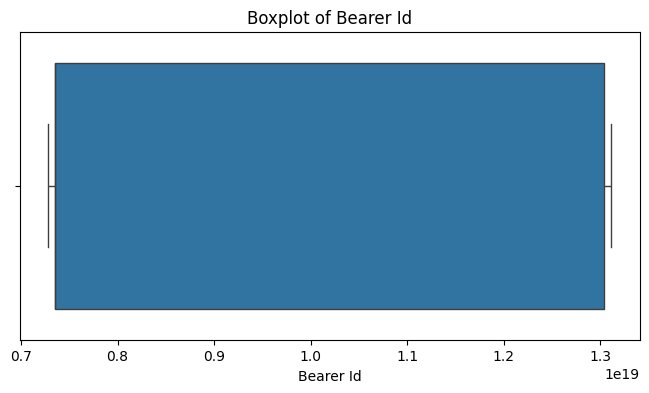

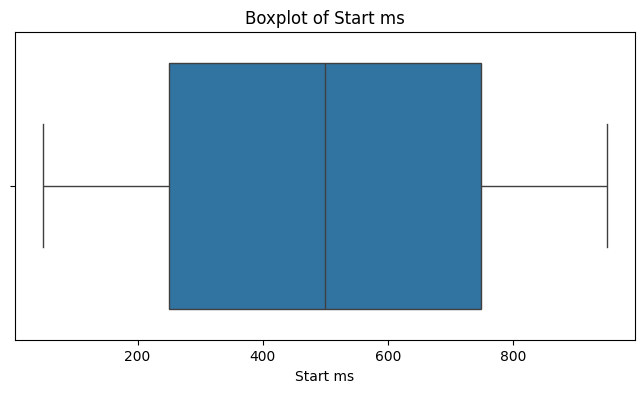

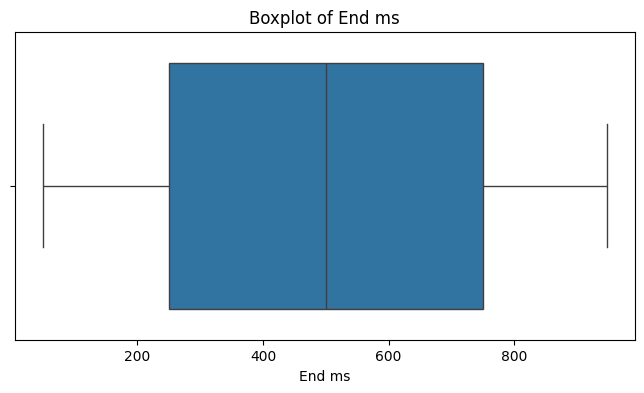

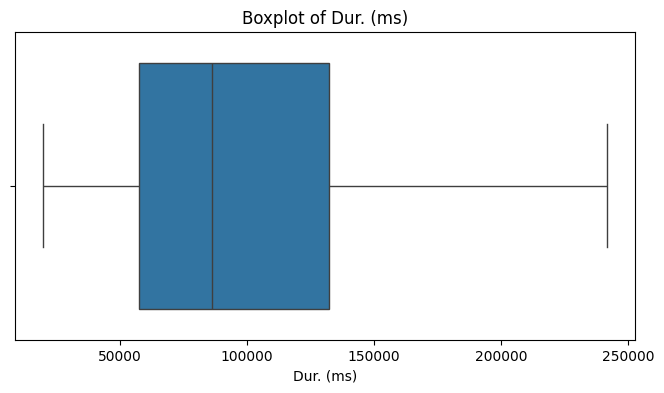

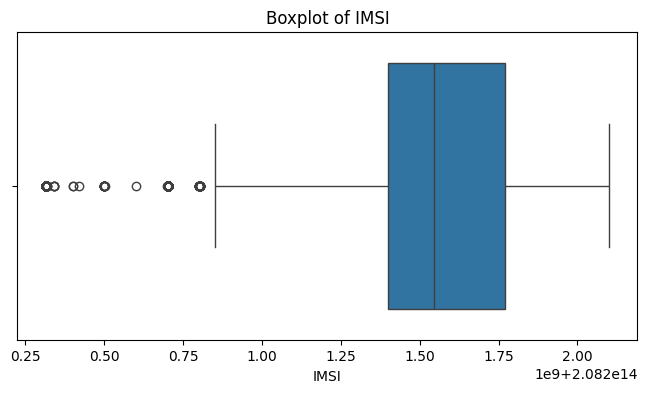

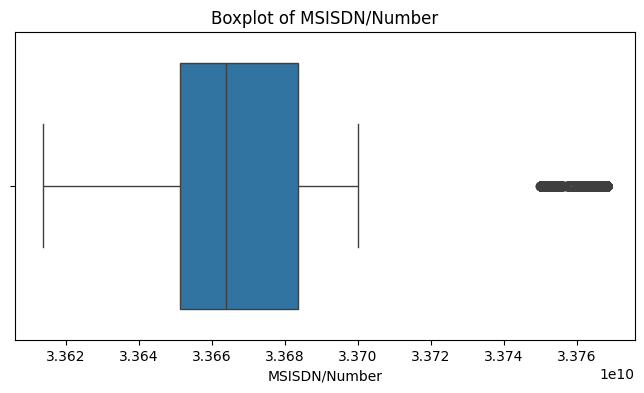

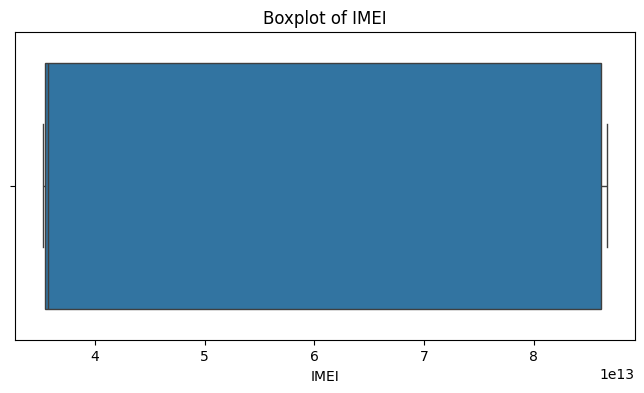

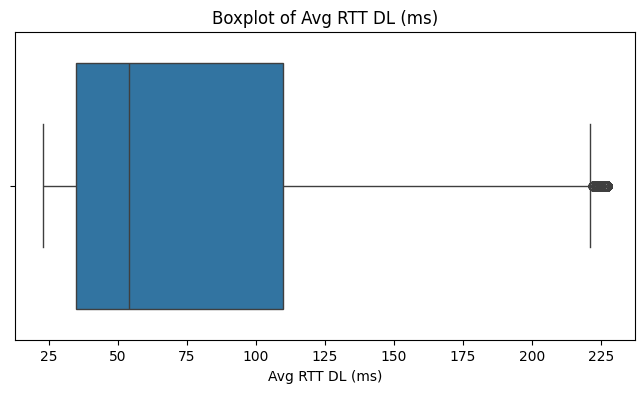

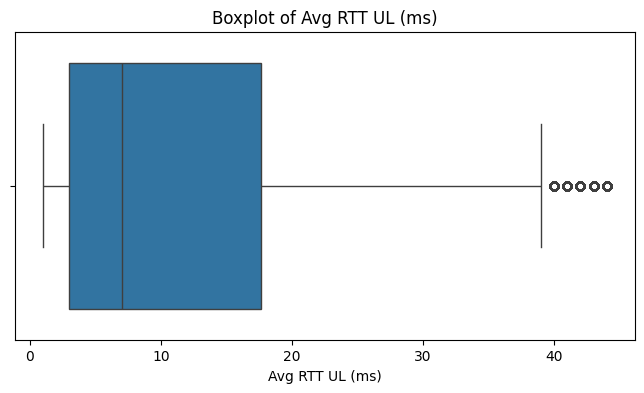

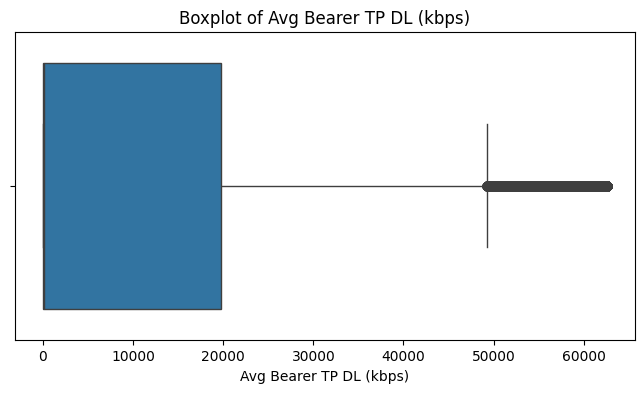

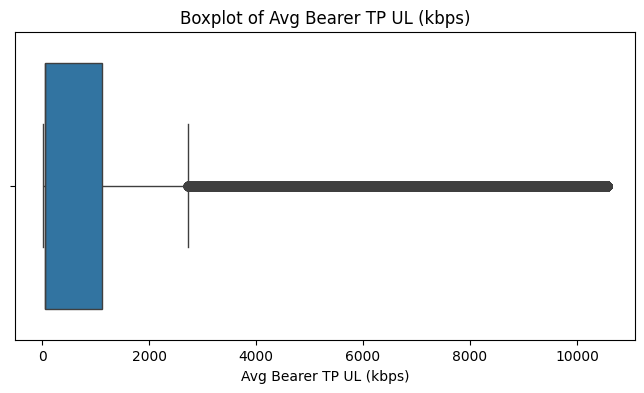

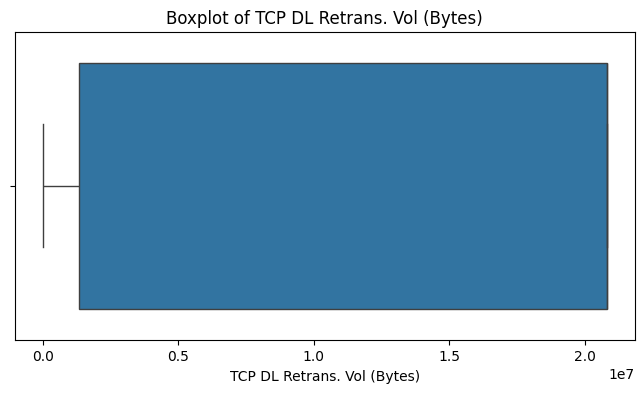

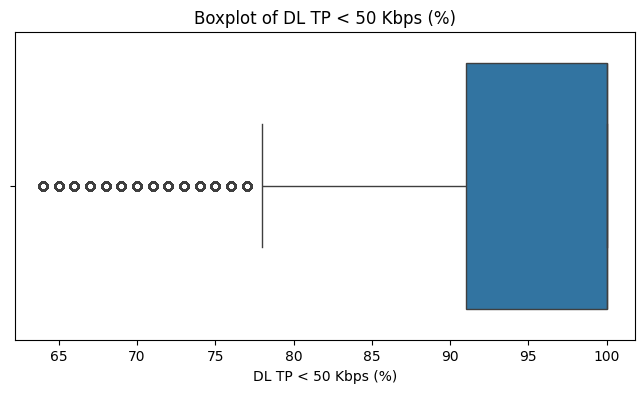

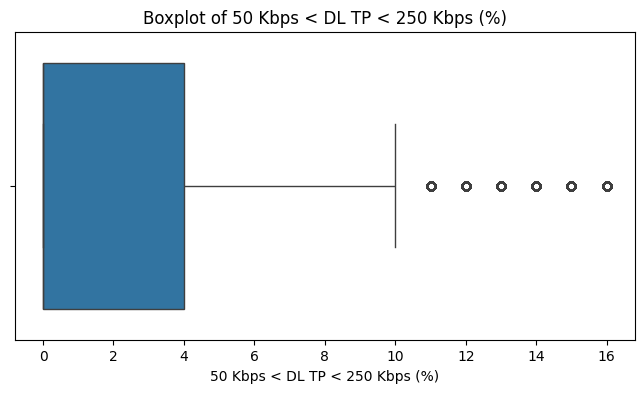

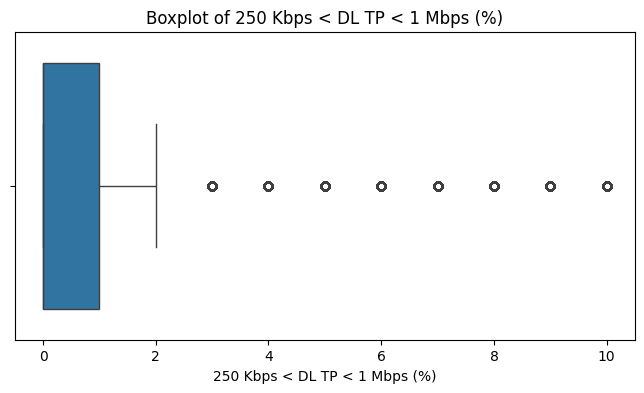

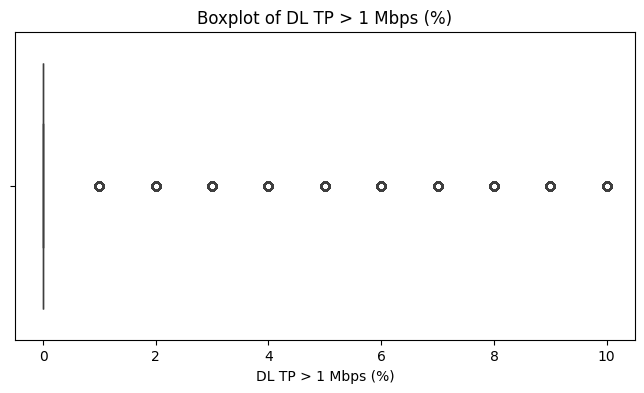

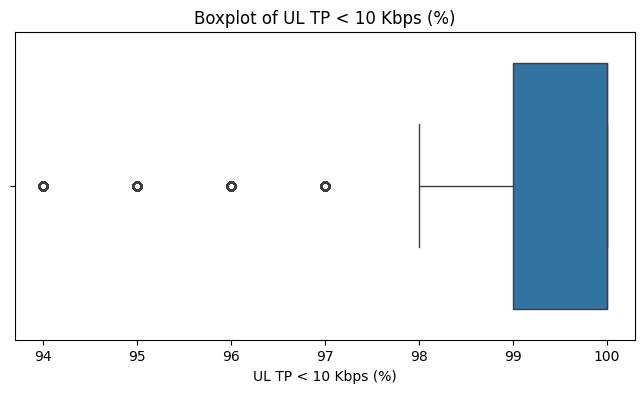

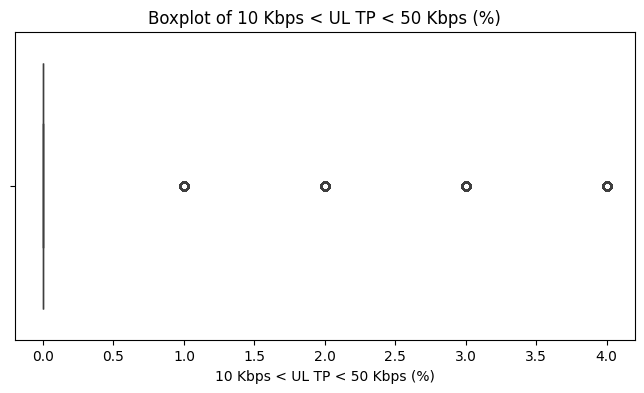

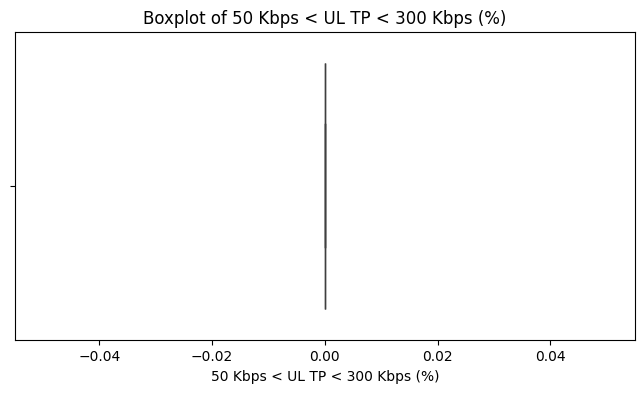

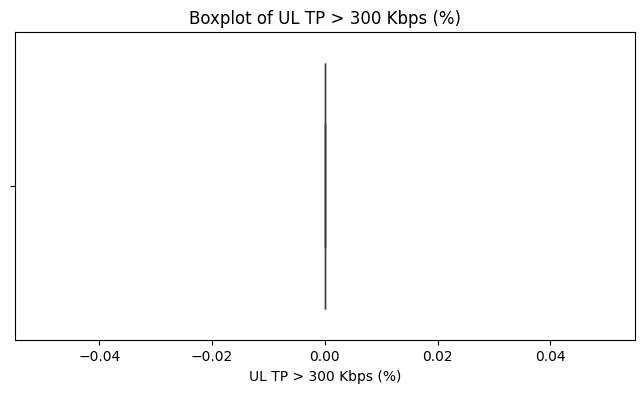

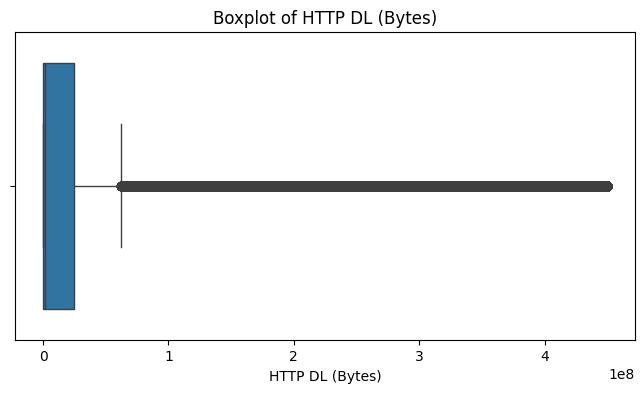

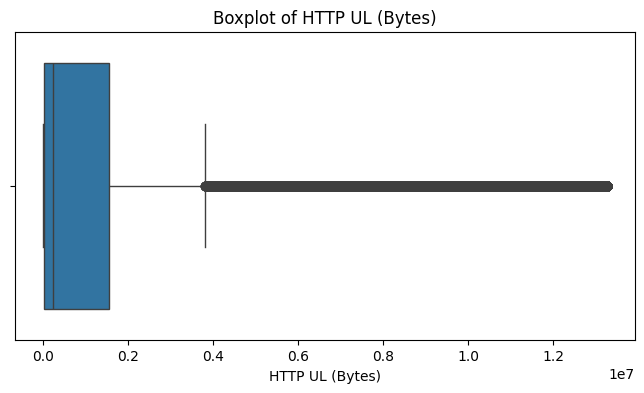

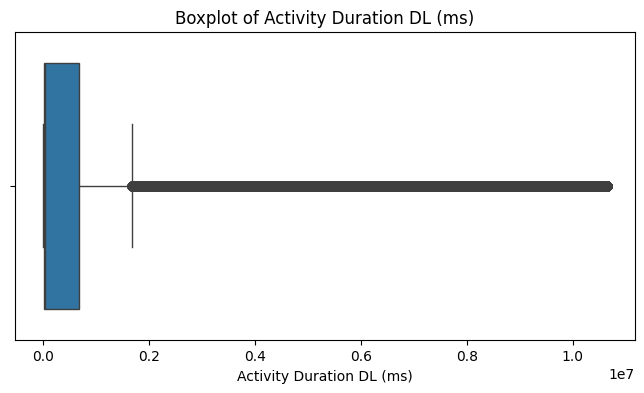

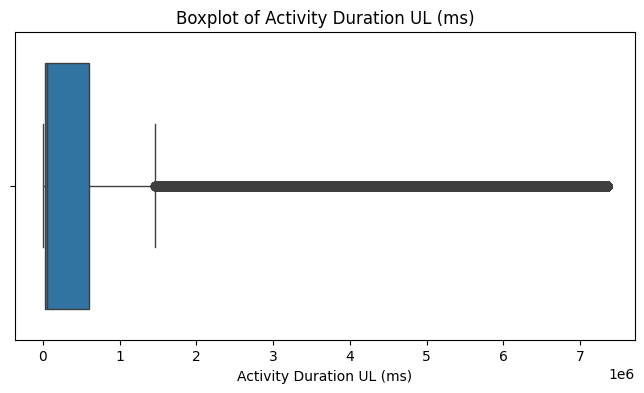

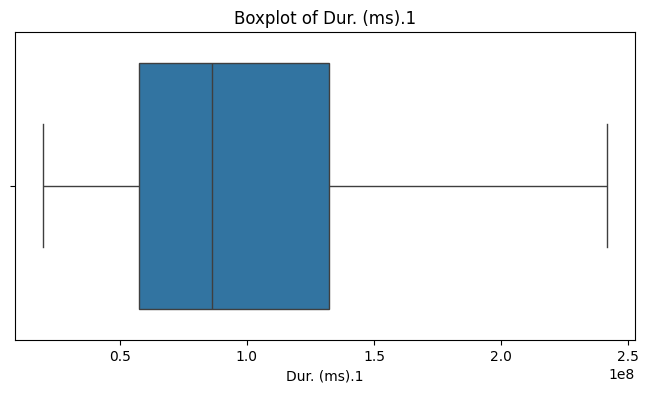

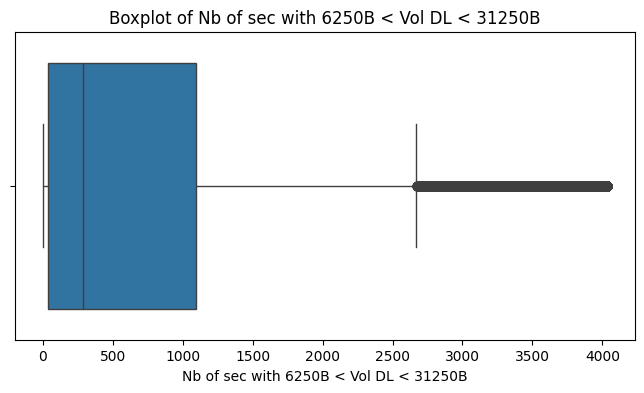

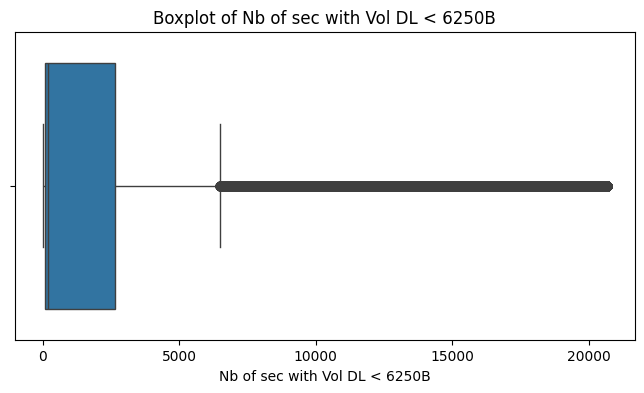

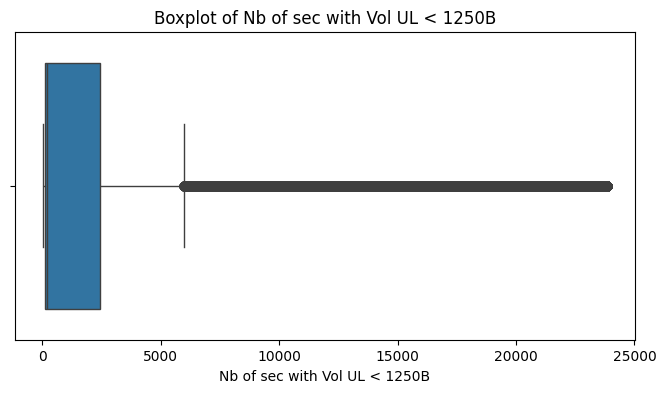

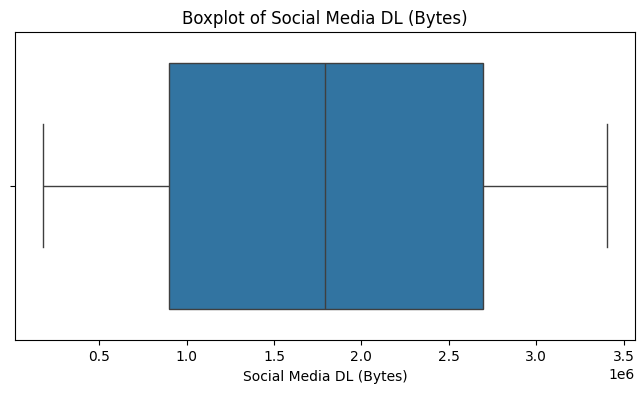

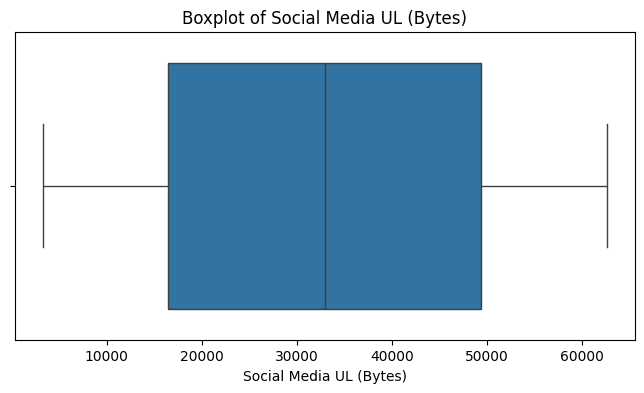

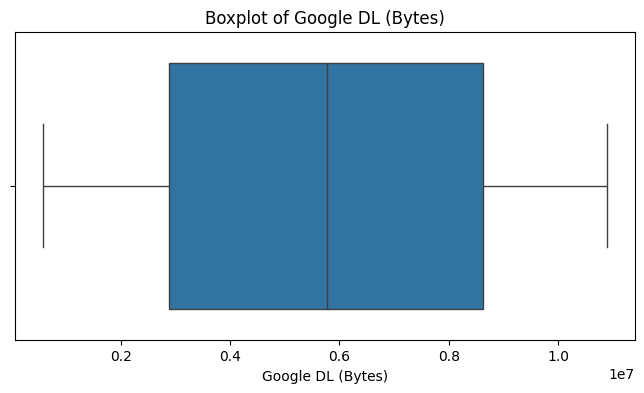

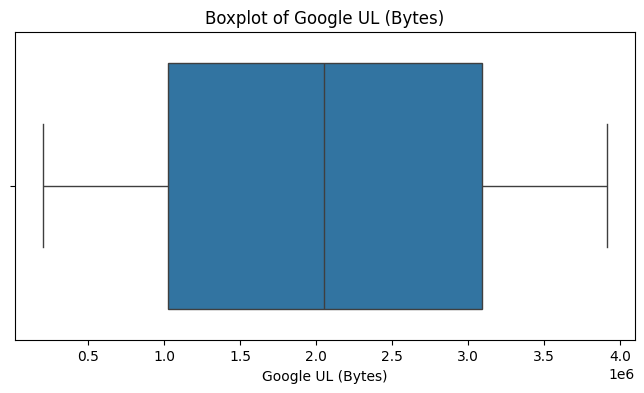

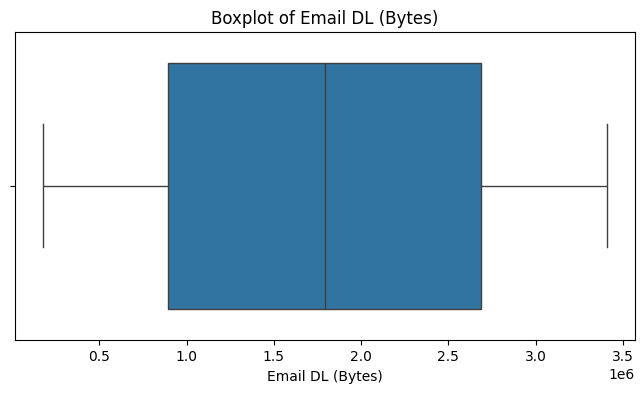

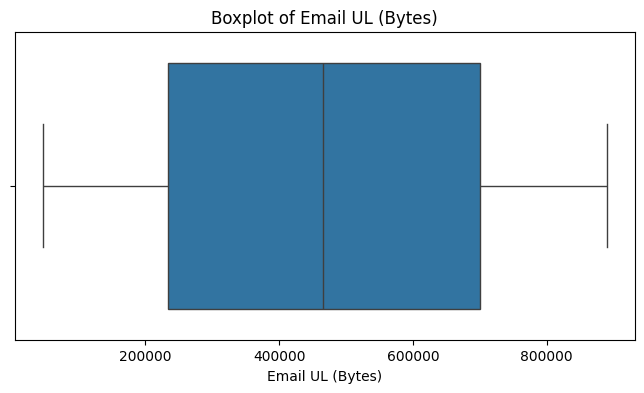

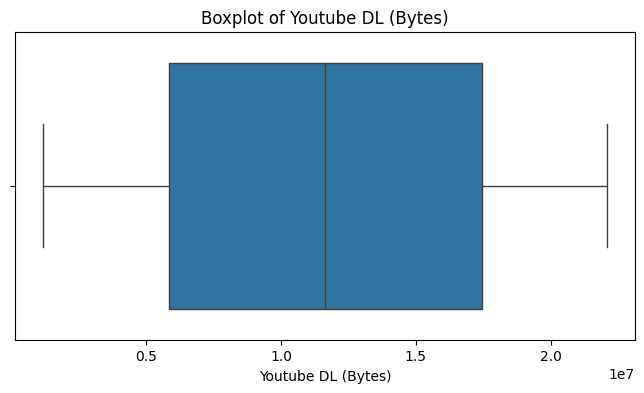

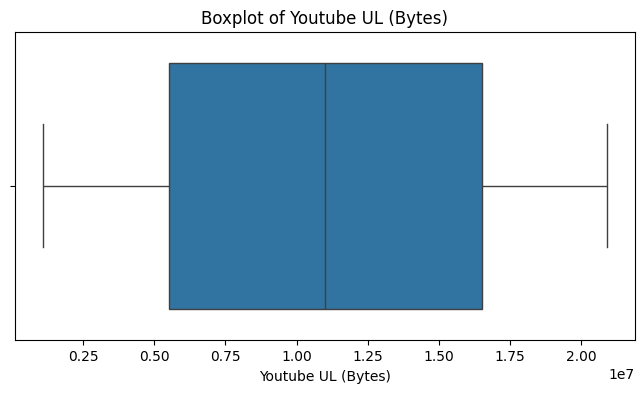

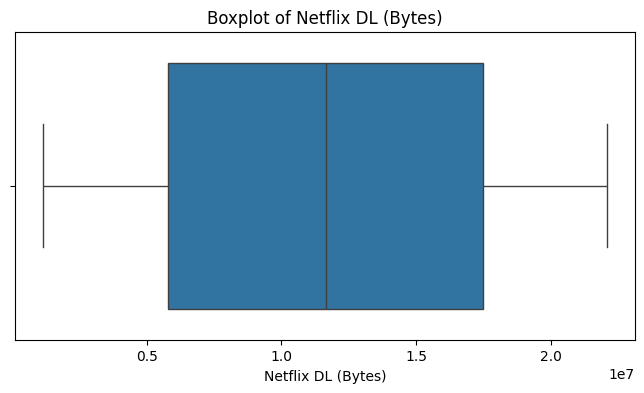

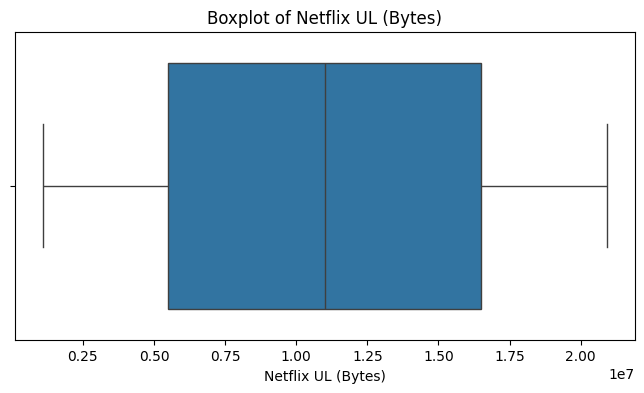

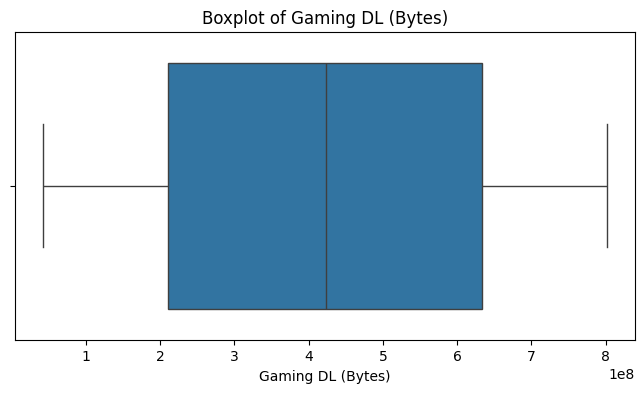

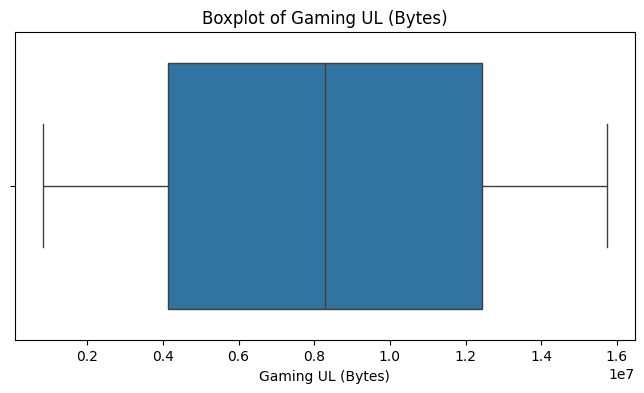

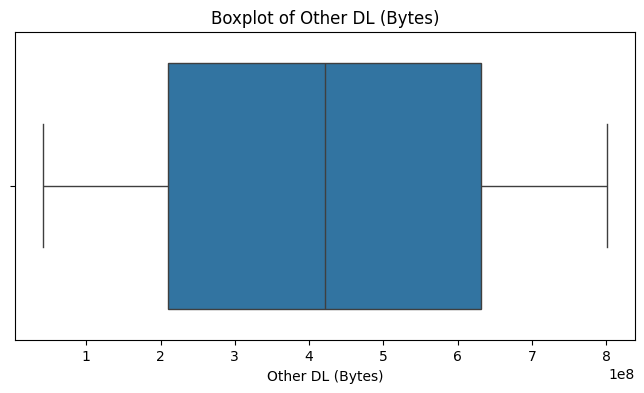

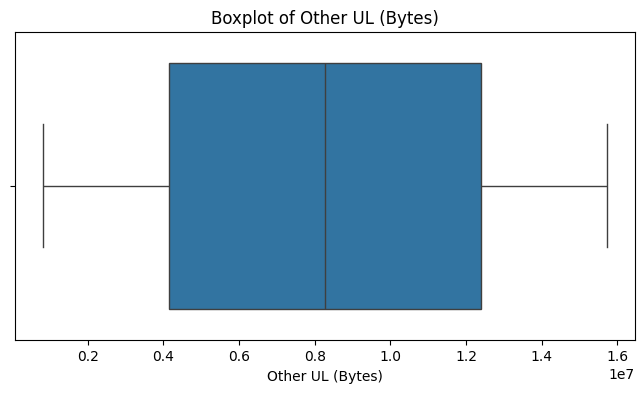

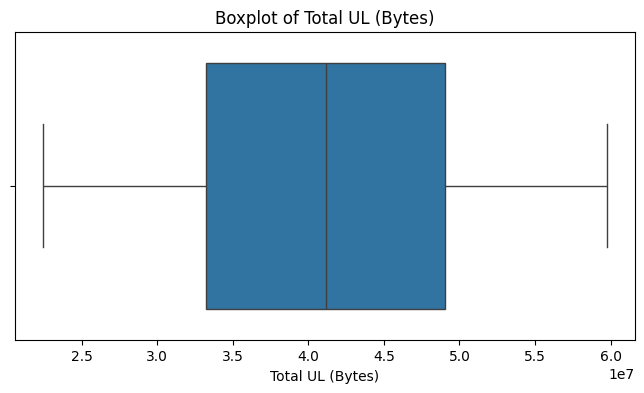

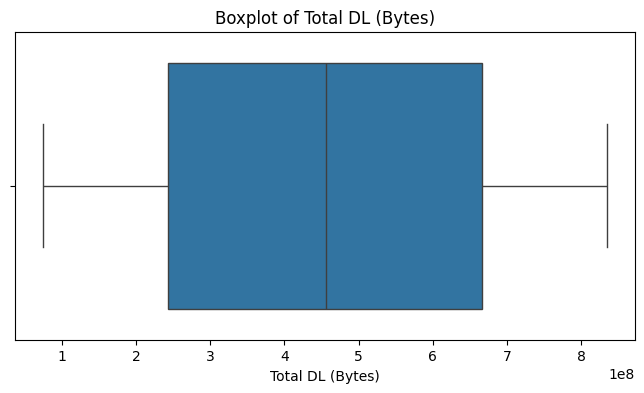

In [16]:
# Boxplot for numerical features
numerical_cols = data_tel.select_dtypes(include=["float64", "int64"]).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_tel, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


In [17]:
data_tel

Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42      49.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   947.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN   4/29/2019 7:28       NaN  4/30/2019 10:40     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       241538.05  2.082014e+14   3.366496e+10  3.552121e+13   
1       241538.05  2.082019e+14   3.368185e+10  3.579401e+13   
2       241538.05  2.082003e+14   3.376063e+10  3.528151e+13   
3       241538.05  2.082014e+14   3.375034e+10  3.535661e+13   
4       241538.05  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996   81230.00  2.082021e+14   3.365069e+10  3.548311e+13   
149997   97970.00  2.082019e+14   3.366345e+10  3.566051e+13   
149998   98249.00  2.082017e+14   3.362189e+10  3.572121e+13   
149999   97910.00  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...        1.585461e+07        2.501332e+06   
1                     L77566A  ...        2.024740e+07        1.911173e+07   
2                     D42335A  ...        1.972566e+07        1.469958e+07   
3                     T21824A  ...        2.138812e+07        1.514664e+07   
4                     D88865A  ...        1.525938e+07        1.896287e+07   
...                       ...  ...                 ...                 ...   
149996                D20434A  ...        1.619167e+07        1.176343e+07   
149997                D10223C  ...        1.387723e+07        8.288284e+06   
149998                T51102A  ...        2.207702e+07        1.855903e+06   
149999                L88342B  ...        8.817106e+06        8.305402e+06   
150000                D41377B  ...        1.163407e+07        1.100941e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8.198936e+06        9.656251e+06       2.780823e+08   
1             1.833841e+07        1.722713e+07       6.087501e+08   
2             1.758779e+07        6.163408e+06       2.295846e+08   
3             1.399465e+07        1.100442e+06       7.995382e+08   
4             1.712458e+07        1.100442e+06       5.277072e+08   
...                    ...                 ...                ...   
149996        1.788370e+07        1.967816e+07       5.266097e+08   
149997        1.935015e+07        2.091186e+07       6.268931e+08   
149998        9.963942e+06        5.065760e+06       5.535395e+08   
149999        3.322253e+06        1.317259e+07       3.525370e+08   
150000        1.162685e+07        1.100175e+07       4.220447e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07      1.717444e+08      8.814393e+06   
1            1.170709e+06      5.269042e+08      1.505514e+07   
2            8.316970e+05      4.106926e+08      4.215763e+06   
3            1.084972e+07      7.490399e+08      1.279728e+07   
4            3.529801e+06      5.507095e+08      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06      4.176727e+07      1.348742e+07   
149997       4.735033e+06      7.121804e+08

SAVING CLEANED DATA

In [4]:
# Load the cleaned dataset
cleaned_data_tel = load_data(r'C:\Users\fikad\Desktop\10acedamy\Week_2\Datacleaned_data_tel.csv')
# Check the first few rows to confirm the dataset is loaded correctly
cleaned_data_tel.head()


Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42      49.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   947.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  241538.05  2.082014e+14   3.366496e+10  3.552121e+13   
1  241538.05  2.082019e+14   3.368185e+10  3.579401e+13   
2  241538.05  2.082003e+14   3.376063e+10  3.528151e+13   
3  241538.05  2.082014e+14   3.375034e+10  3.535661e+13   
4  241538.05  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1100442.0        799538153.0   
4          17124581.0           1100442.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           831697.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       834290122.6  
4       569138589.0  

[5 rows x 49 columns]

In [23]:
# Assuming 'data_tel' is your DataFrame containing the data
decile_data = segment_users_by_decile(cleaned_data_tel)

# Display the result
print(decile_data)

   Decile    Total Data
0     6.0  7.384740e+12
1     7.0  7.752651e+12
2     8.0  7.023099e+12
3     9.0  7.370376e+12
4    10.0  7.414505e+12


c:\Users\fikad\Desktop\10acedamy\Week_2\scripts\analysis.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_deciles['Total Data'] = top_deciles['Total DL (Bytes)'] + top_deciles['Total UL (Bytes)']


#3# Analyze the Basic Metrics (Mean, Median, etc) in the Dataset and Their Importance for the Global Objective

 1. Mean:
The mean (or average) provides an overall idea of the central tendency of the data. It is calculated by summing all values in a column and dividing by the number of values. The mean is useful for understanding the general scale of data usage or other variables.

For example, if you calculate the mean of 'Total Duration', it will give an average of the total duration for all users. This can help you understand how much time, on average, users are spending on the network.

2. Median:
The median represents the middle value of the dataset when it is sorted in ascending or descending order. It is useful in datasets with outliers as it provides a better measure of central tendency compared to the mean. 

For example, if the median of 'Total DL (Bytes)' is significantly lower than the mean, it indicates that a small number of users are consuming an exceptionally high amount of data, skewing the mean.

3. Standard Deviation:
Standard deviation measures the spread or dispersion of the data. A high standard deviation indicates that the values are spread out from the mean, while a low standard deviation suggests that the values are closer to the mean. 

In the case of 'Total Duration', if the standard deviation is large, it could indicate that most users have highly variable usage patterns, which is important for identifying segments that could be targeted with different marketing strategies.

4. Minimum and Maximum:
The minimum and maximum values provide insight into the range of data. The minimum value tells you the least usage, and the maximum tells you the most usage. These values help you understand the extremes and identify users with exceptional behavior, such as high data usage.

5. Percentiles (25th and 75th):
The 25th and 75th percentiles, also known as the lower and upper quartiles, provide information about the spread of the data. The interquartile range (IQR), the difference between the 75th and 25th percentiles, is often used to identify outliers. 

Understanding the IQR for 'Total Data' can help pinpoint segments of users who fall outside of typical usage patterns and may require special attention.

6. Importance for Business Objective:
The global objective is to understand customer behavior and identify opportunities for growth. By analyzing basic metrics, we can:
- Identify high-usage segments that are more profitable.
- Discover low-usage segments that may need additional services or marketing efforts.
- Recognize outliers that may indicate potential problems (e.g., data overages, network issues) or opportunities (e.g., upselling to heavy data users).
- Tailor business strategies, product offerings, and marketing campaigns to the most promising segments based on these insights.


In [8]:
basic_metrics = calculate_basic_metrics(cleaned_data_tel)
print("Basic Metrics:\n", basic_metrics)

Basic Metrics:
                                                 mean        median  \
Bearer Id                               1.015307e+19  7.349883e+18   
Start ms                                4.991697e+02  4.990000e+02   
End ms                                  4.987500e+02  5.000000e+02   
Dur. (ms)                               9.964246e+04  8.639900e+04   
IMSI                                    2.082015e+14  2.082015e+14   
MSISDN/Number                           3.367432e+10  3.366371e+10   
IMEI                                    4.860245e+13  3.572201e+13   
Avg RTT DL (ms)                         7.333586e+01  5.400000e+01   
Avg RTT UL (ms)                         1.230295e+01  7.000000e+00   
Avg Bearer TP DL (kbps)                 1.200931e+04  6.300000e+01   
Avg Bearer TP UL (kbps)                 1.351079e+03  6.300000e+01   
TCP DL Retrans. Vol (Bytes)             1.375620e+07  2.080991e+07   
DL TP < 50 Kbps (%)                     9.348097e+01  1.000000e+02   
50 K

In [ ]:
dispersion_df = analyze_dispersion(cleaned_data_tel)
    # Print the results
print("Dispersion Analysis Results:\n", dispersion_df)

Dispersion Analysis Results:
                                             Variance  Standard Deviation  \
Bearer Id                               8.283461e+36        2.878100e+18   
Start ms                                8.099113e+04        2.845894e+02   
End ms                                  8.058574e+04        2.838763e+02   
Dur. (ms)                               3.404368e+09        5.834696e+04   
IMSI                                    2.071100e+17        4.550934e+08   
MSISDN/Number                           1.893156e+15        4.351041e+07   
IMEI                                    4.924703e+26        2.219167e+13   
Avg RTT DL (ms)                         2.691338e+03        5.187811e+01   
Avg RTT UL (ms)                         1.353274e+02        1.163303e+01   
Avg Bearer TP DL (kbps)                 3.738204e+08        1.933443e+04   
Avg Bearer TP UL (kbps)                 7.371292e+06        2.715012e+03   
TCP DL Retrans. Vol (Bytes)             8.729037e+13      

### Graphical Univariate Analysis

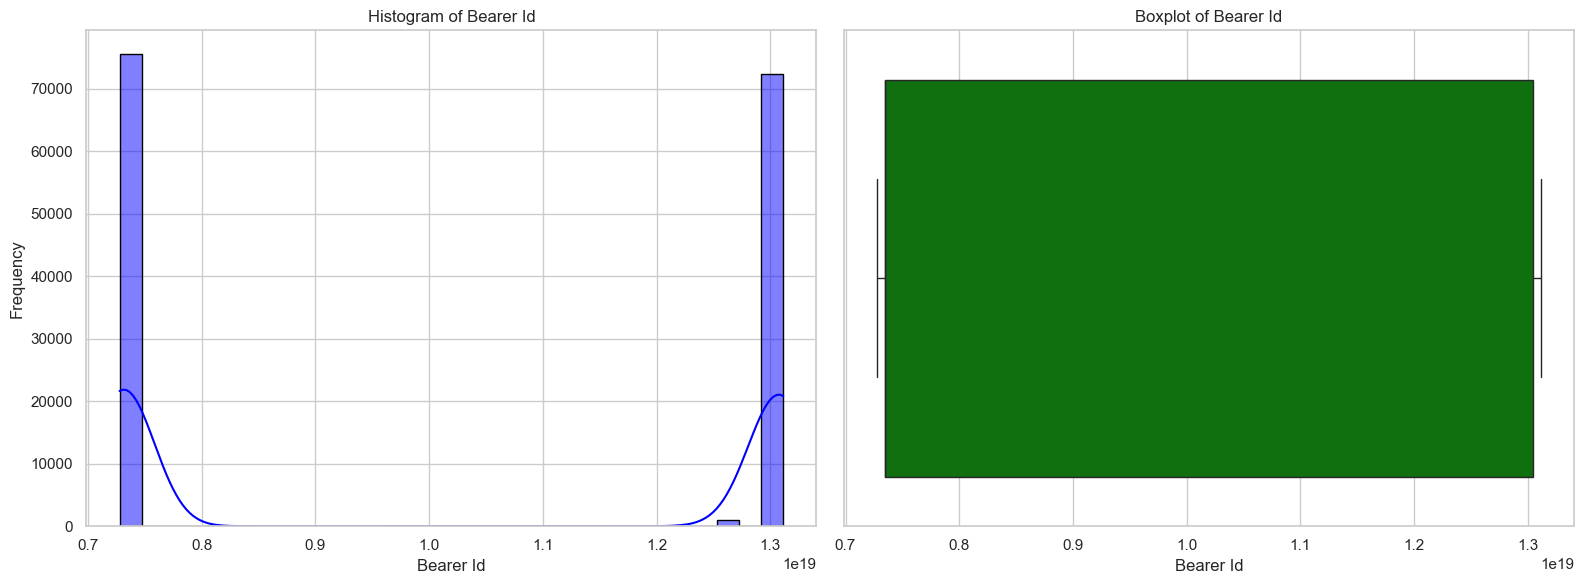

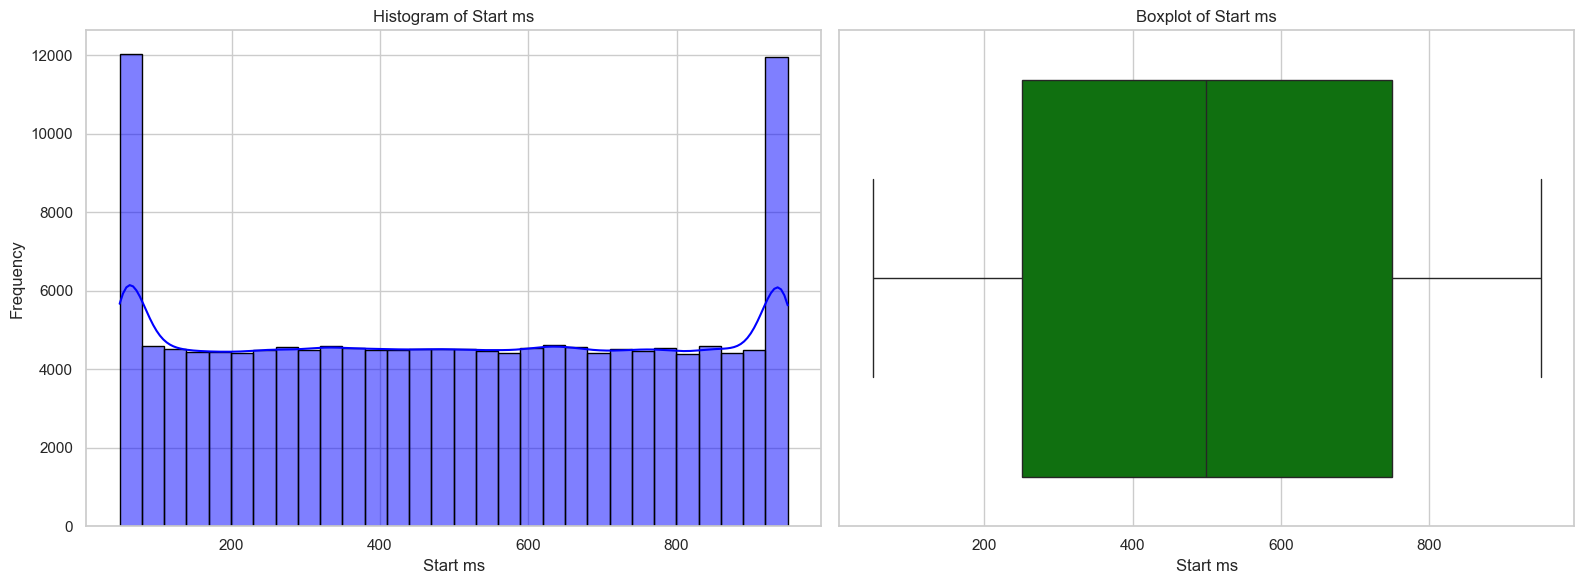

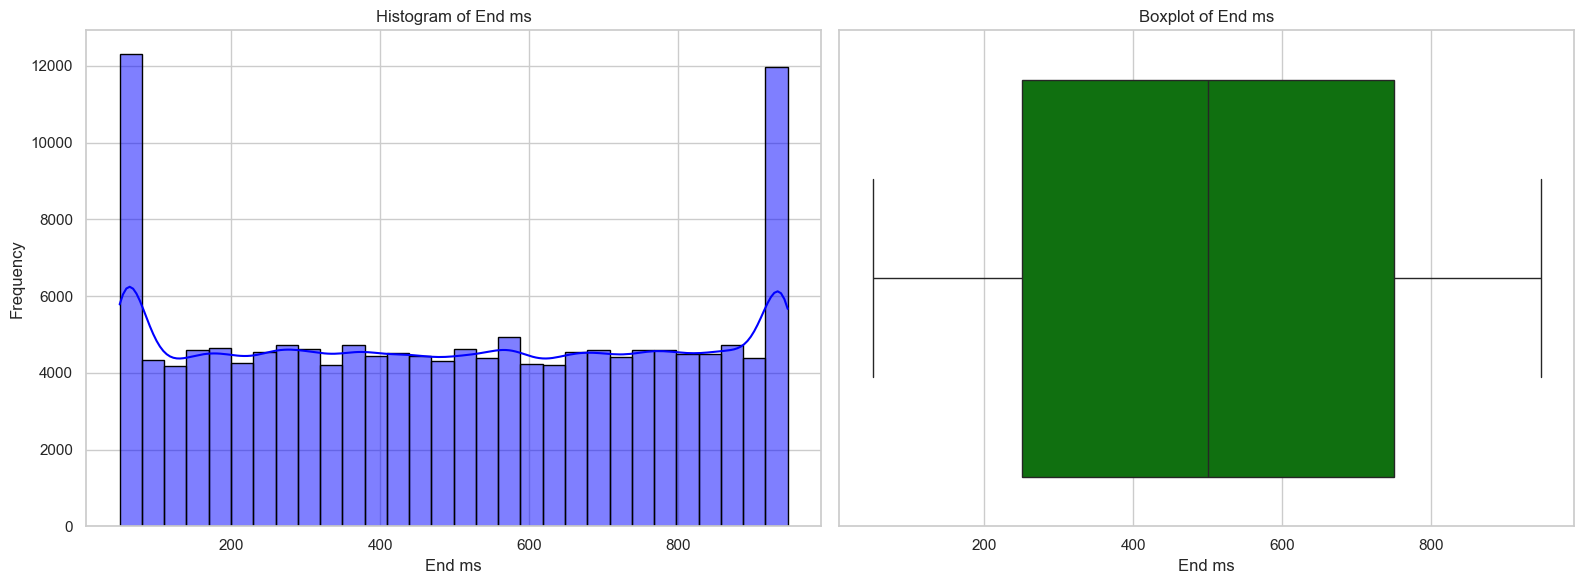

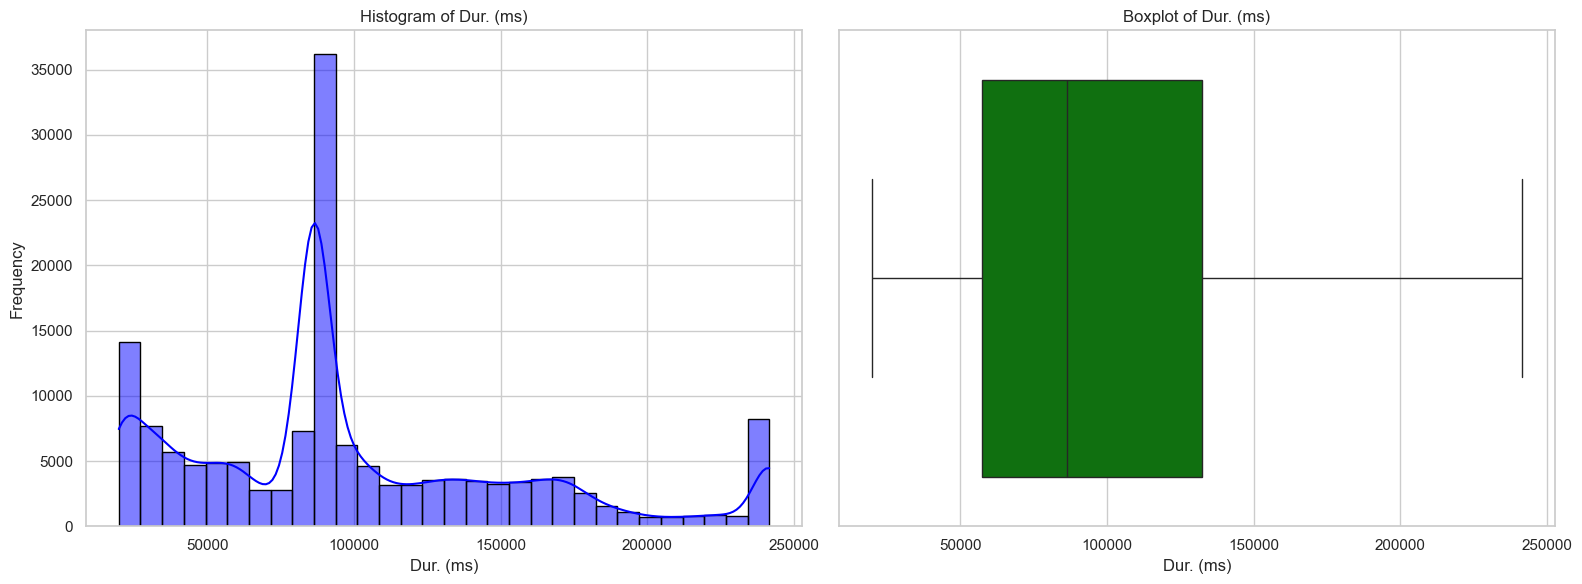

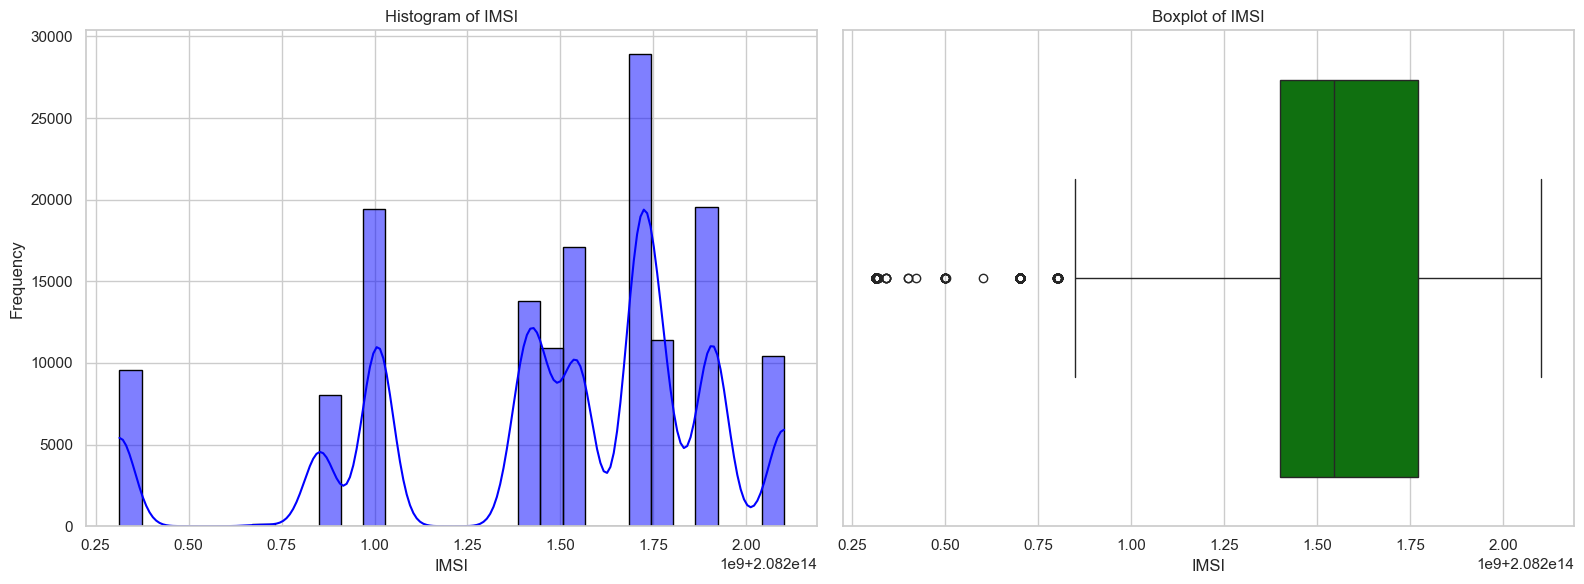

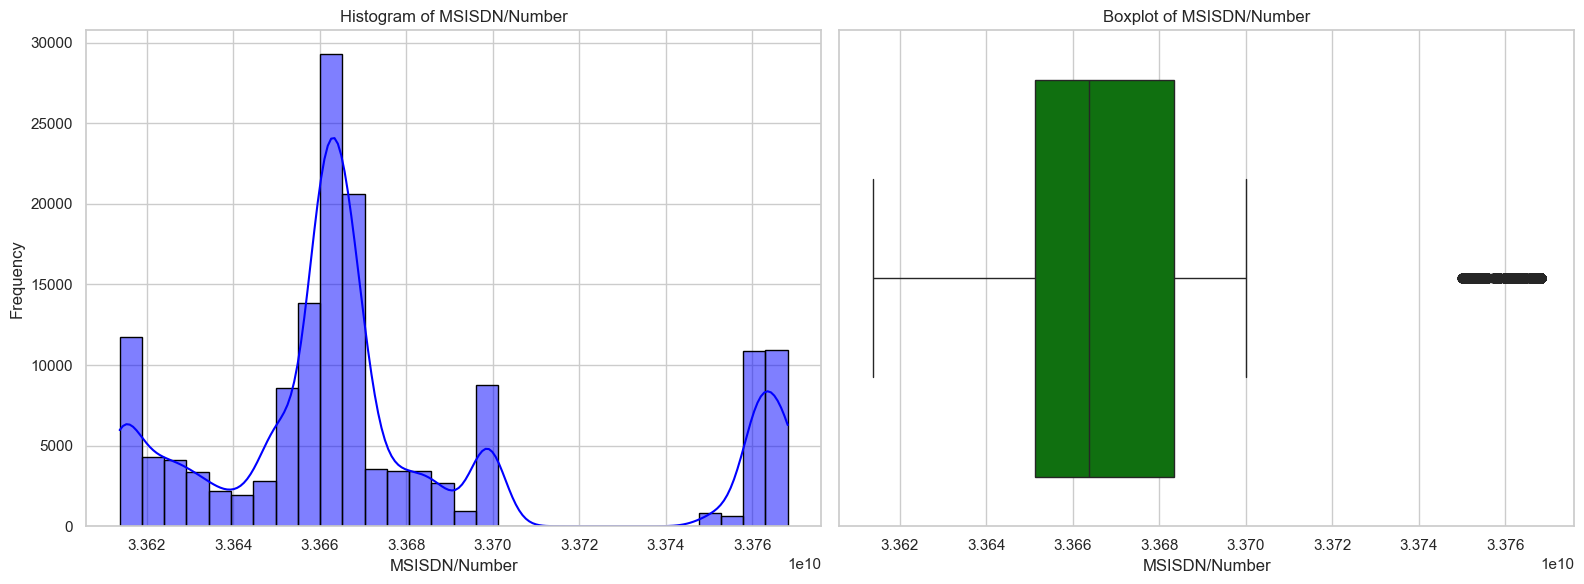

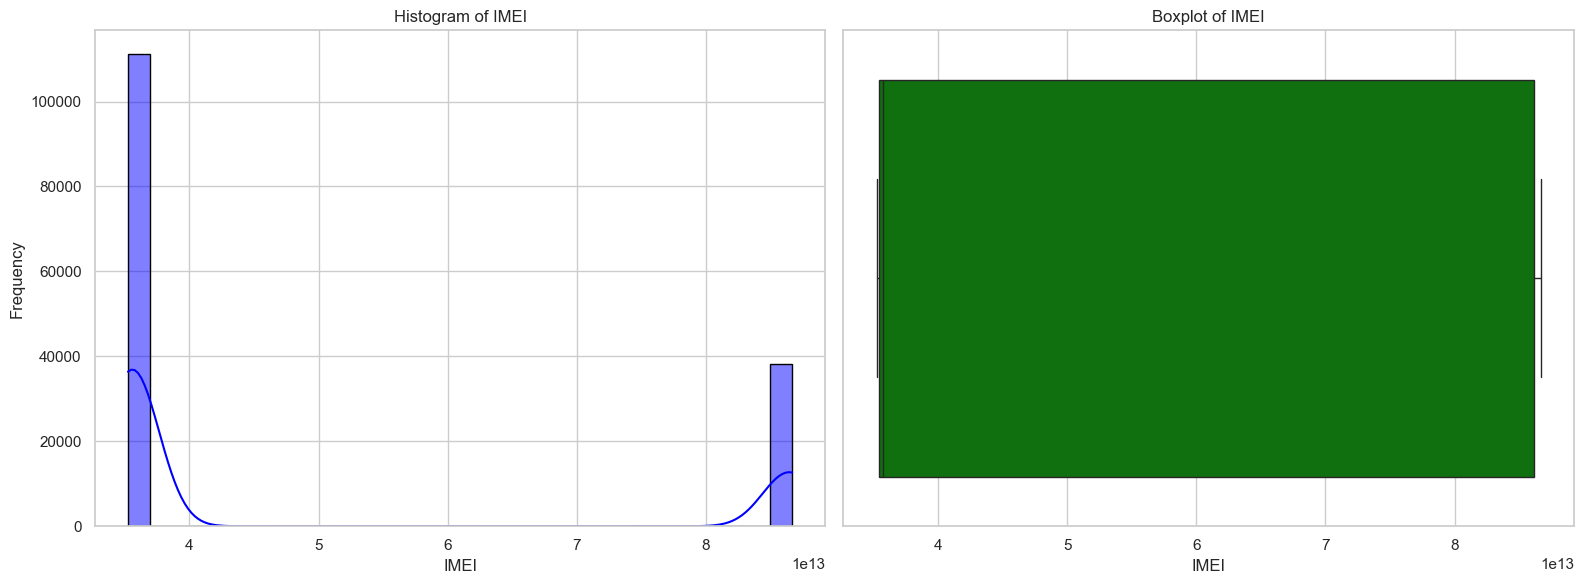

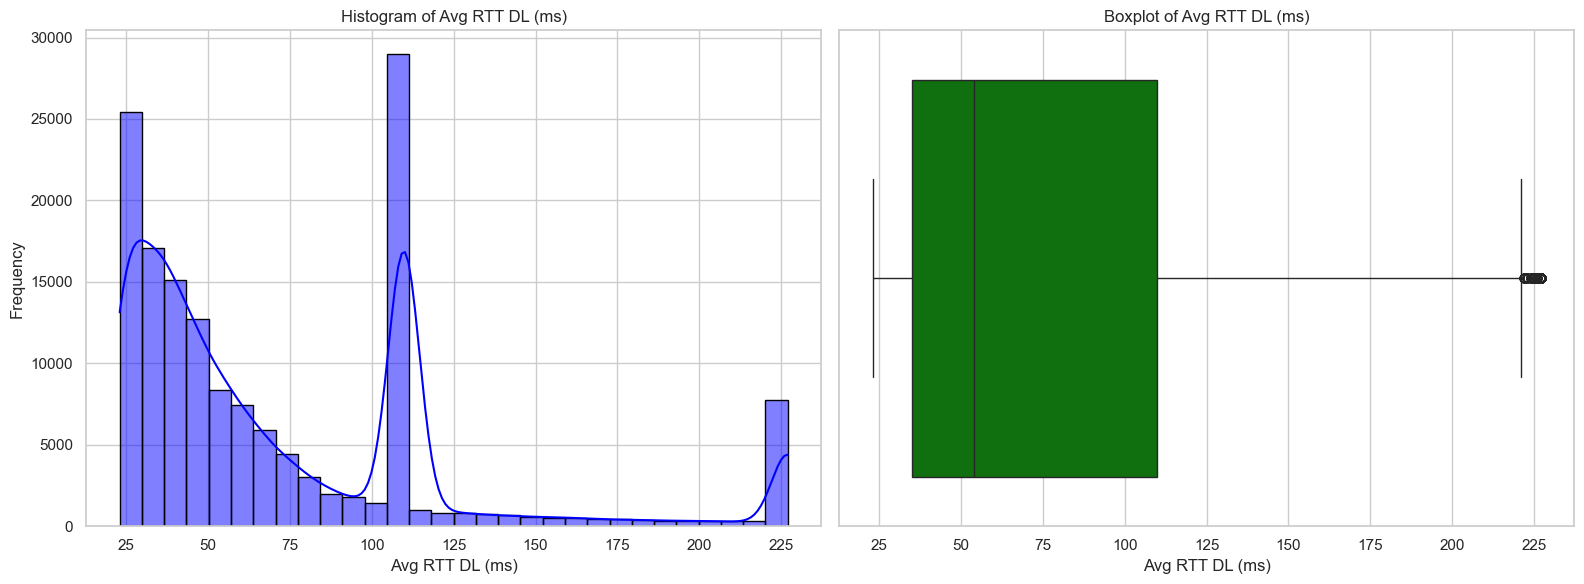

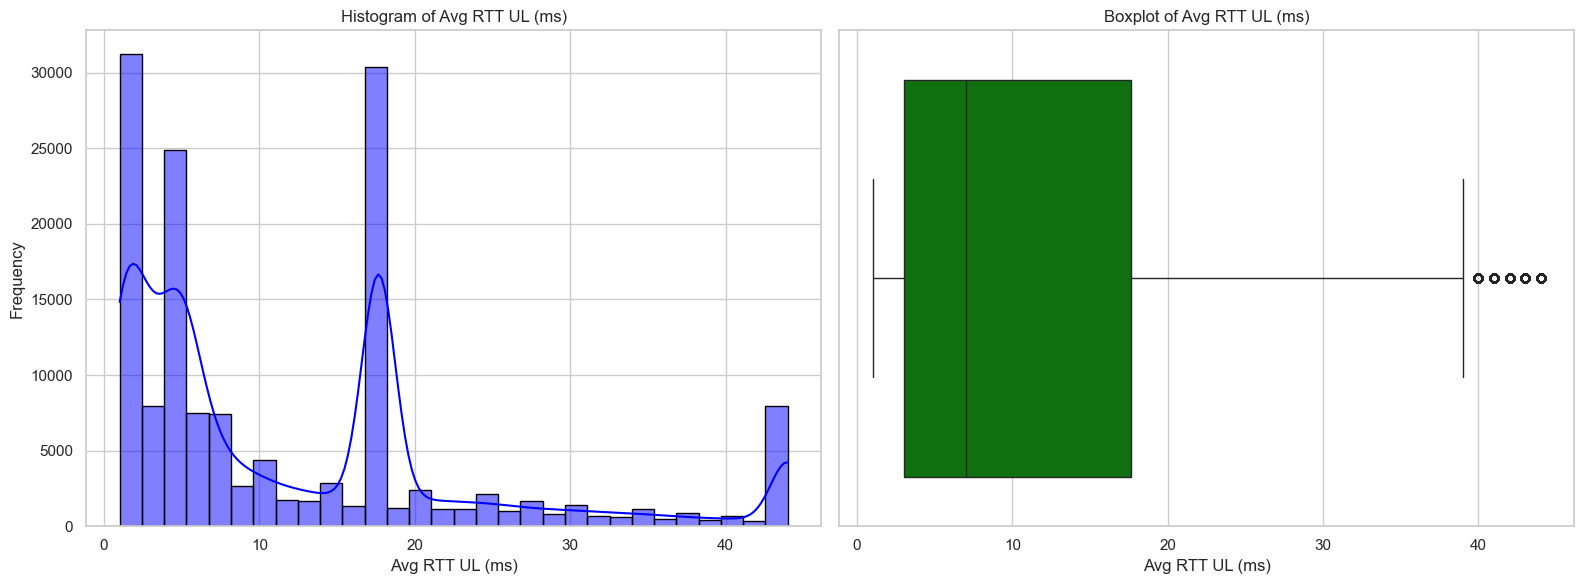

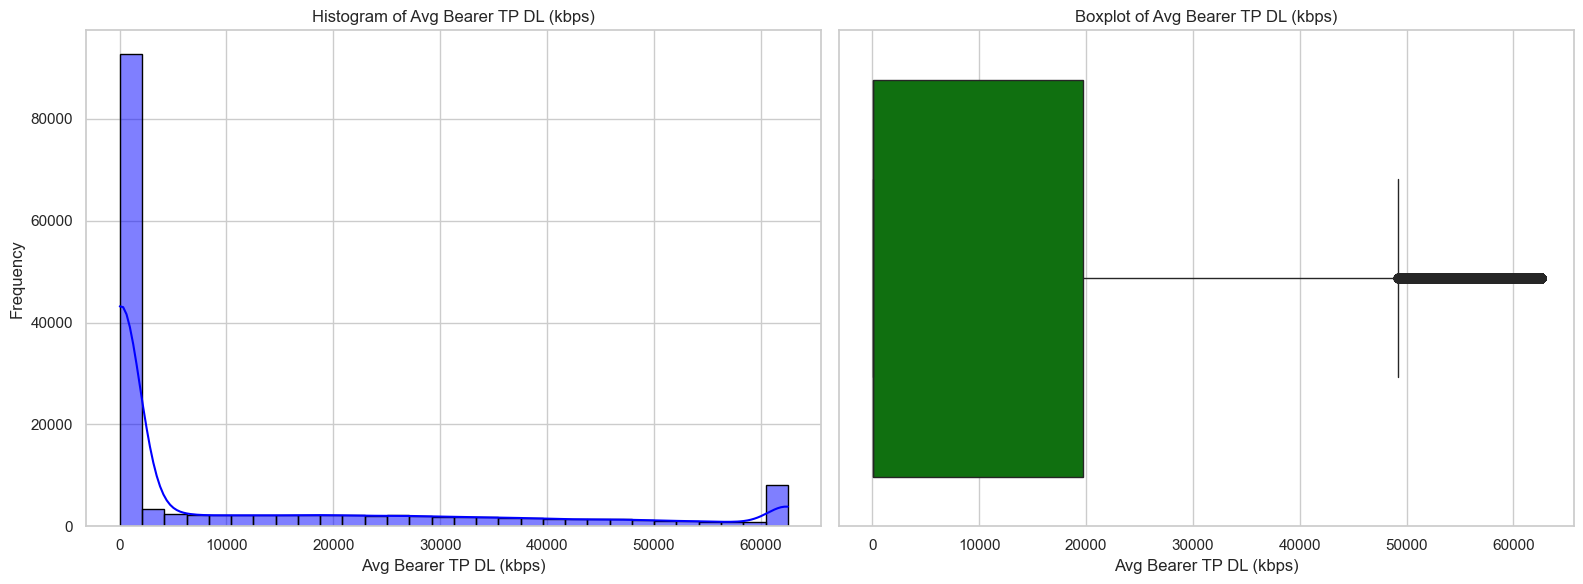

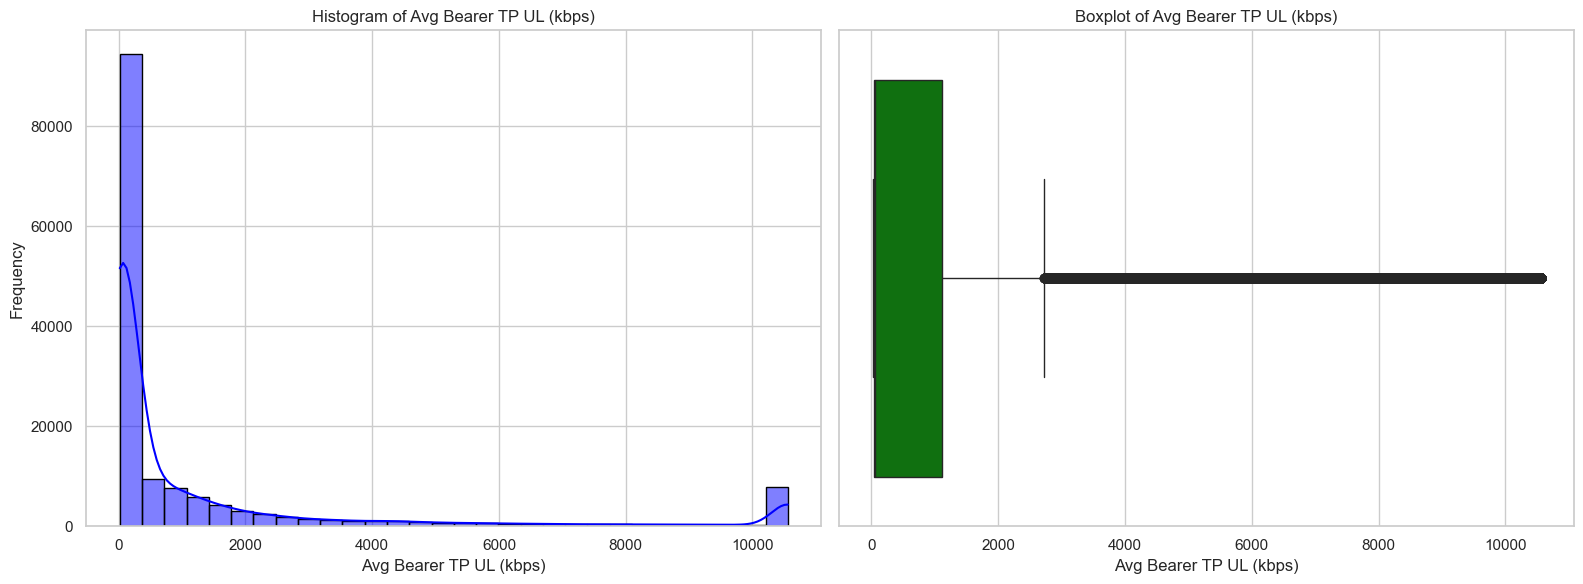

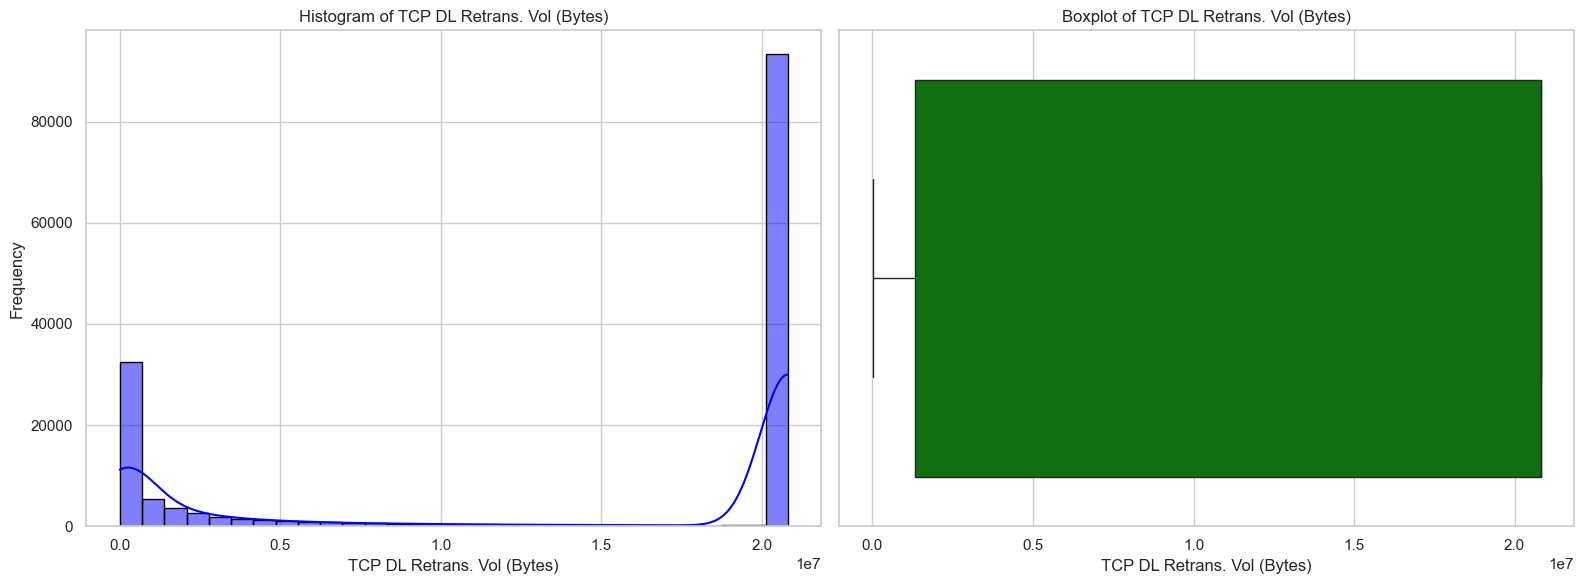

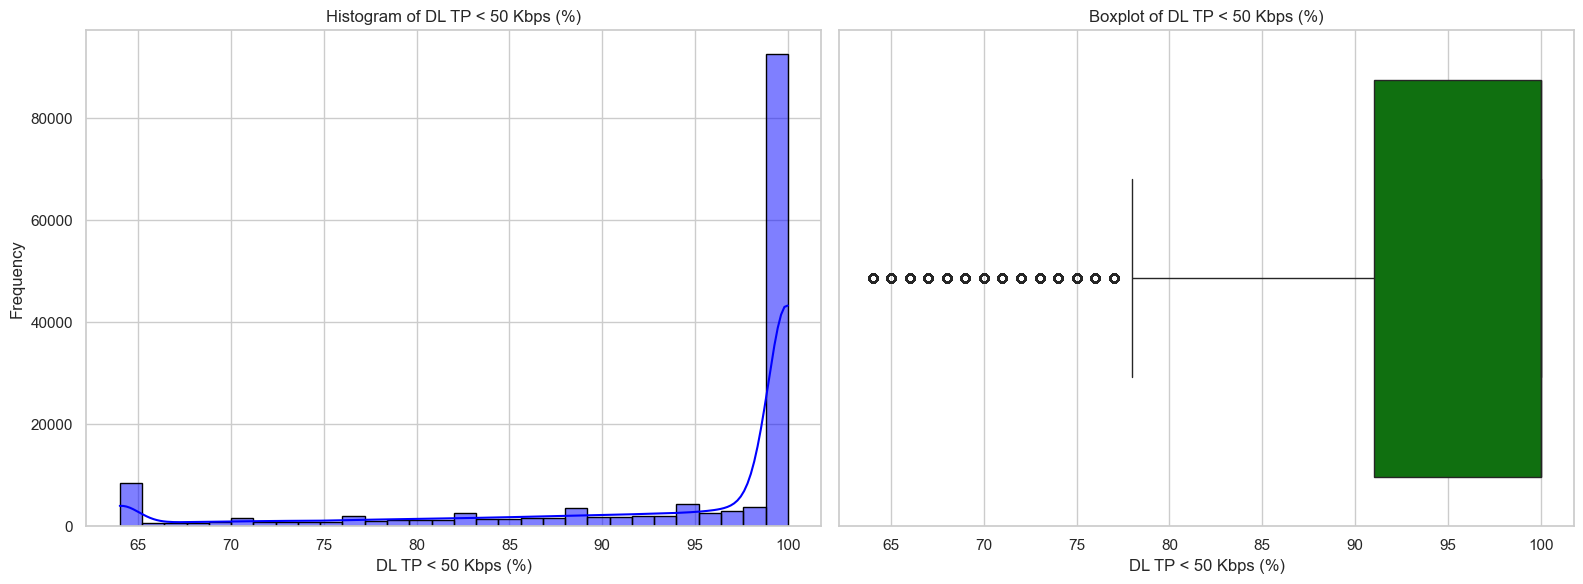

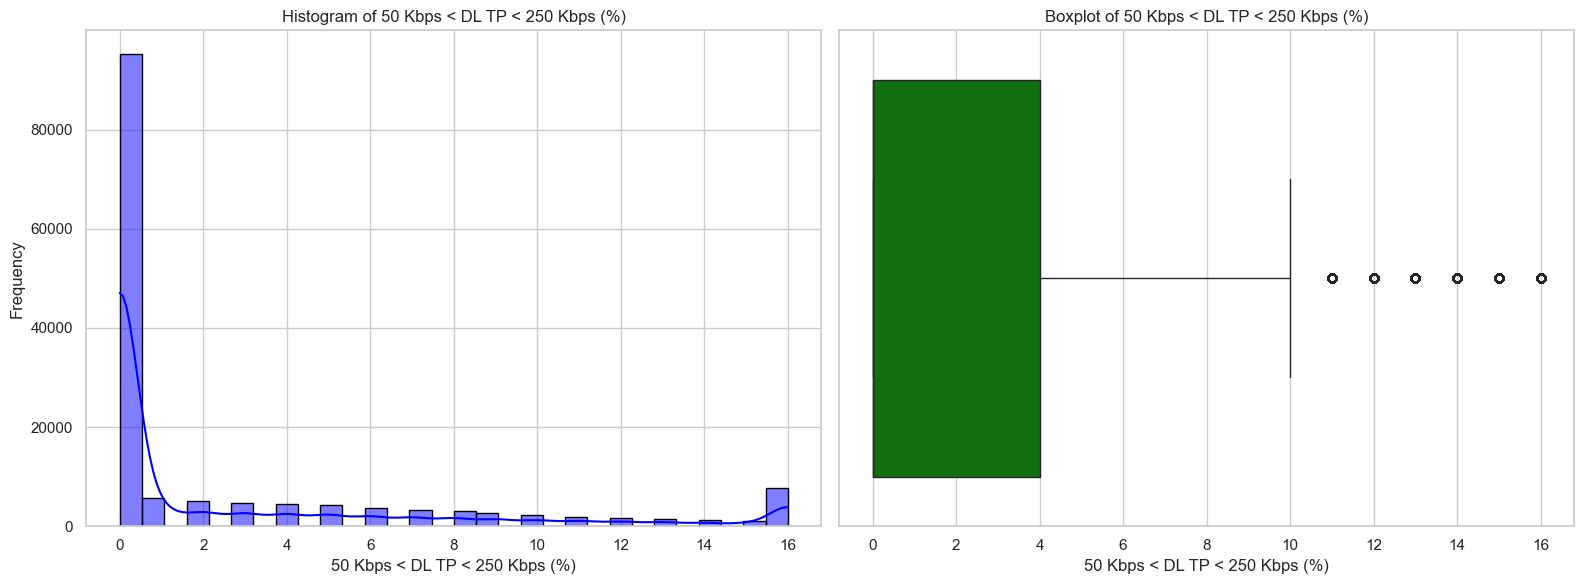

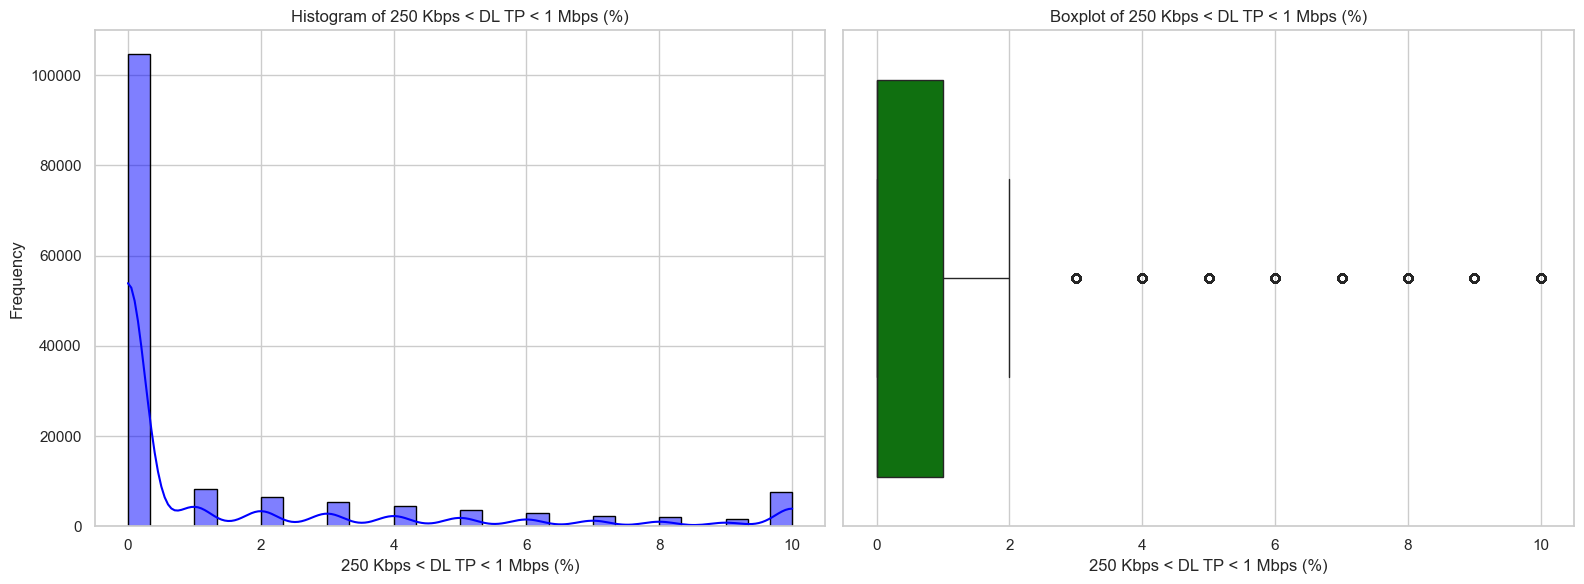

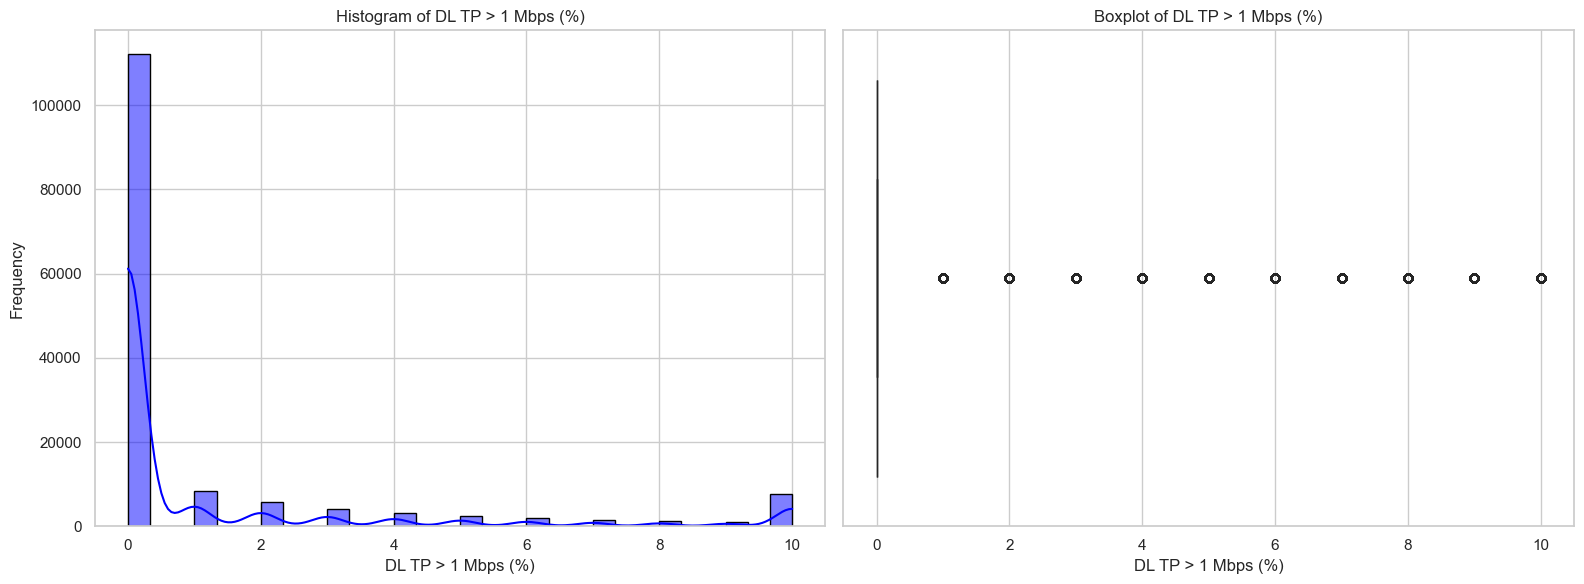

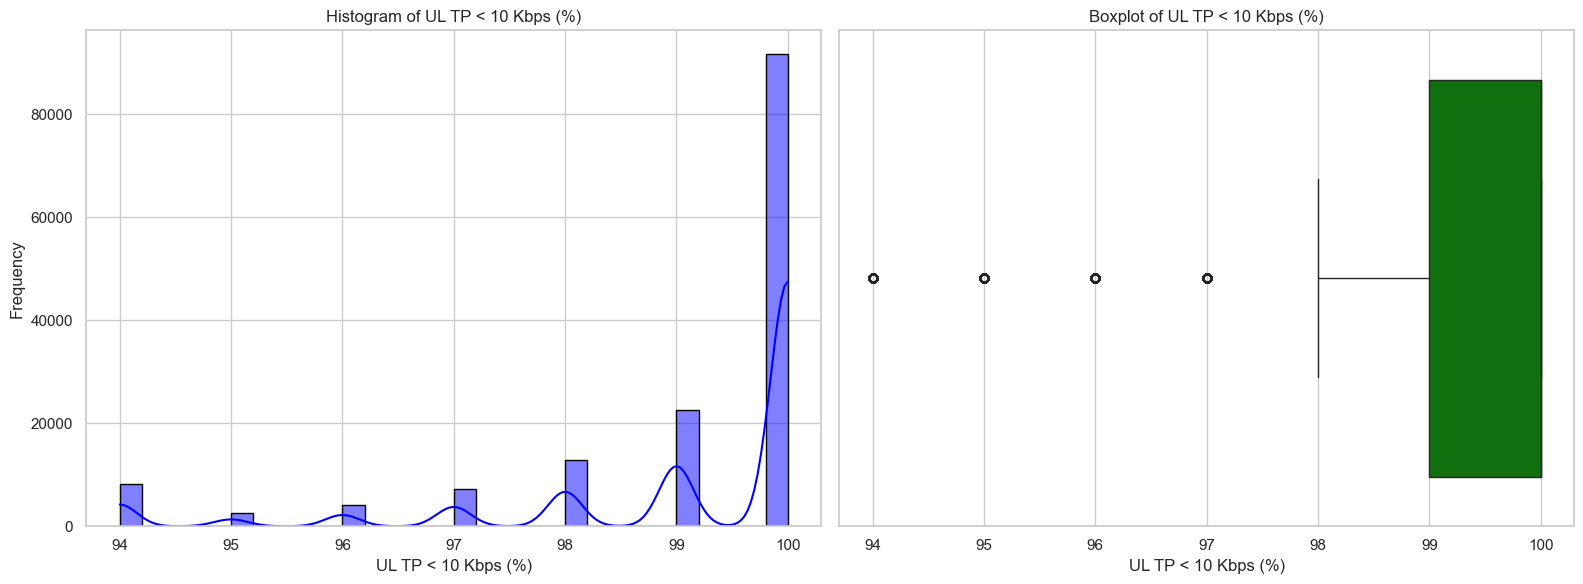

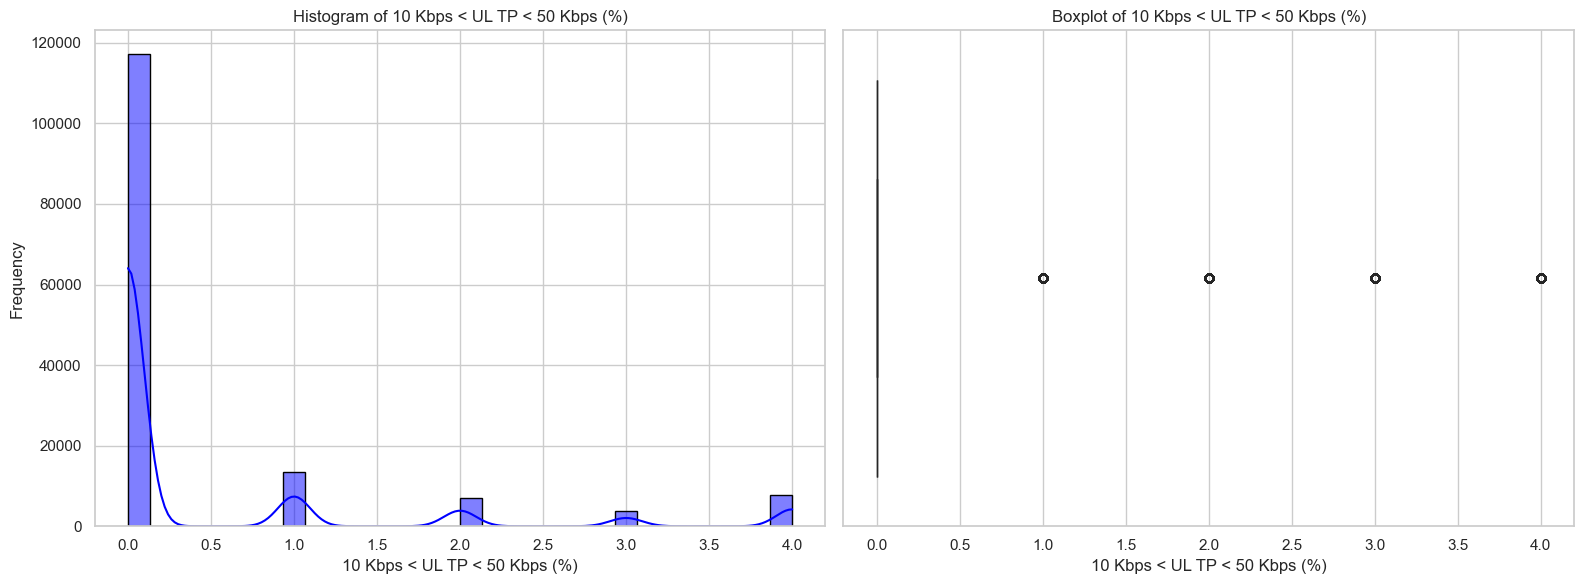

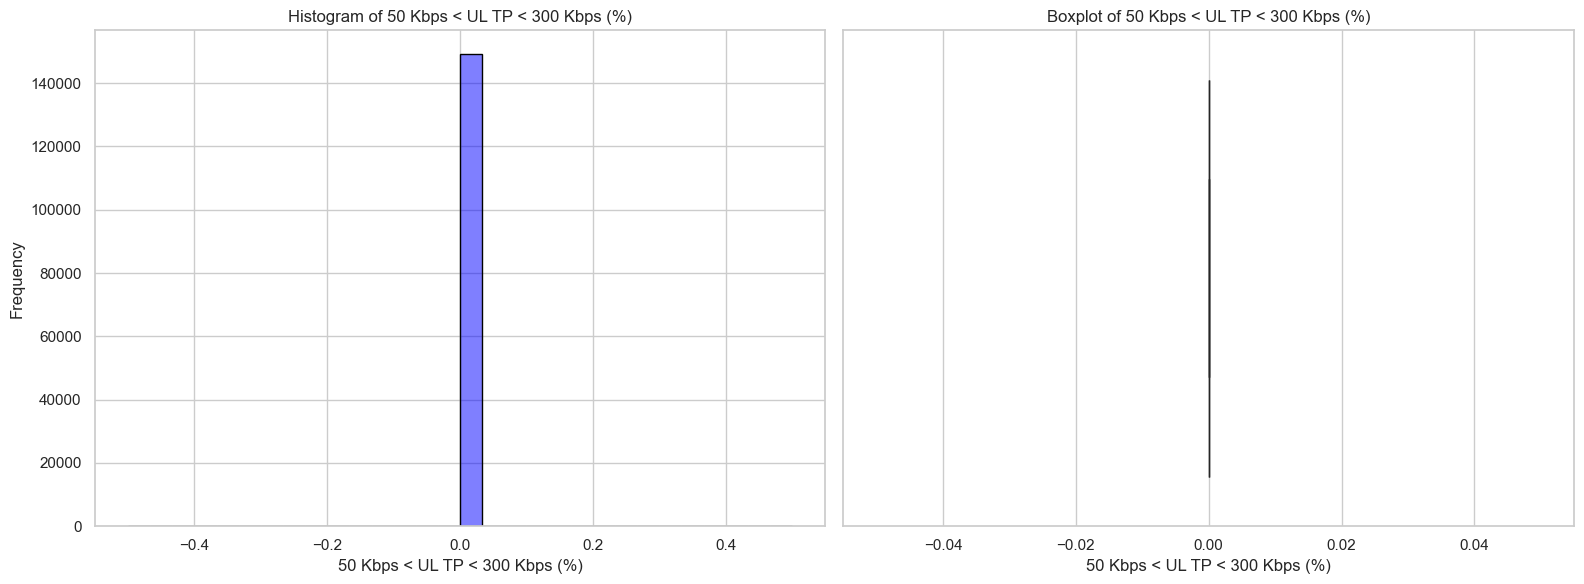

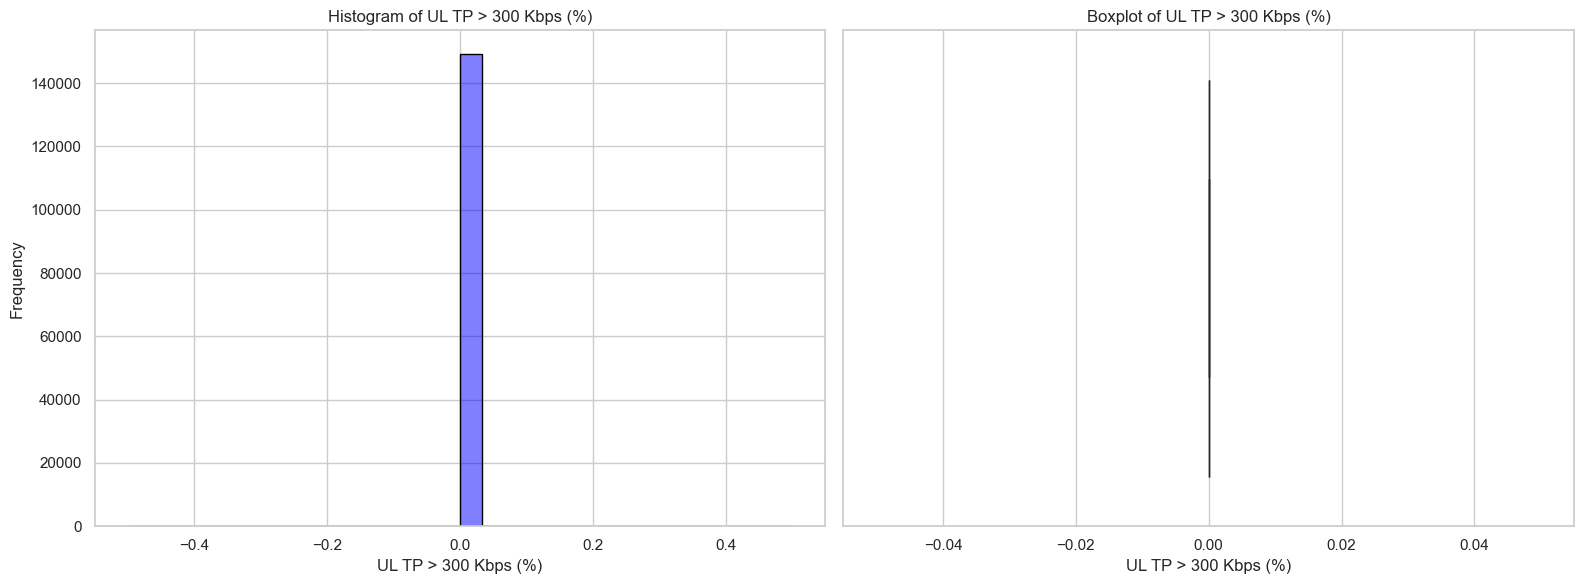

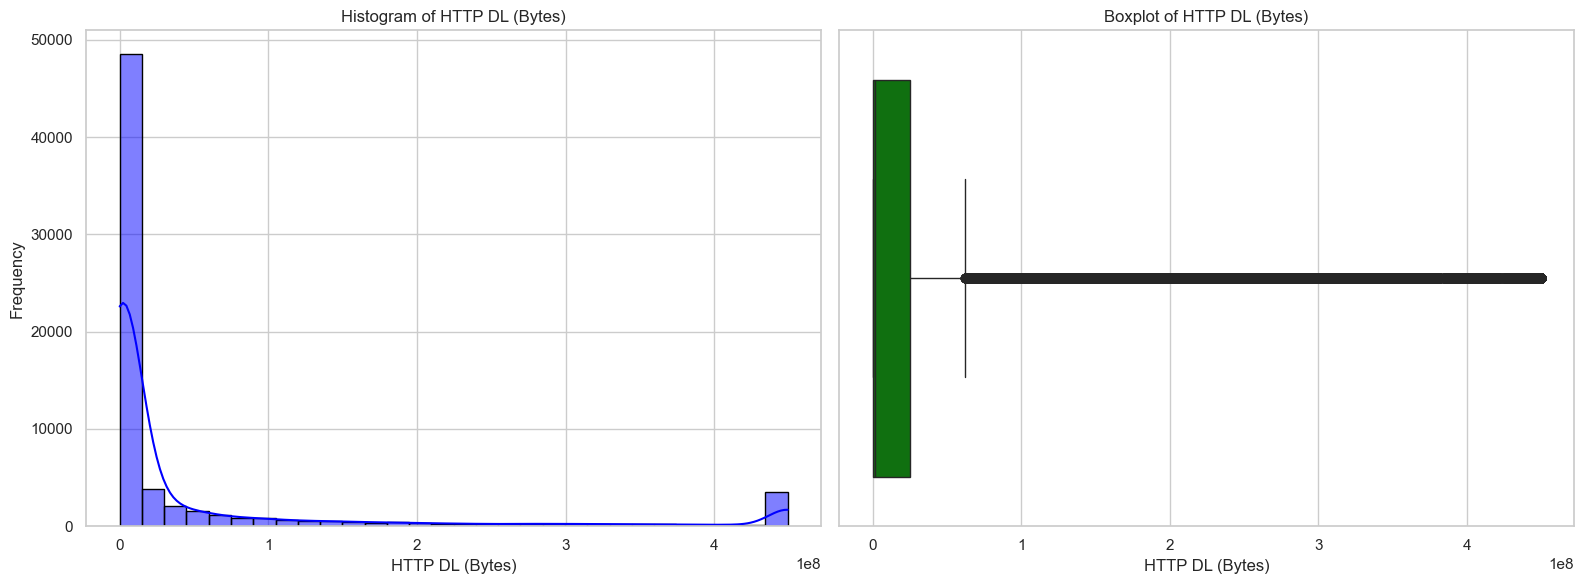

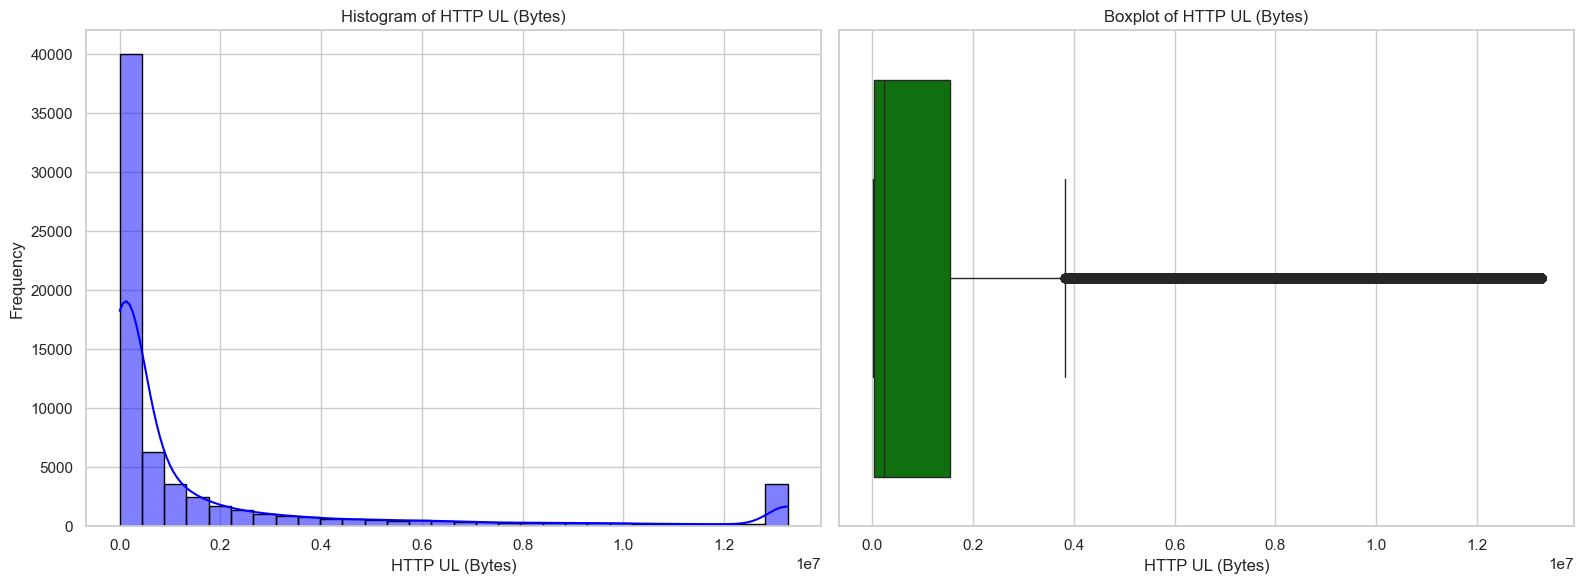

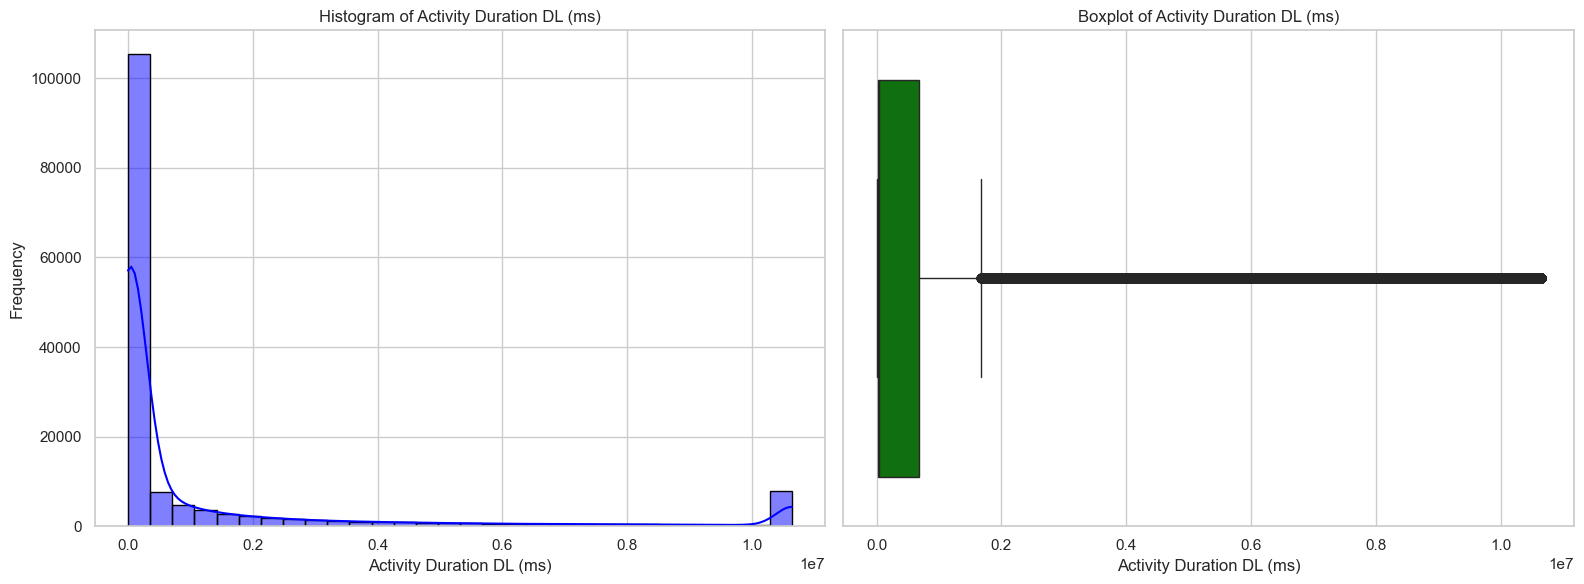

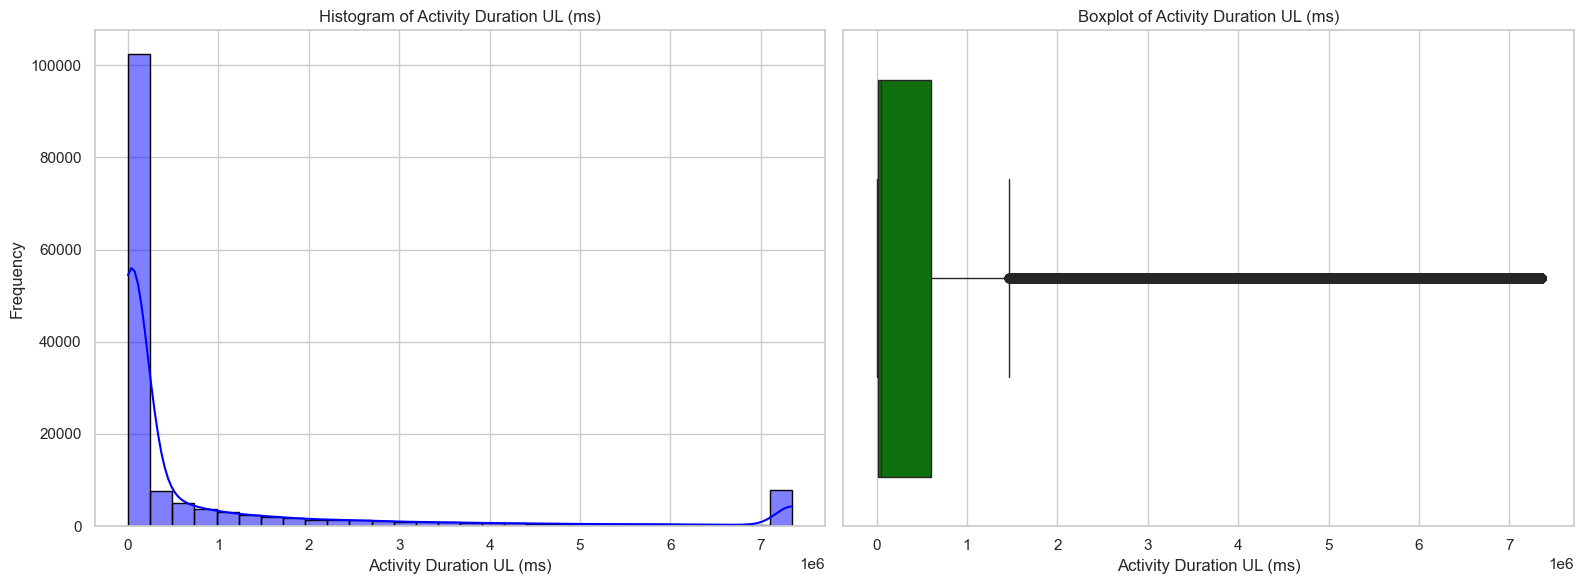

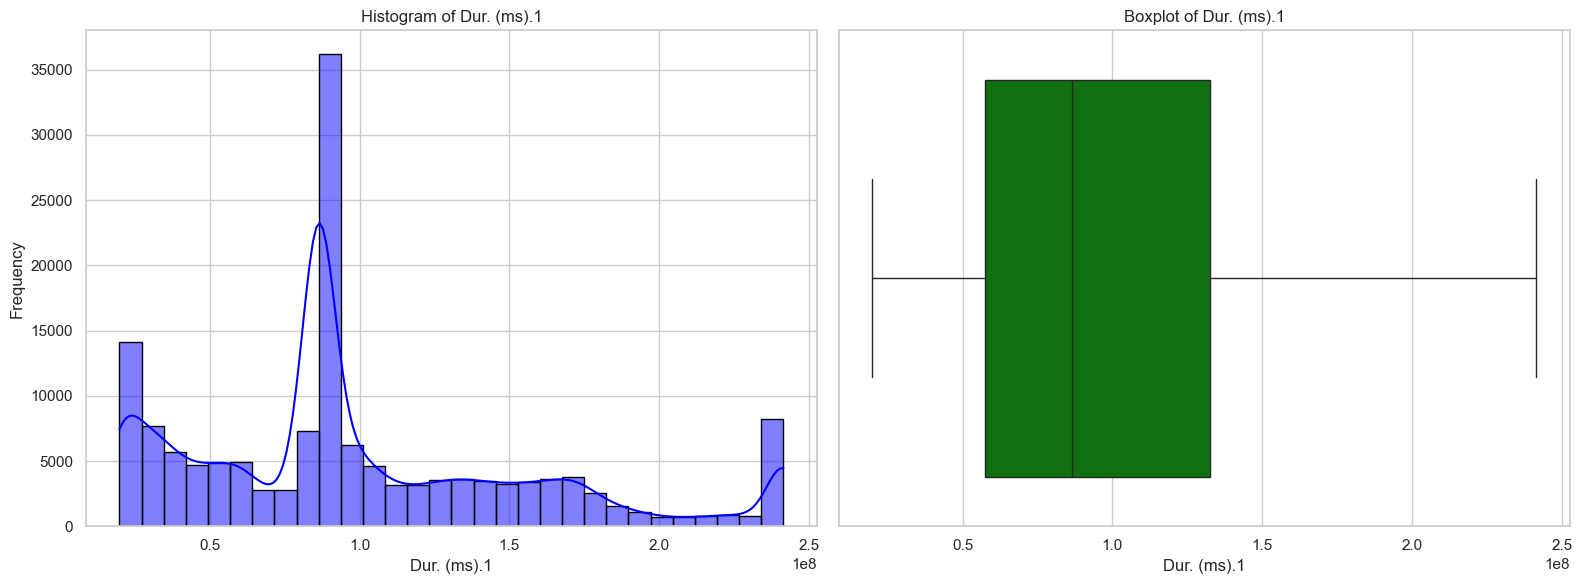

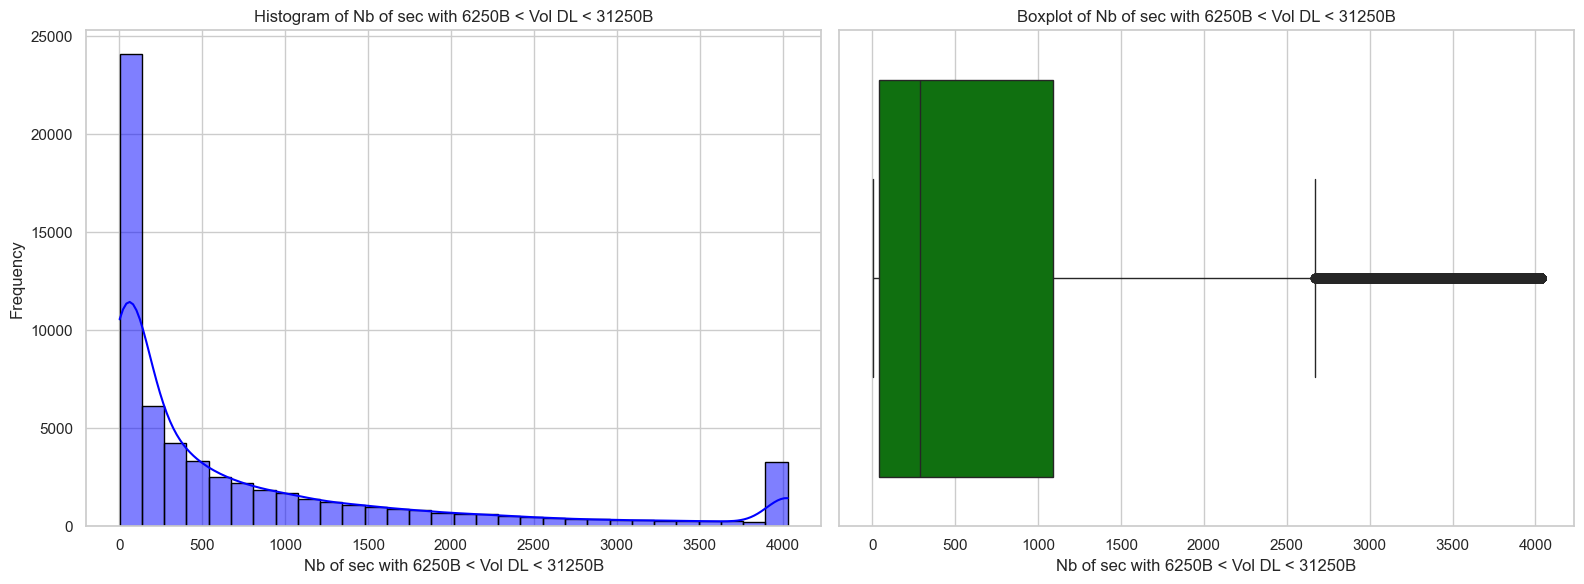

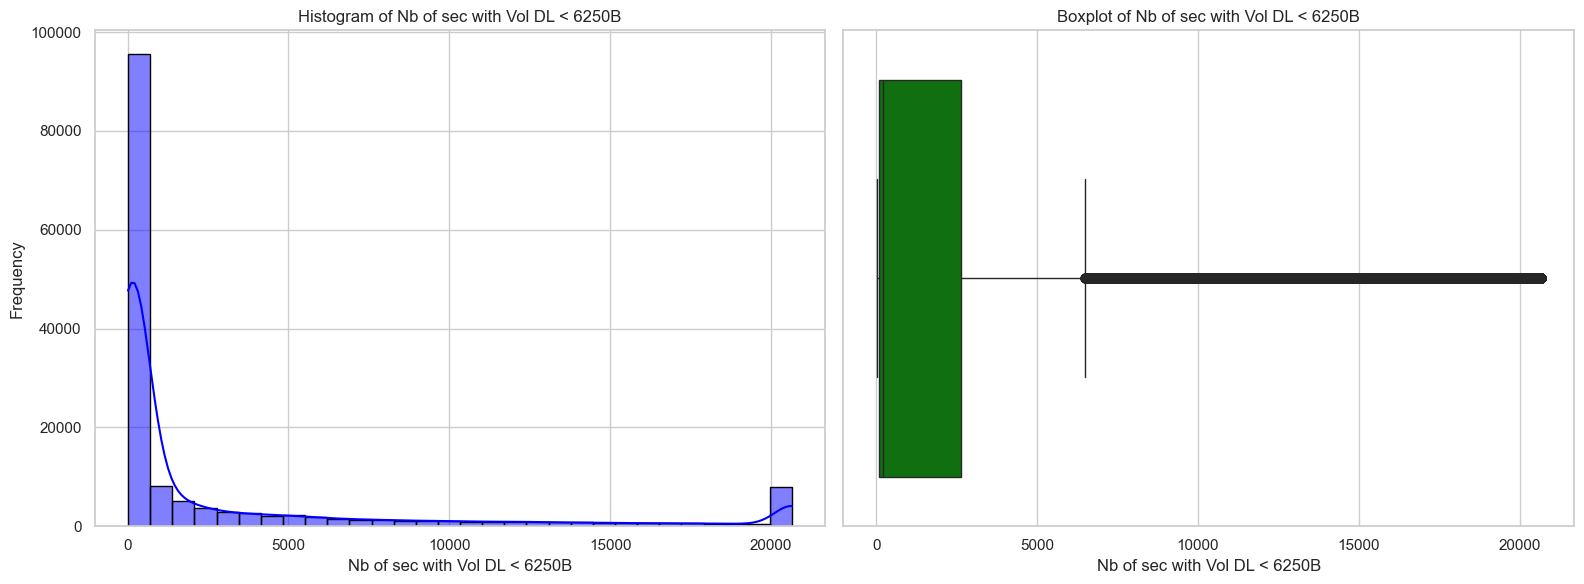

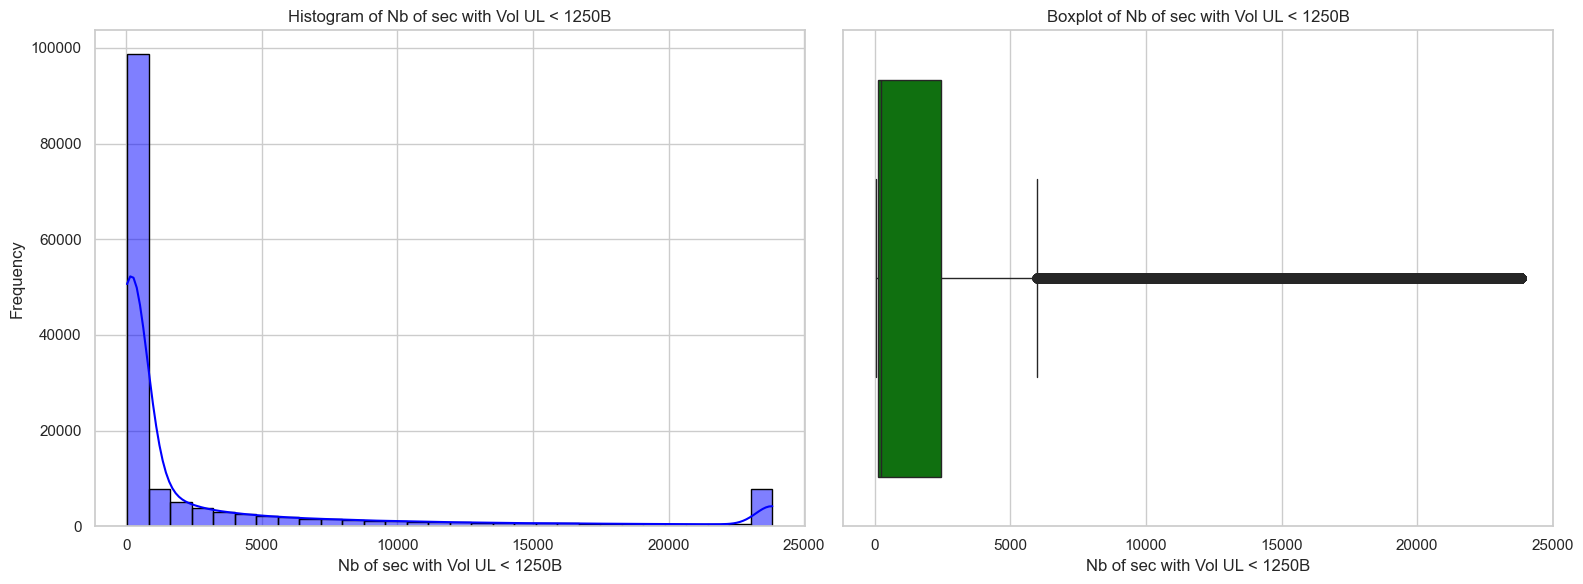

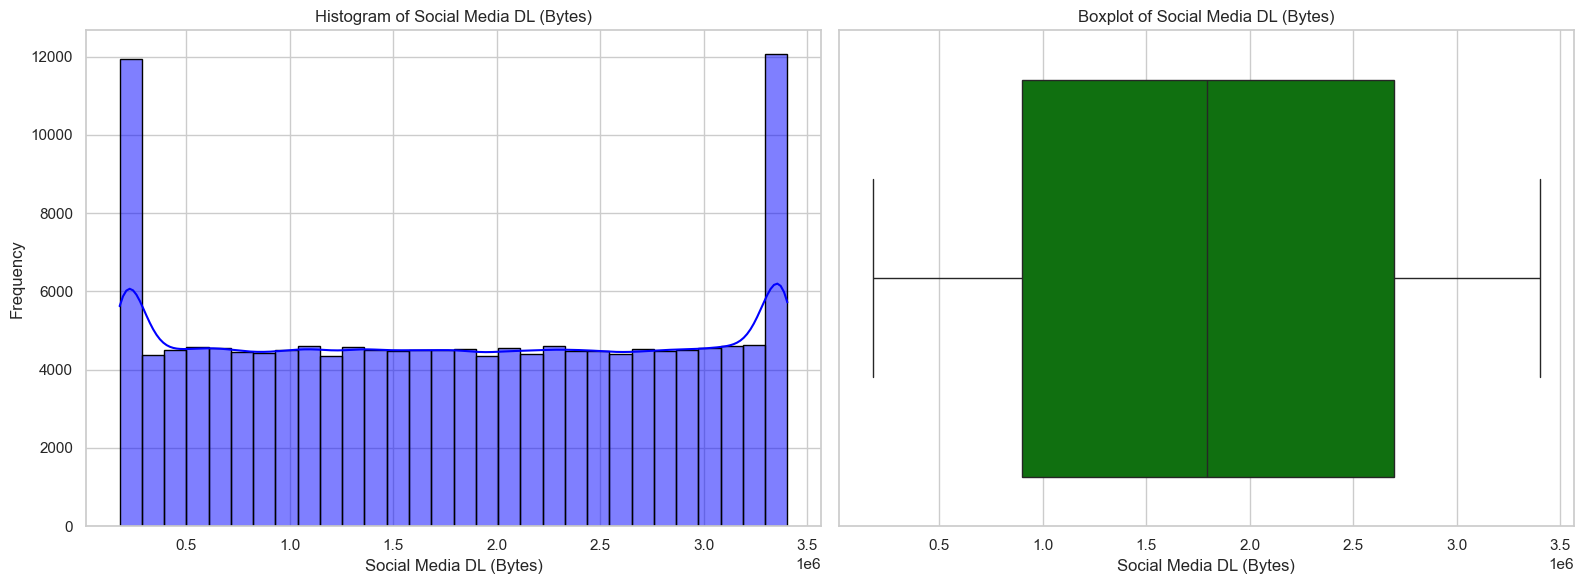

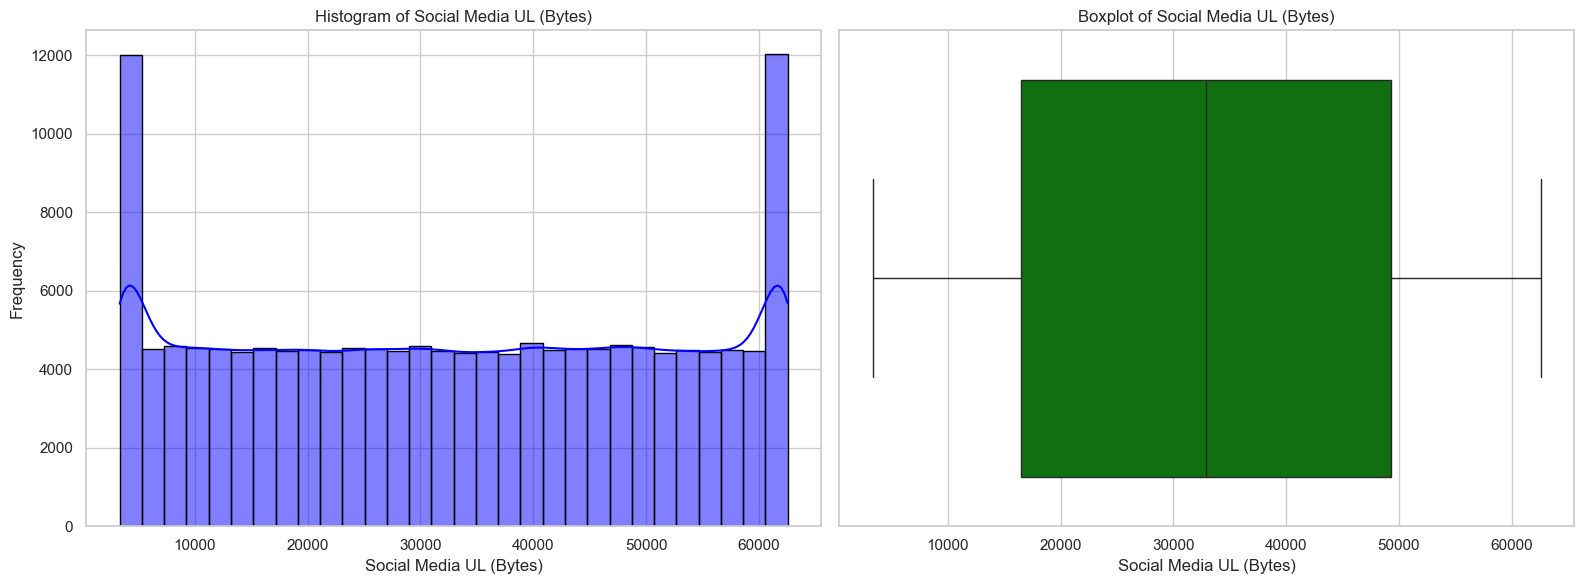

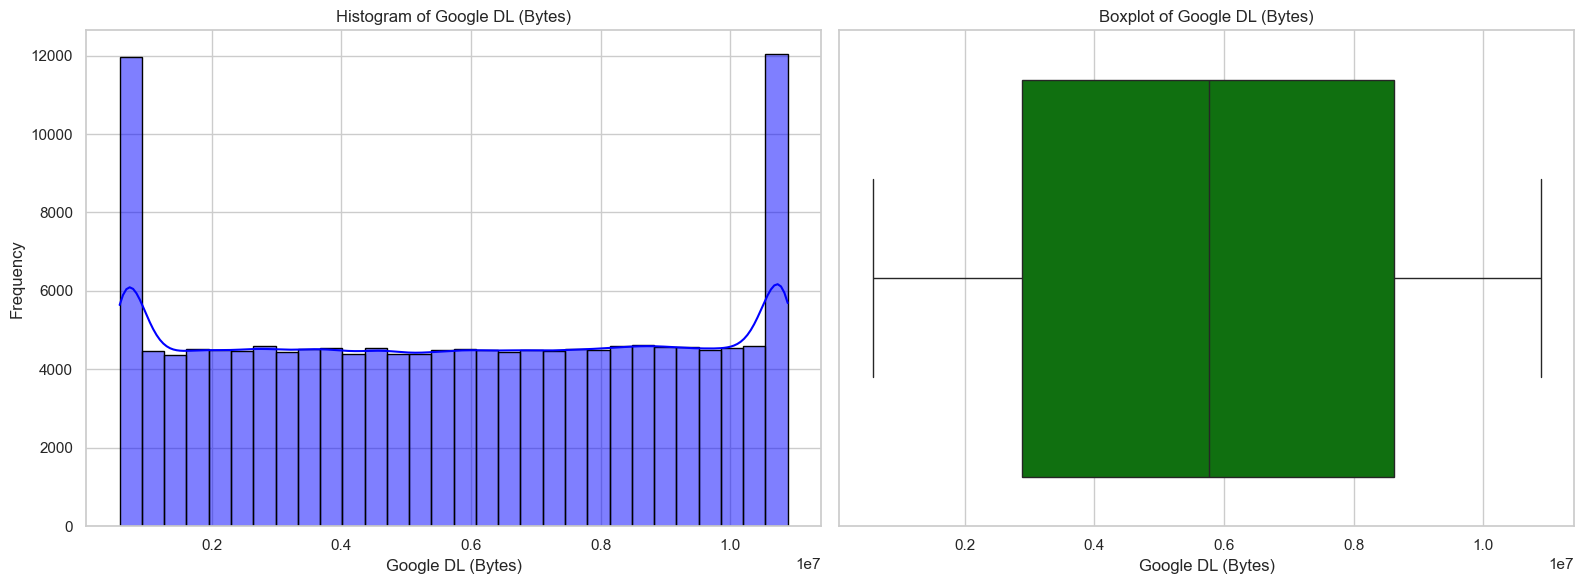

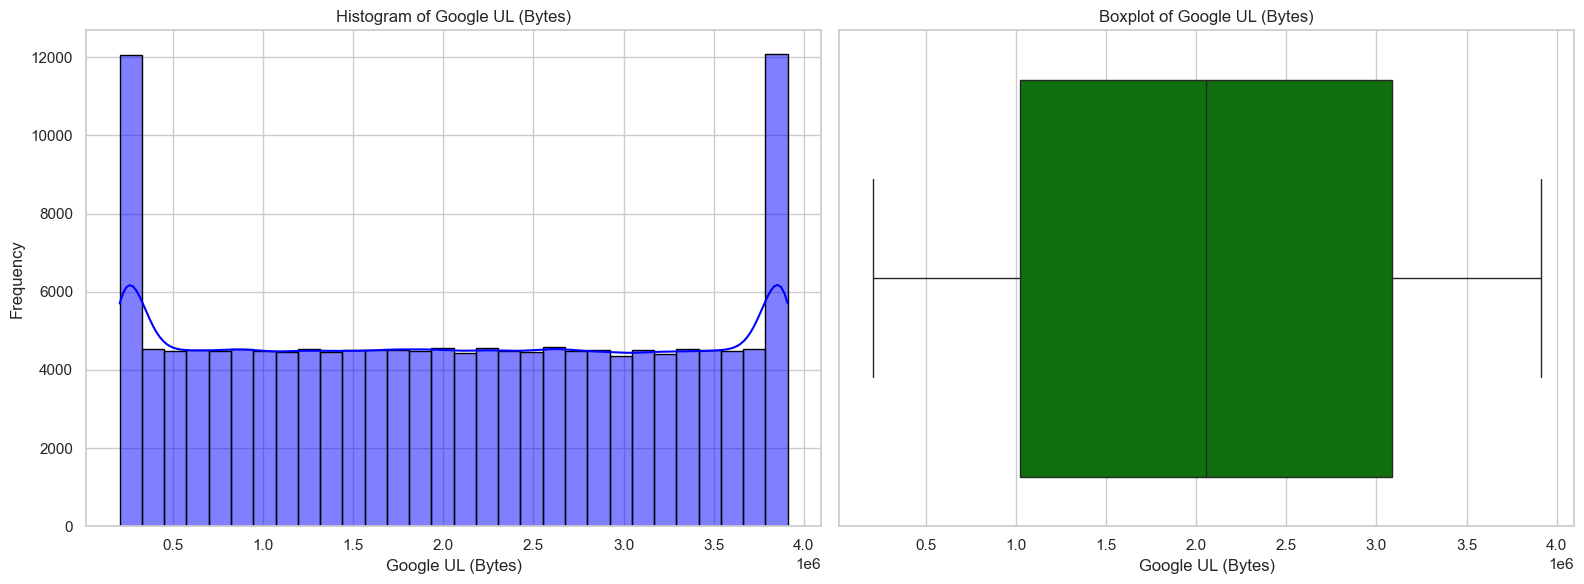

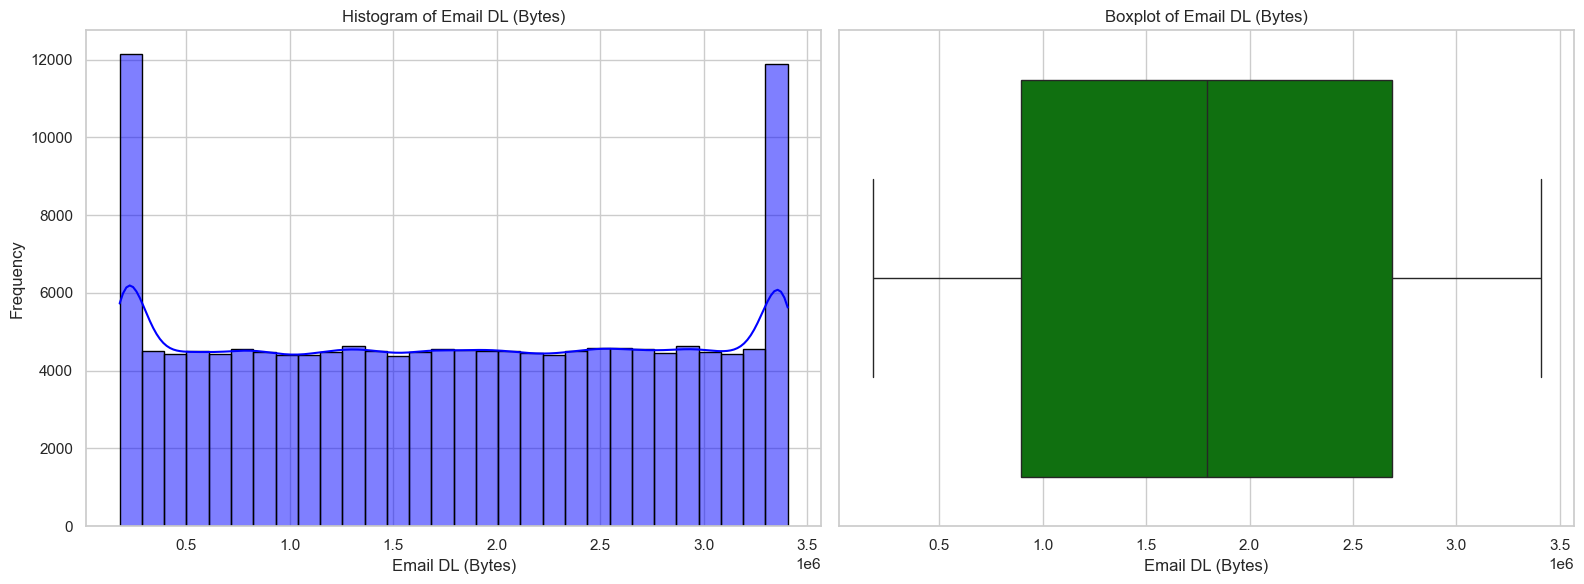

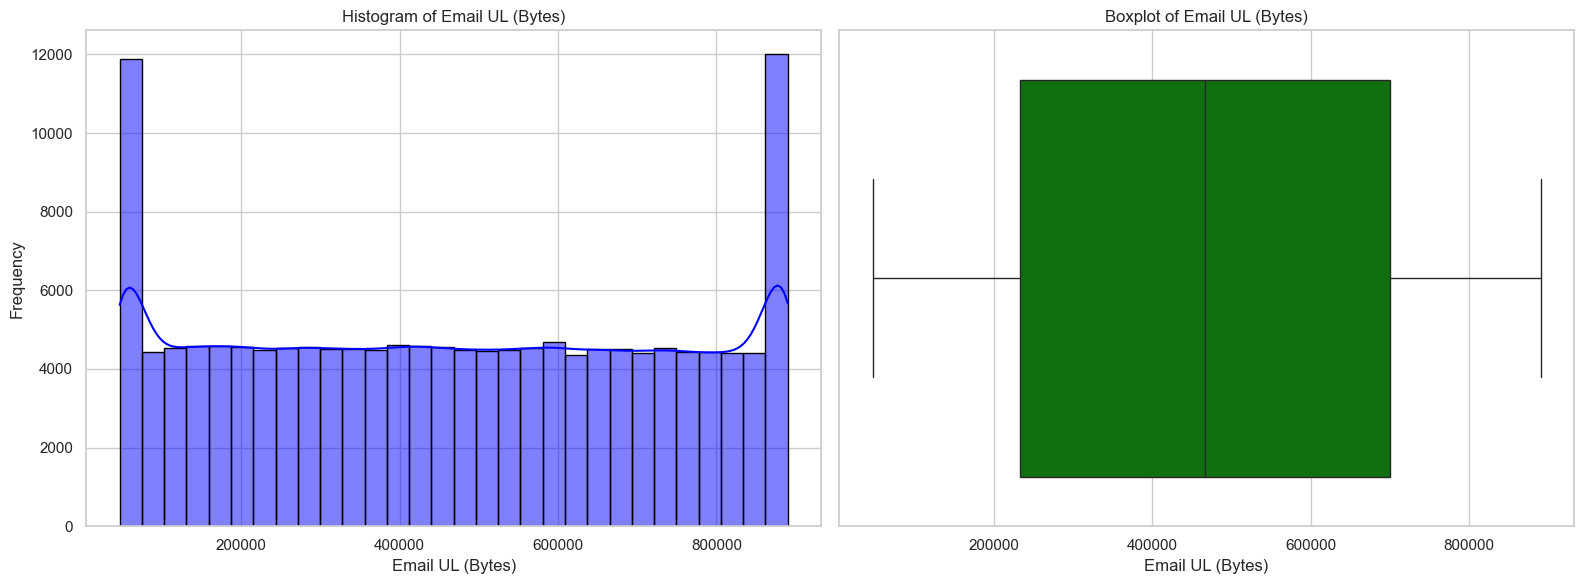

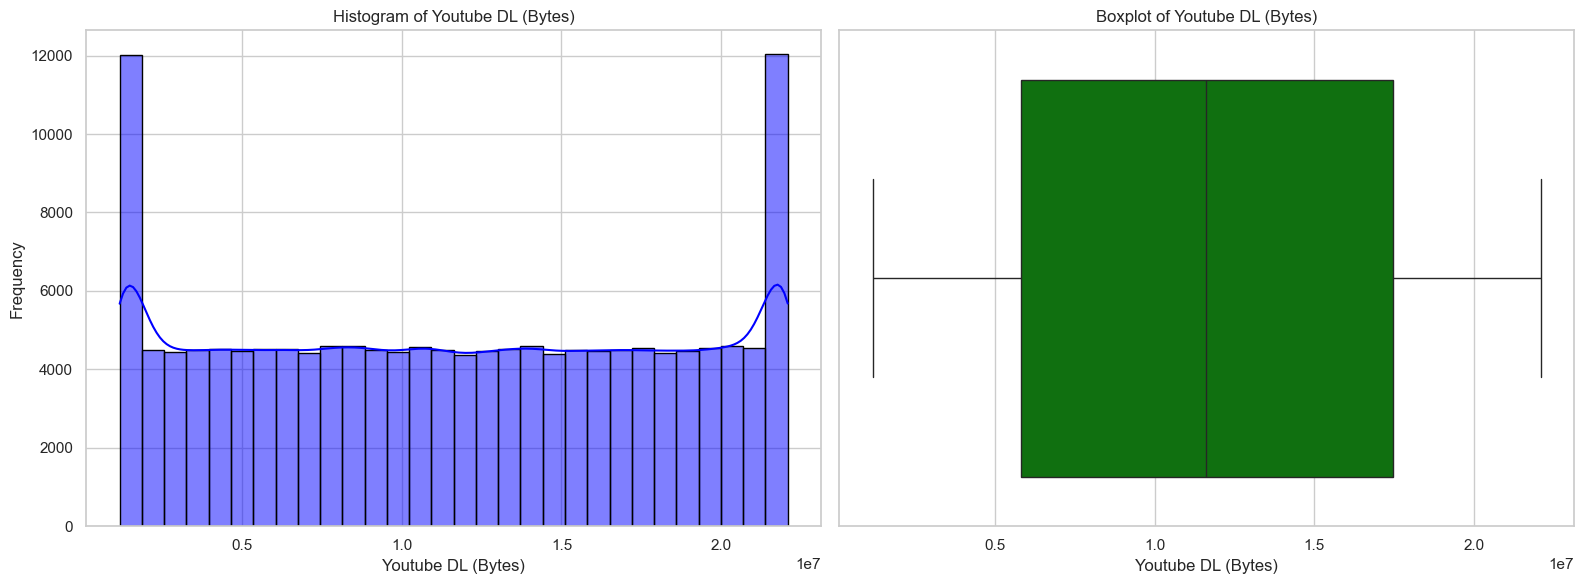

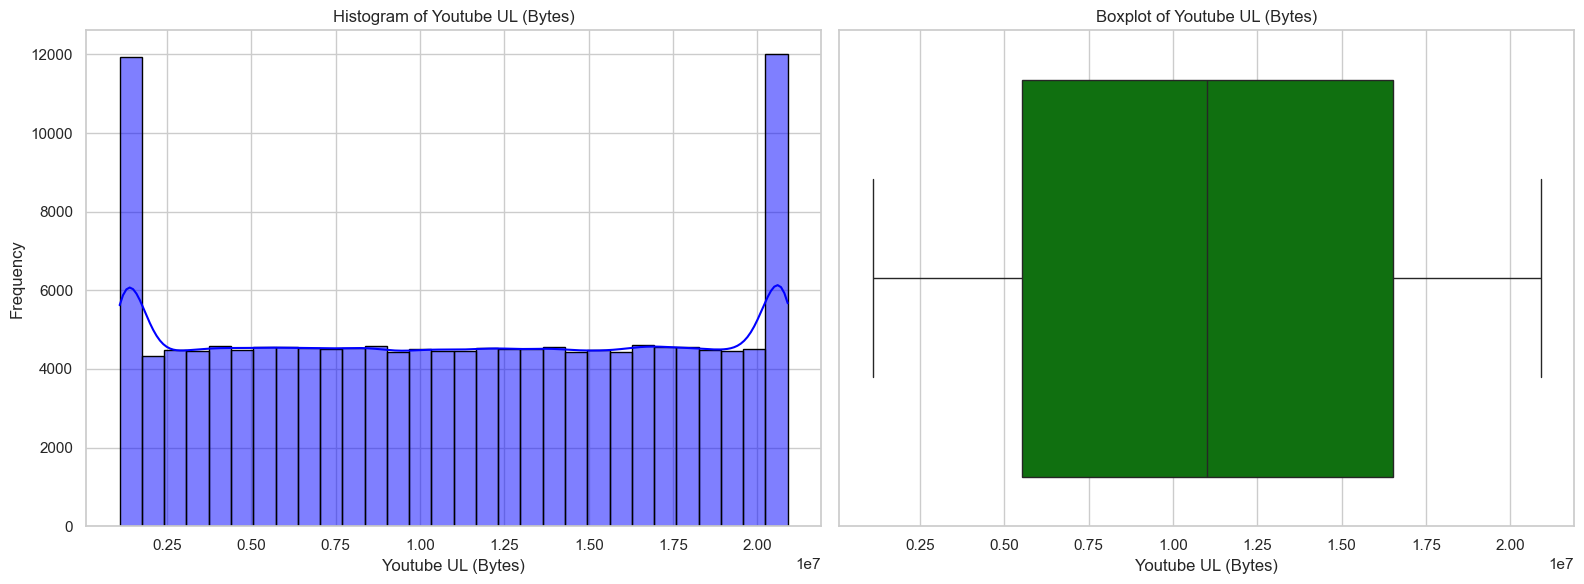

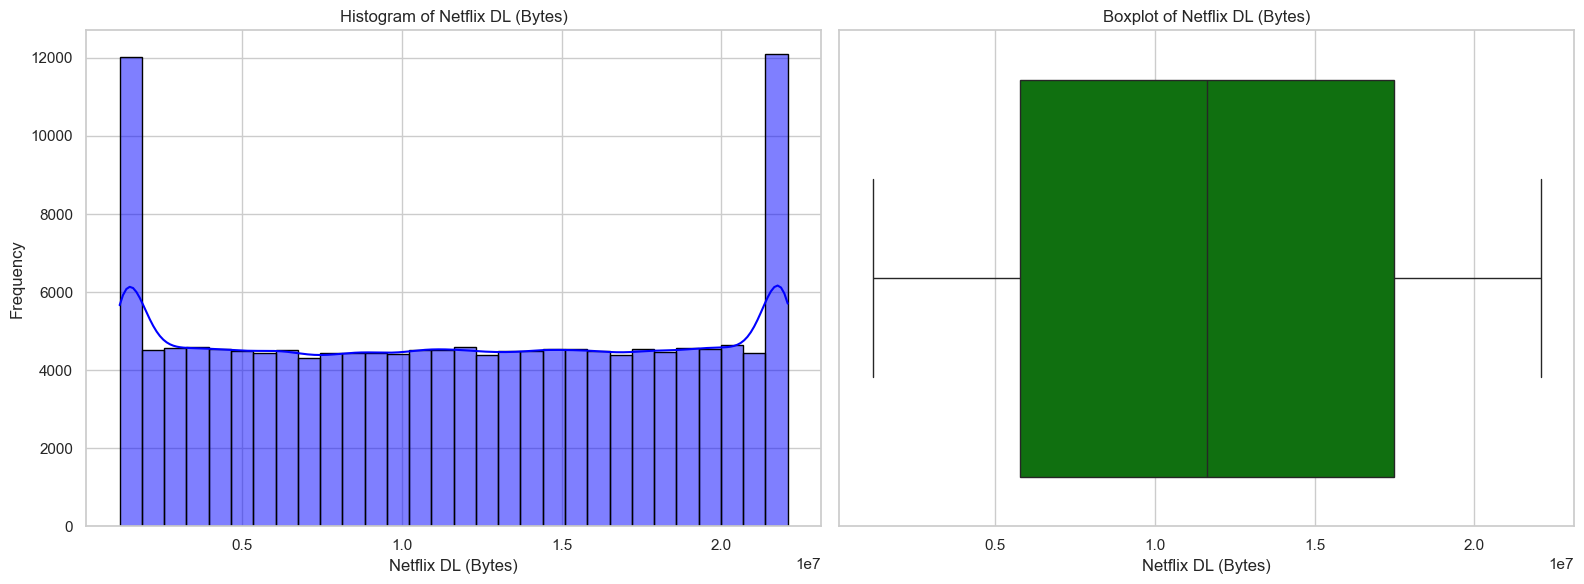

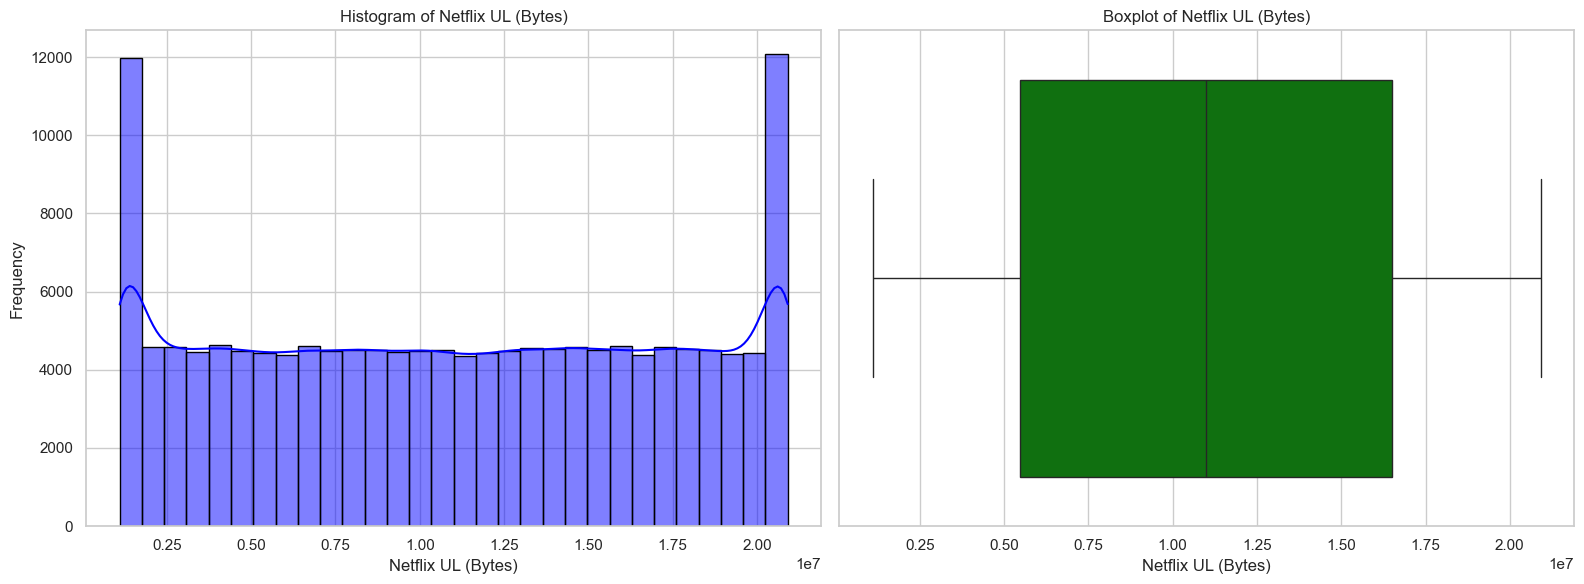

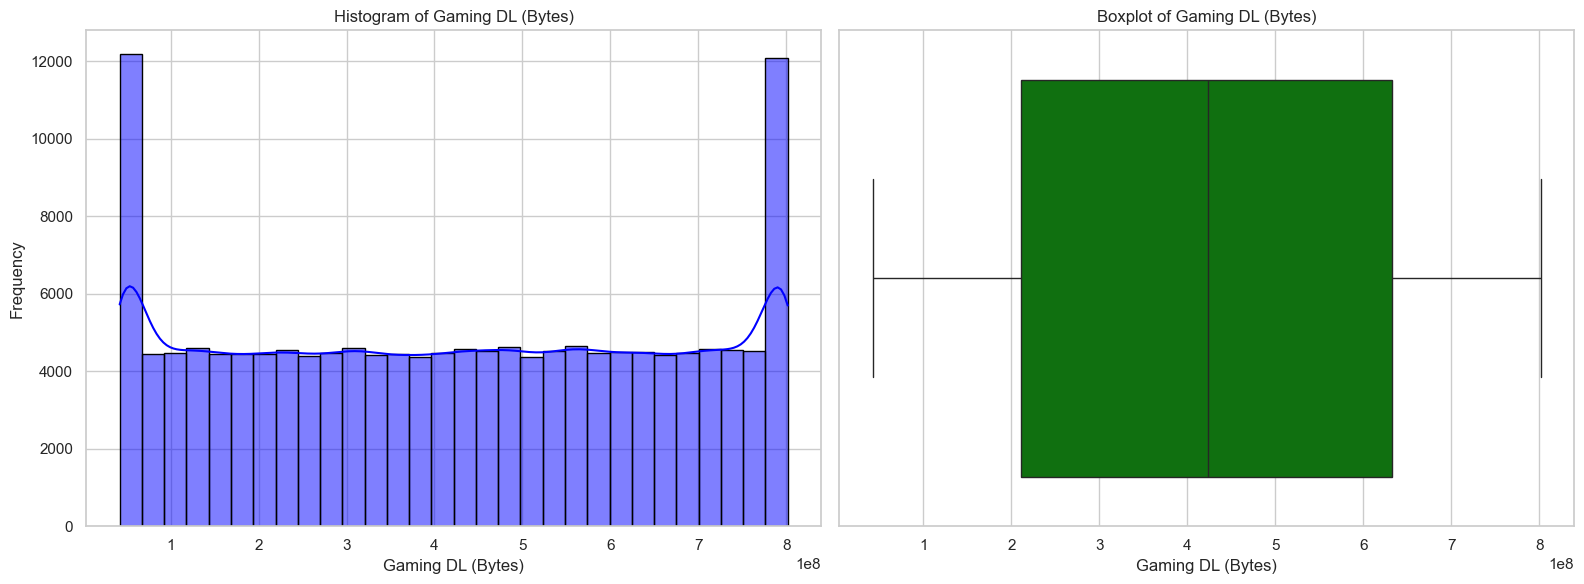

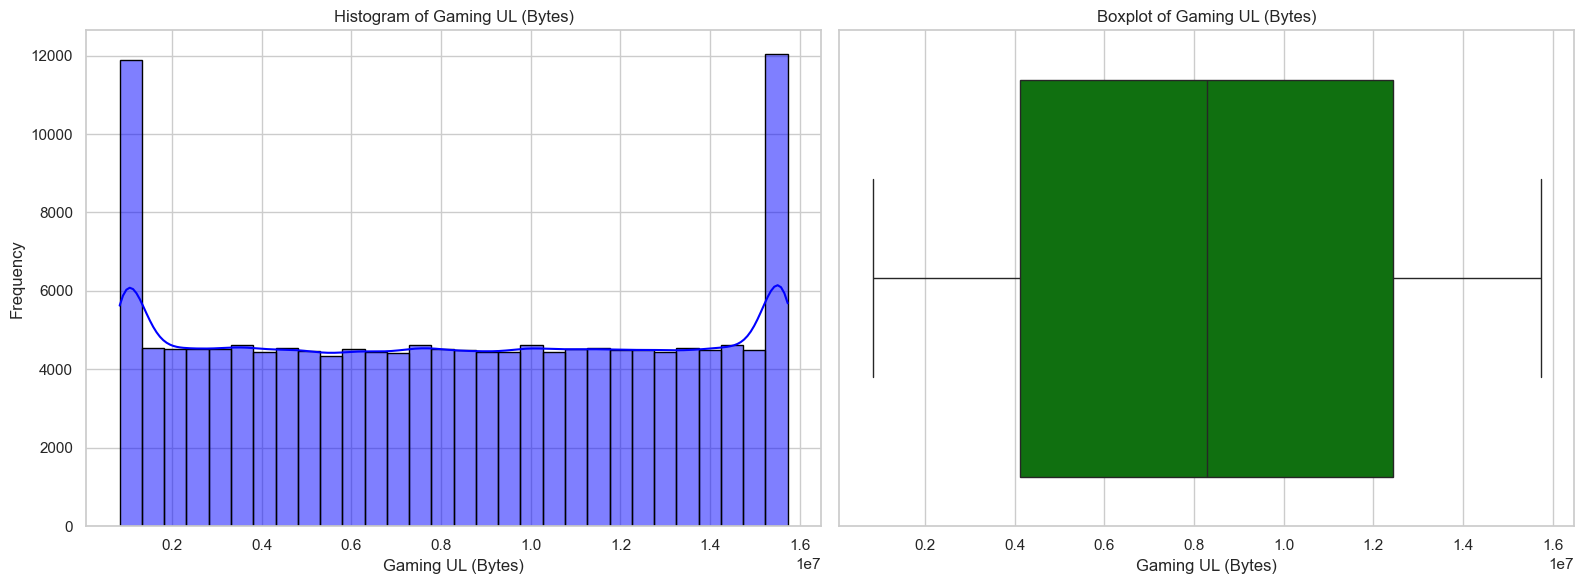

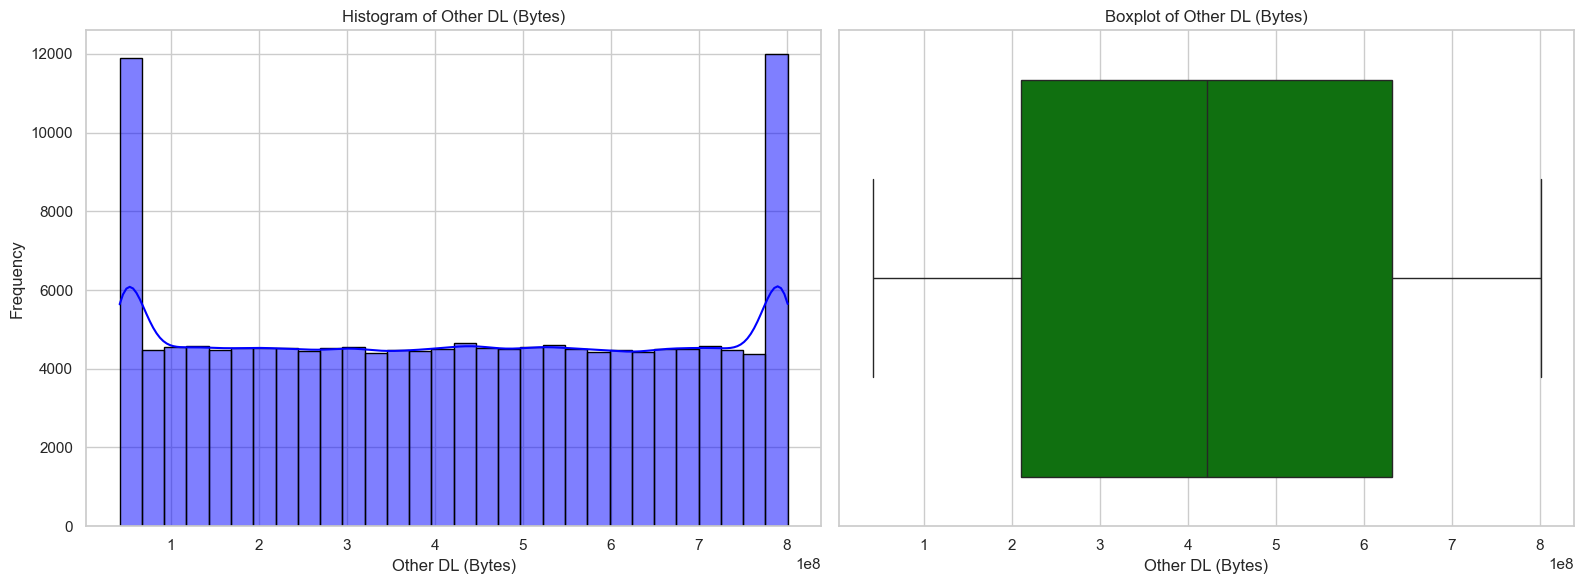

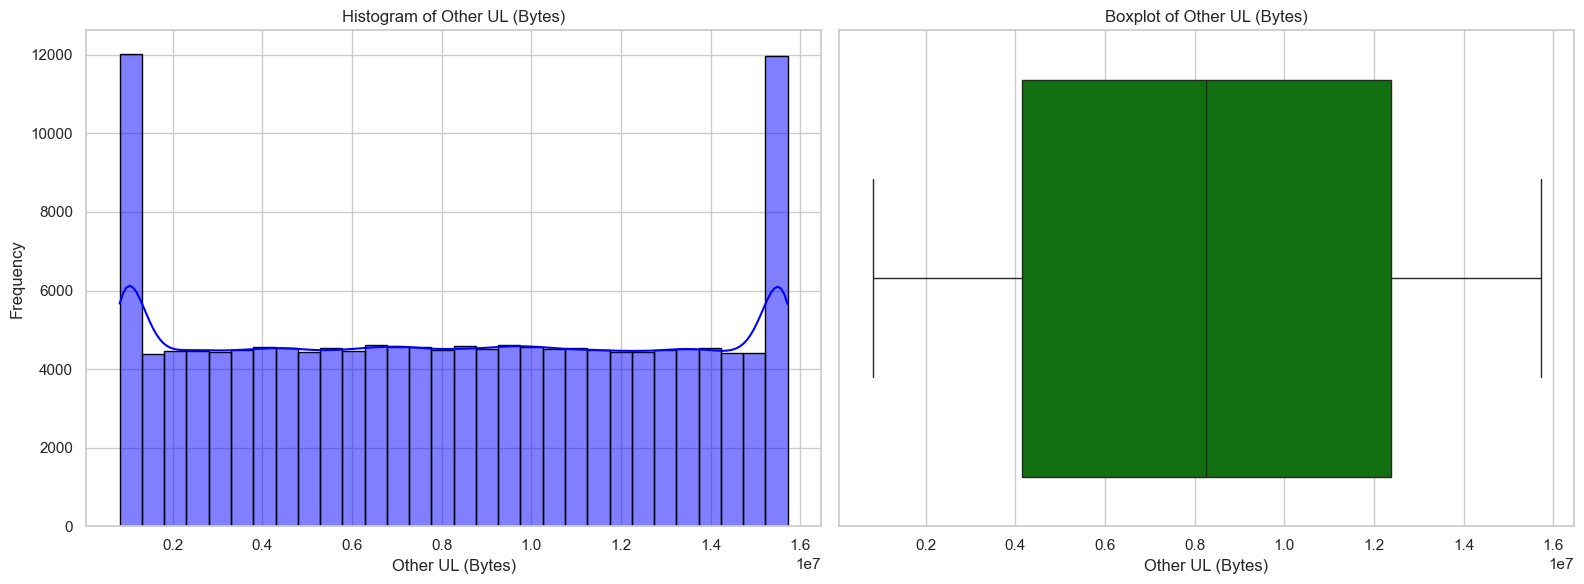

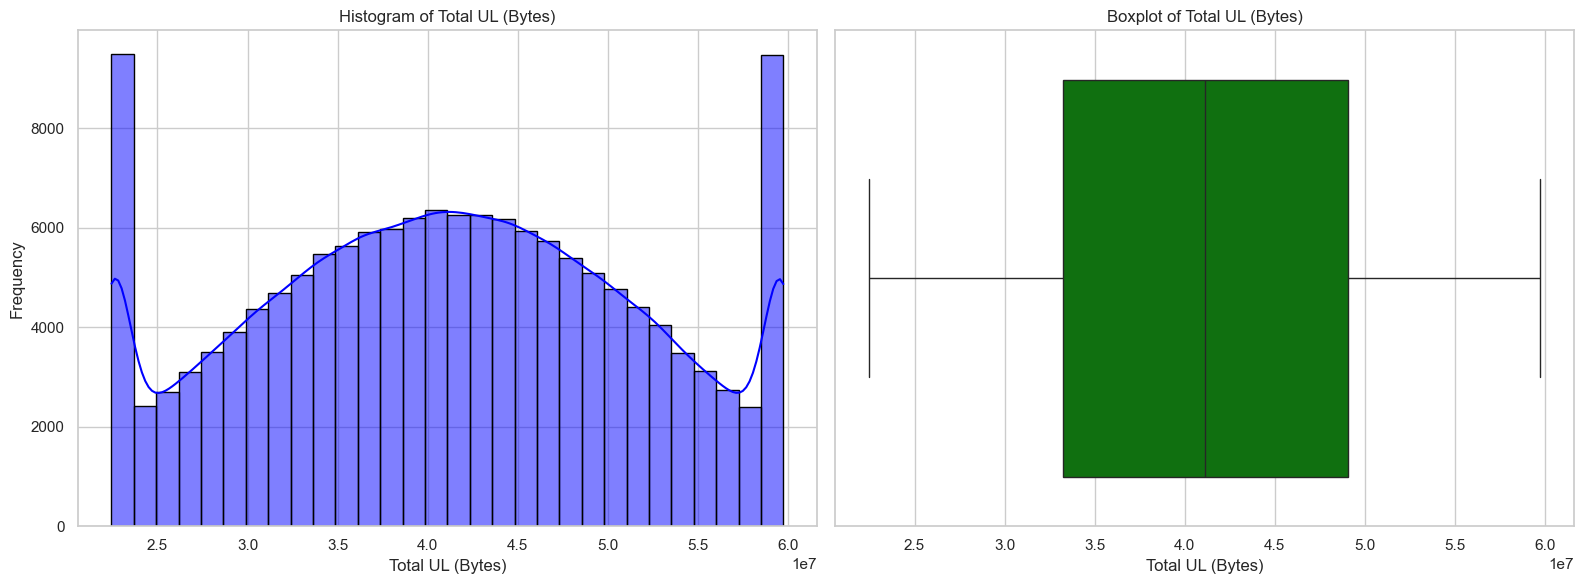

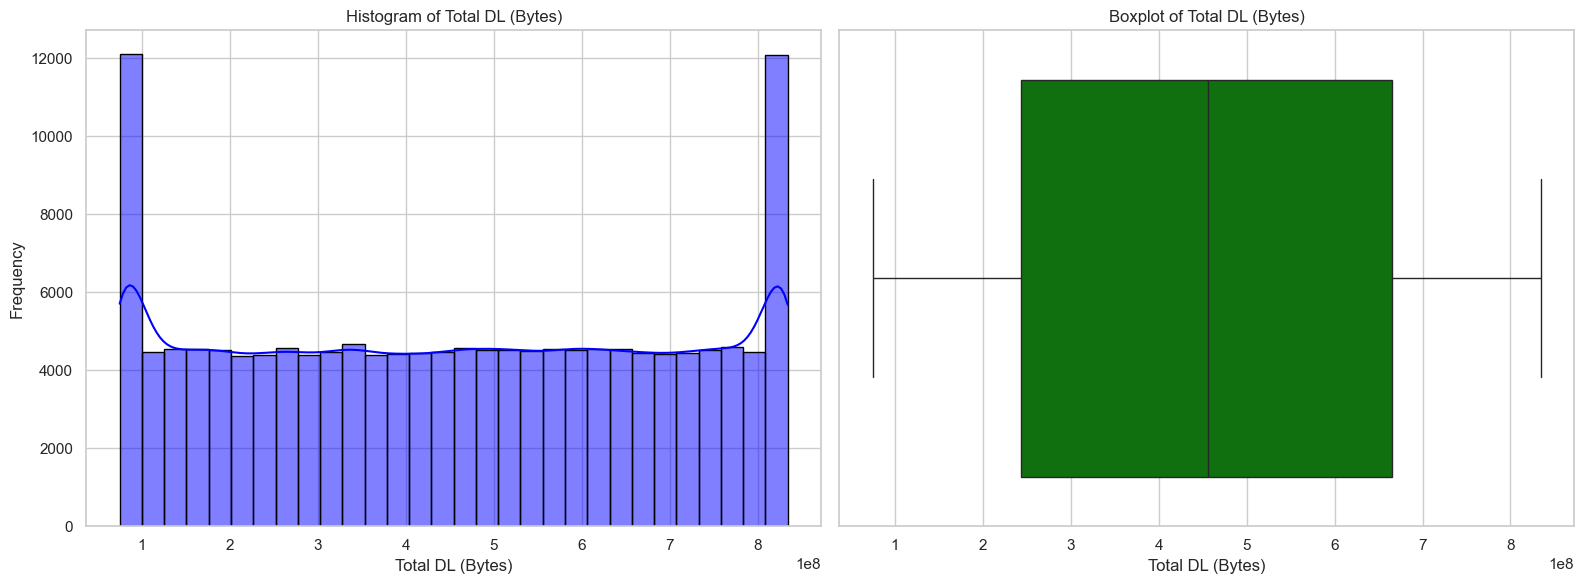

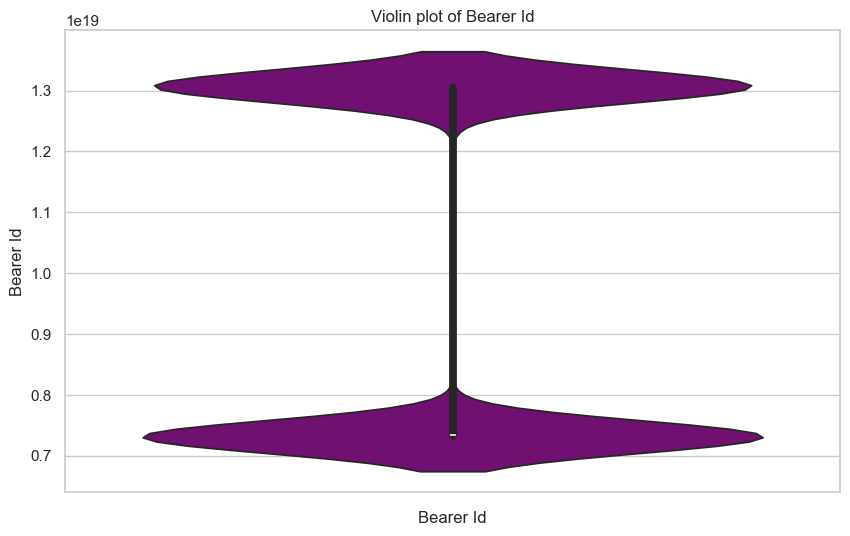

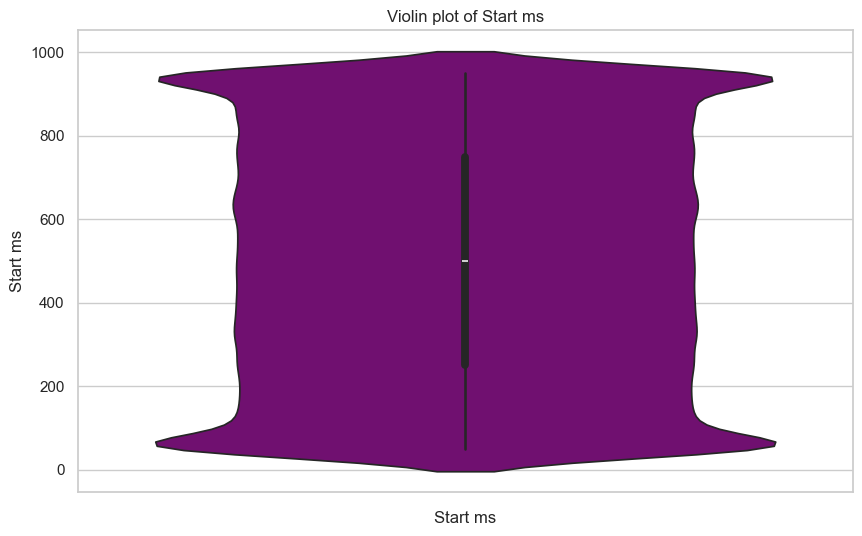

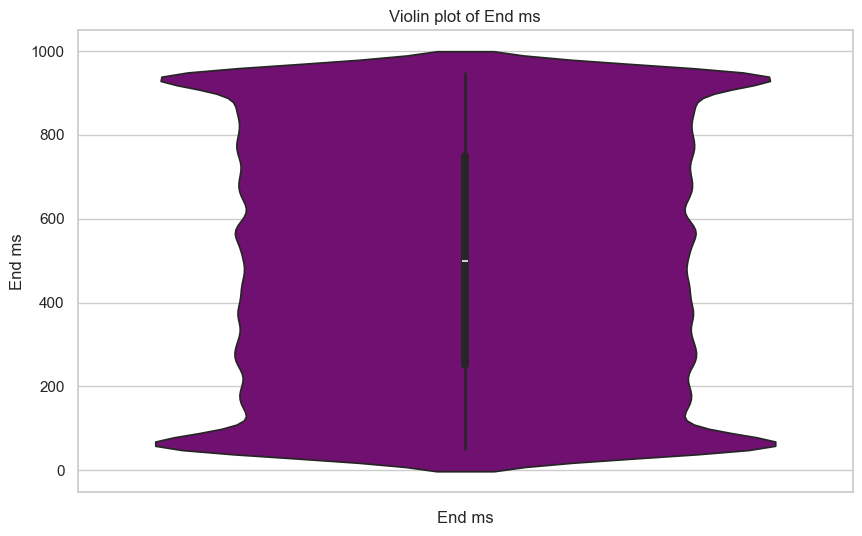

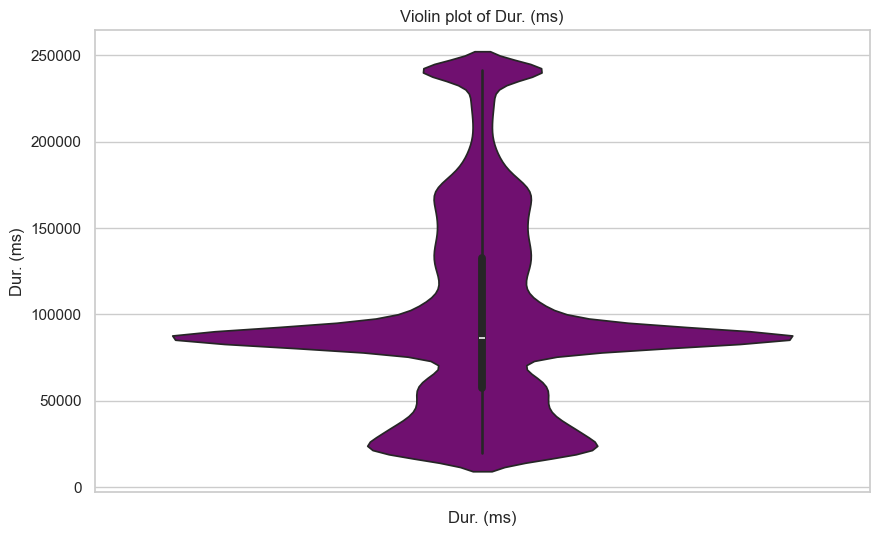

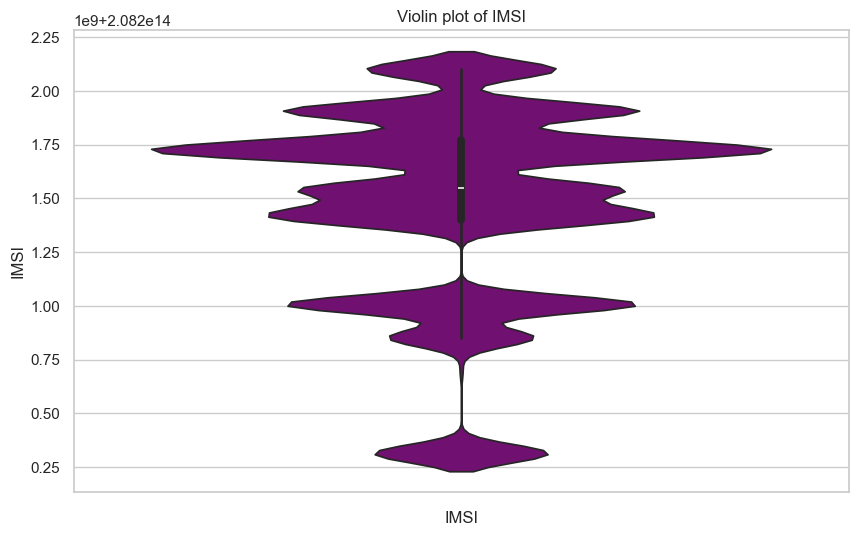

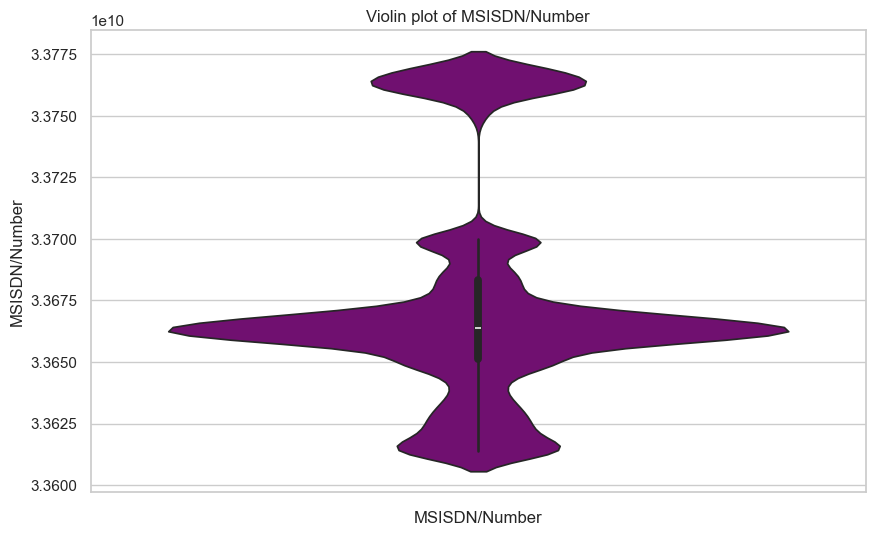

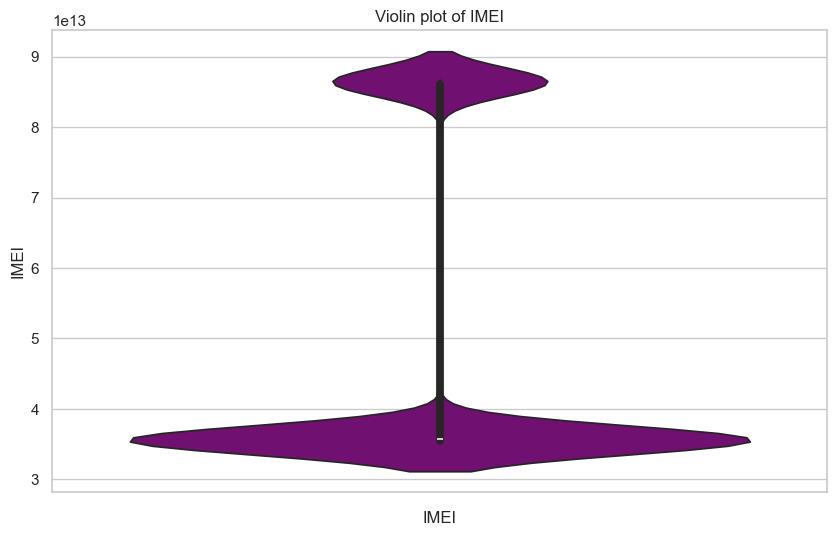

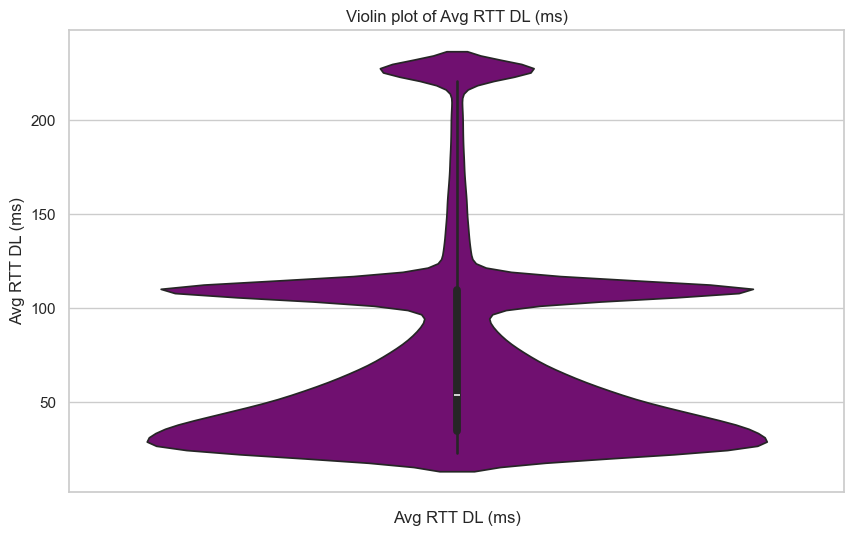

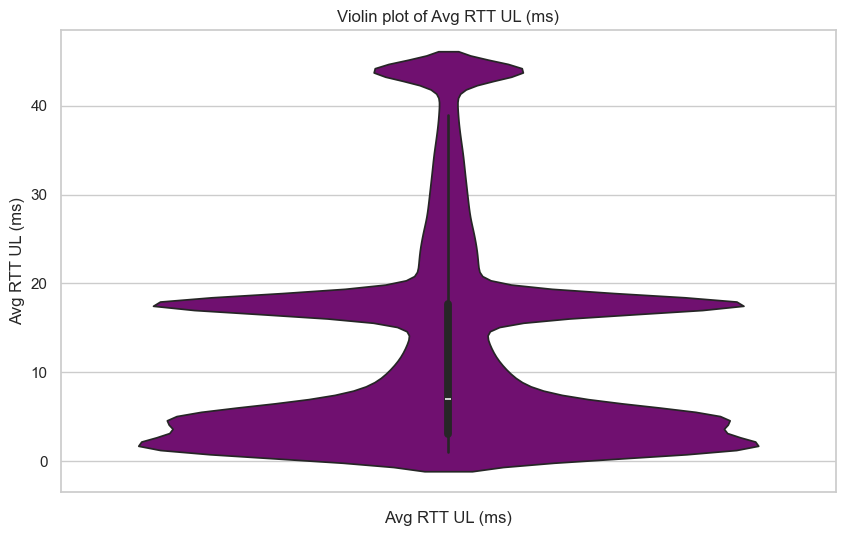

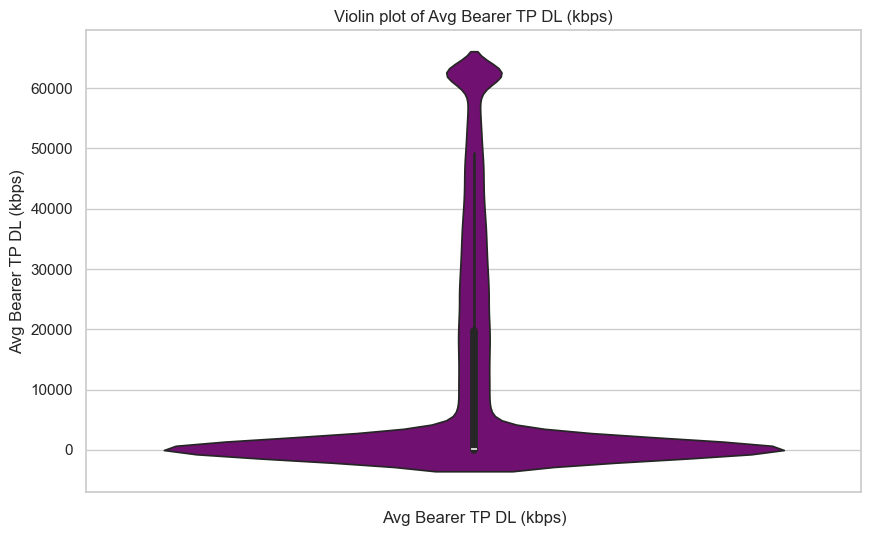

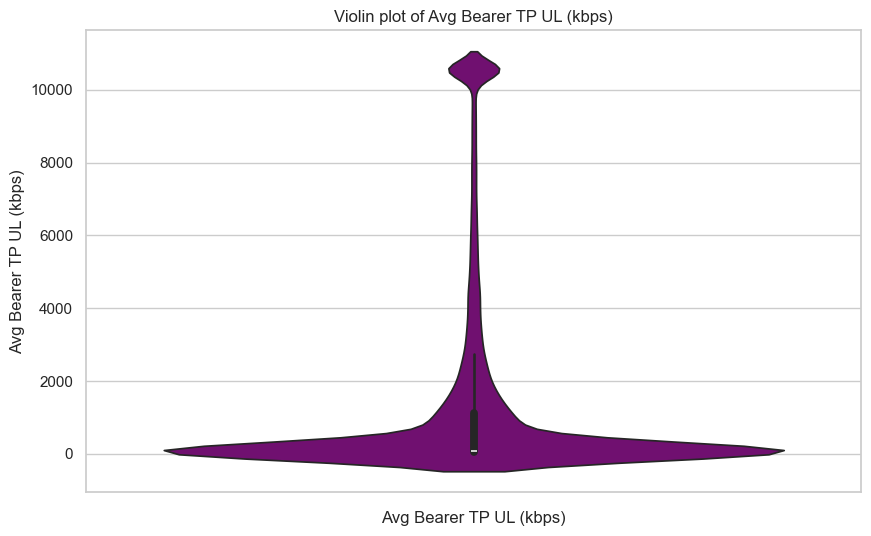

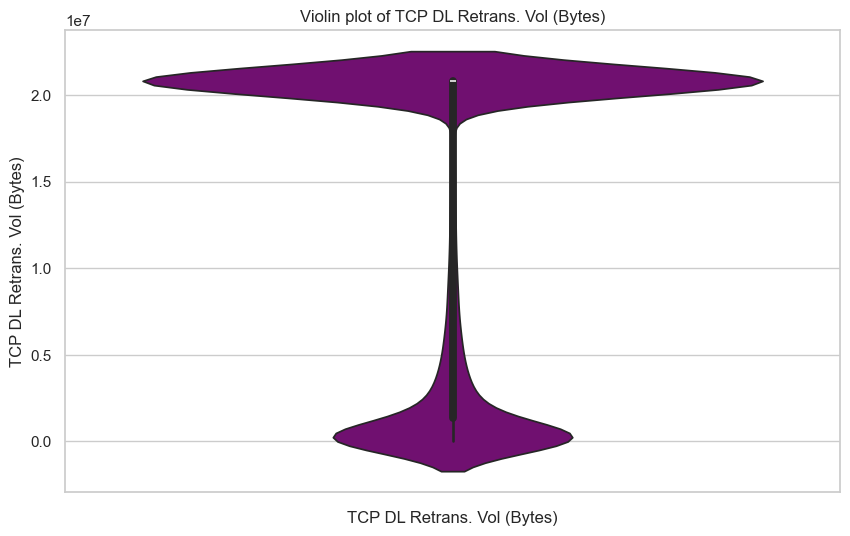

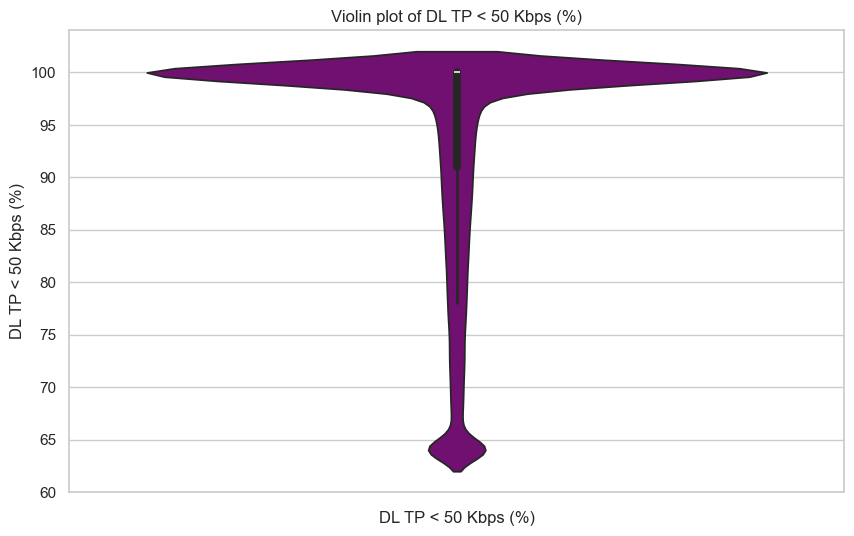

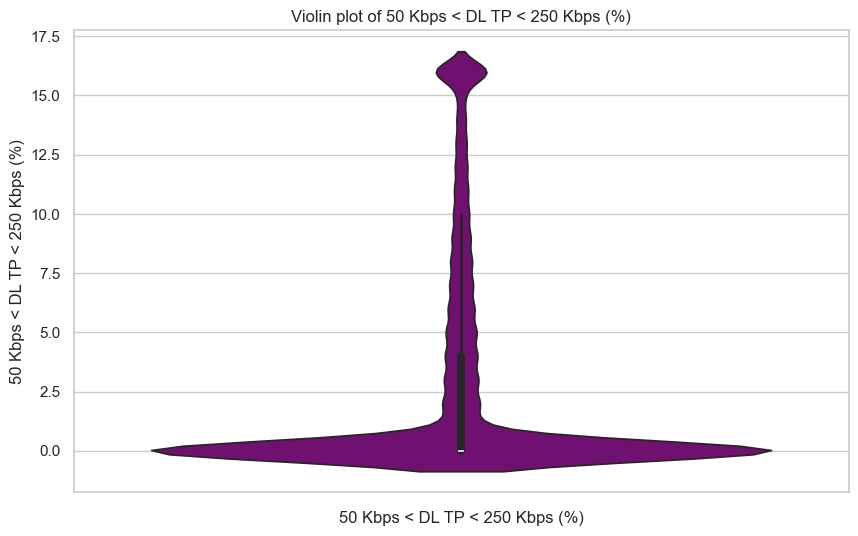

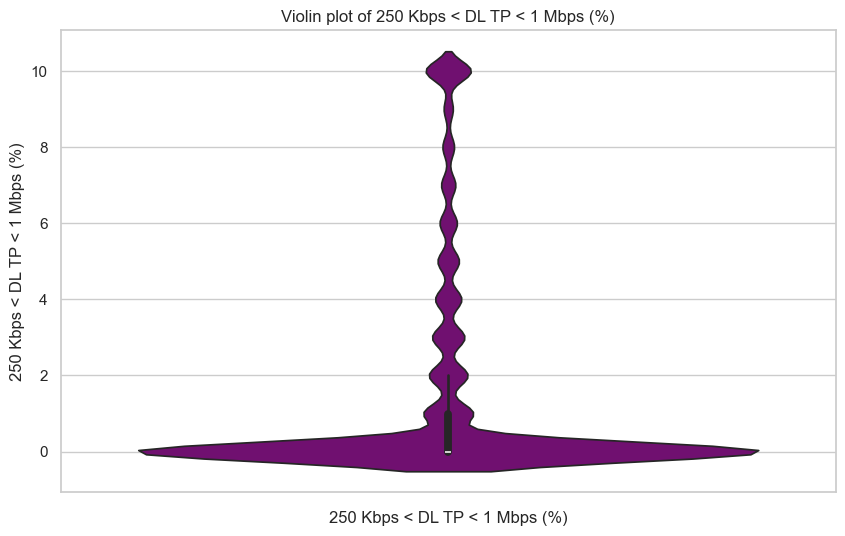

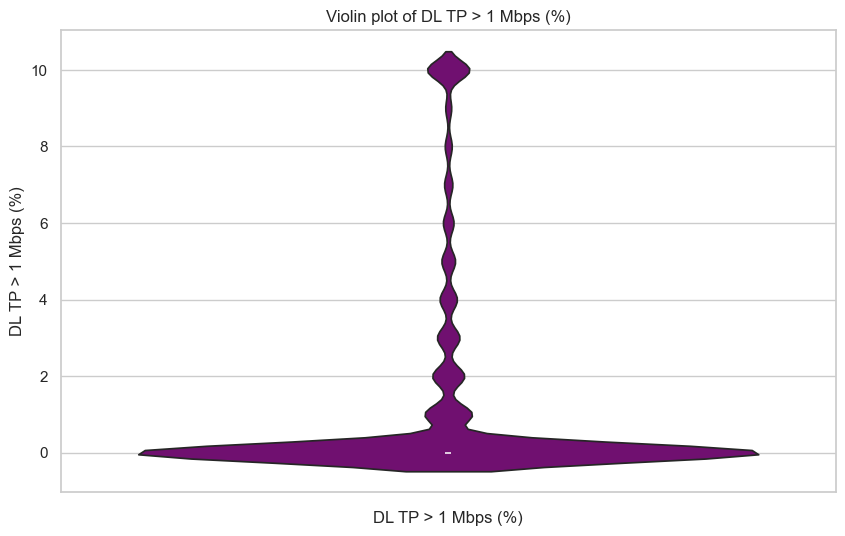

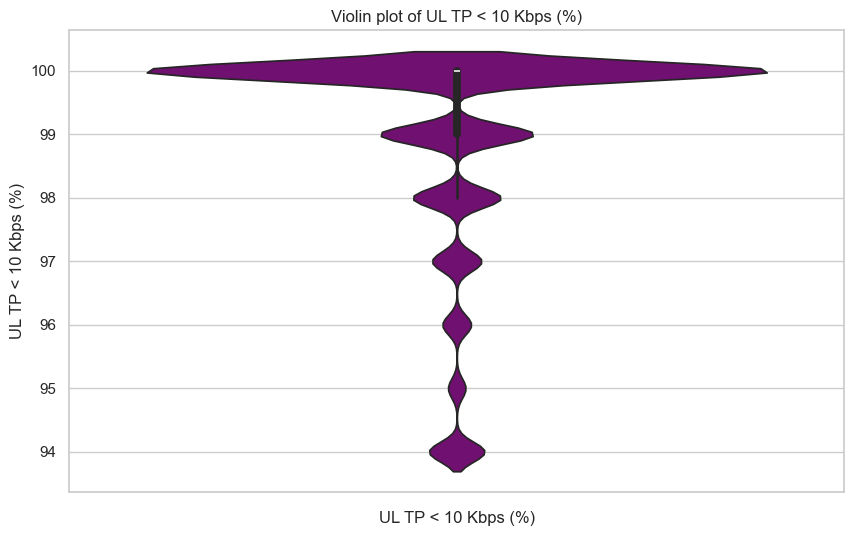

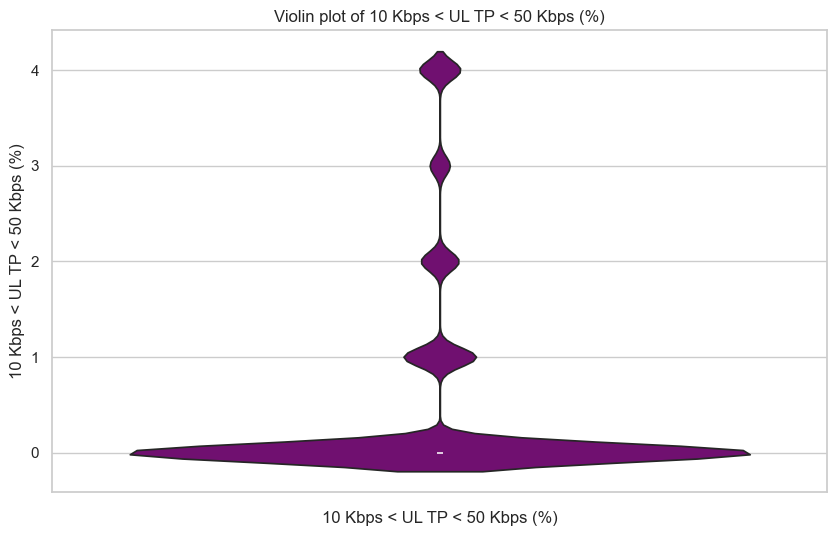

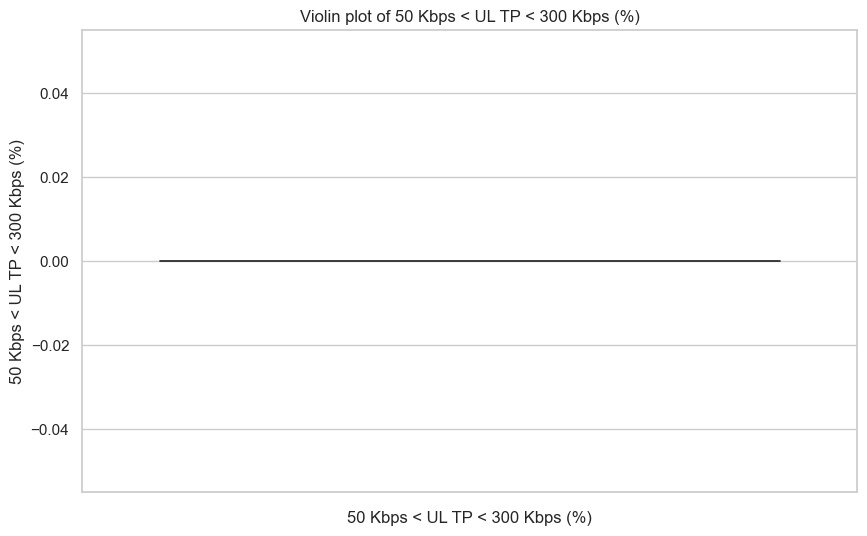

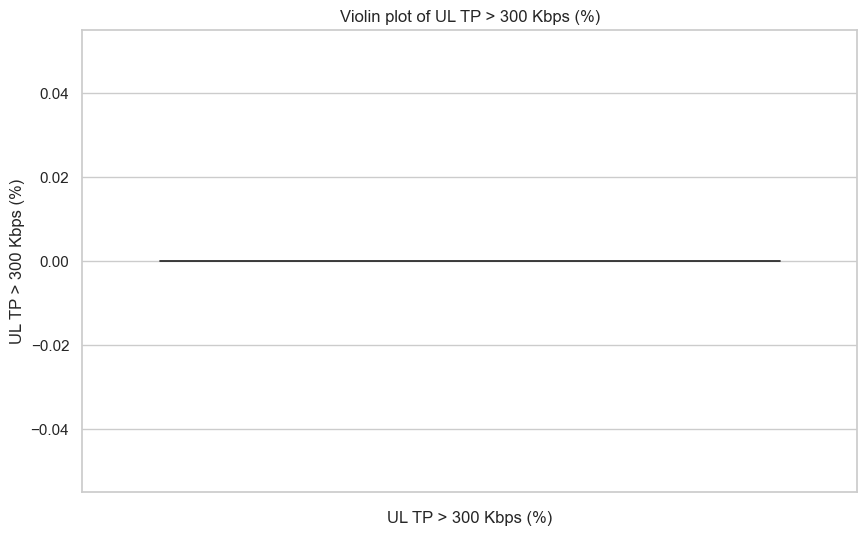

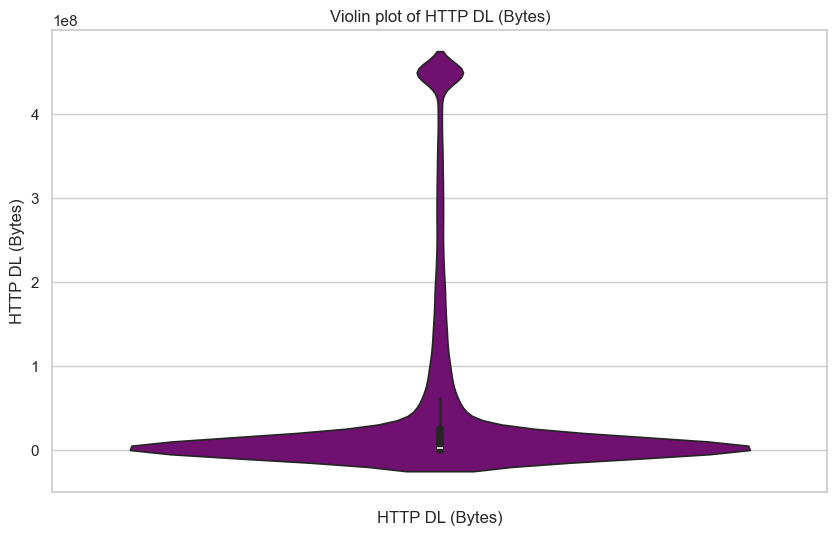

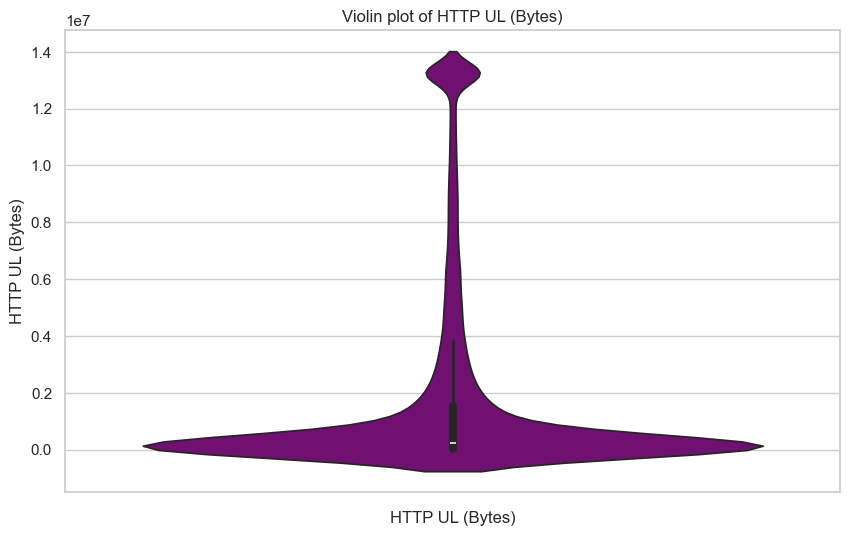

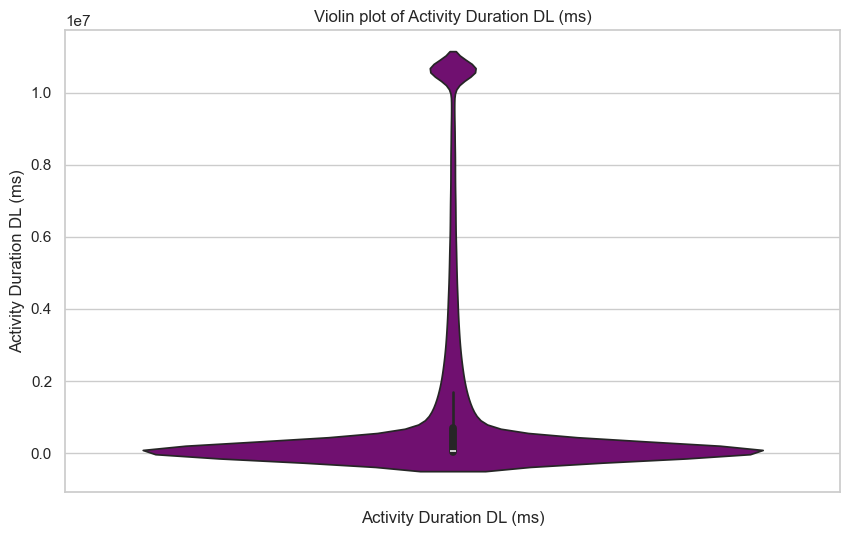

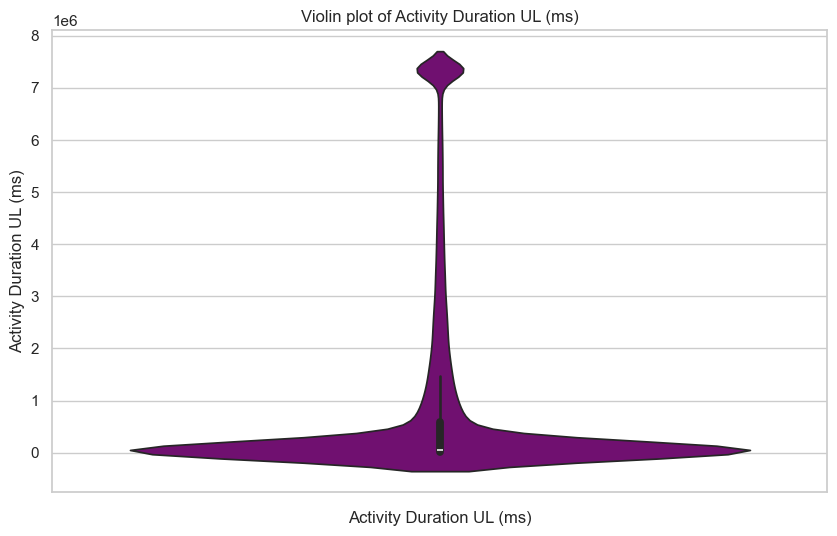

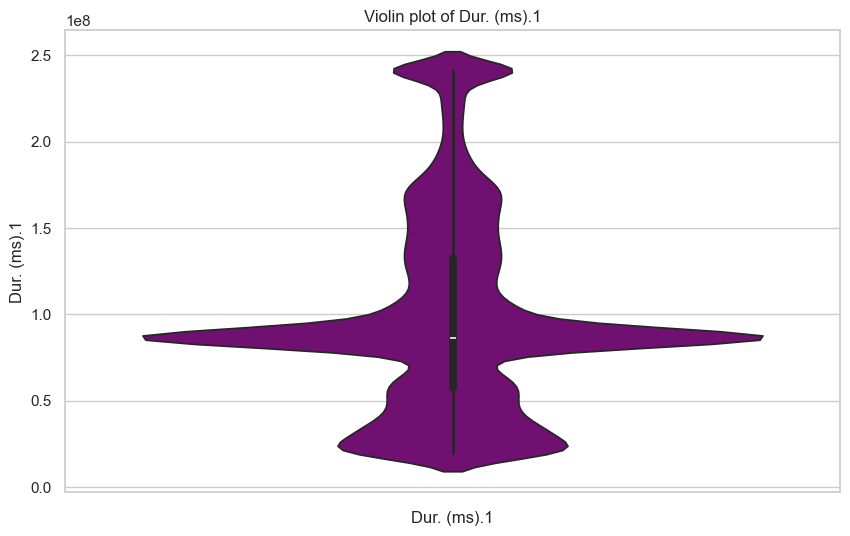

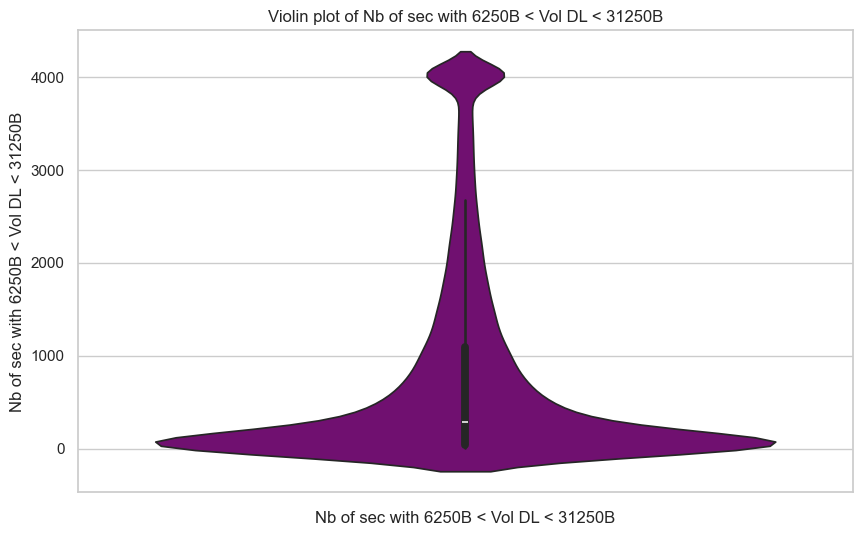

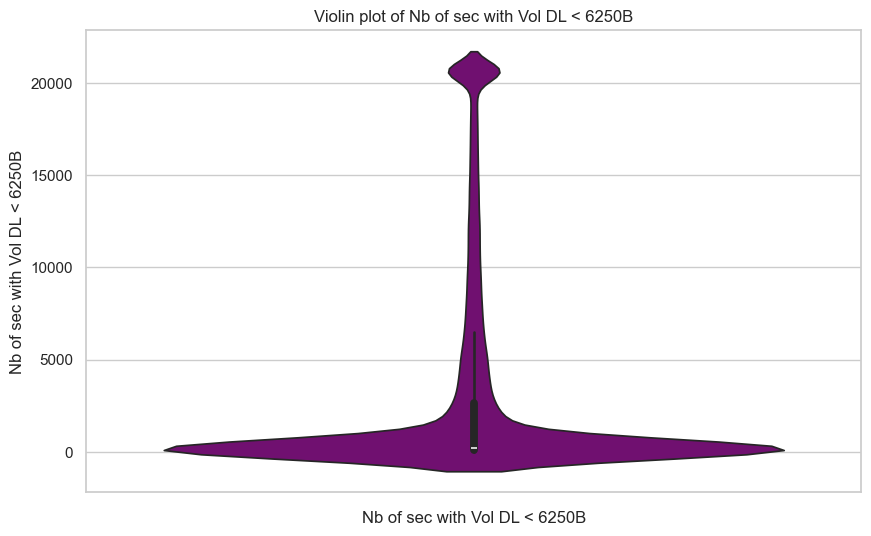

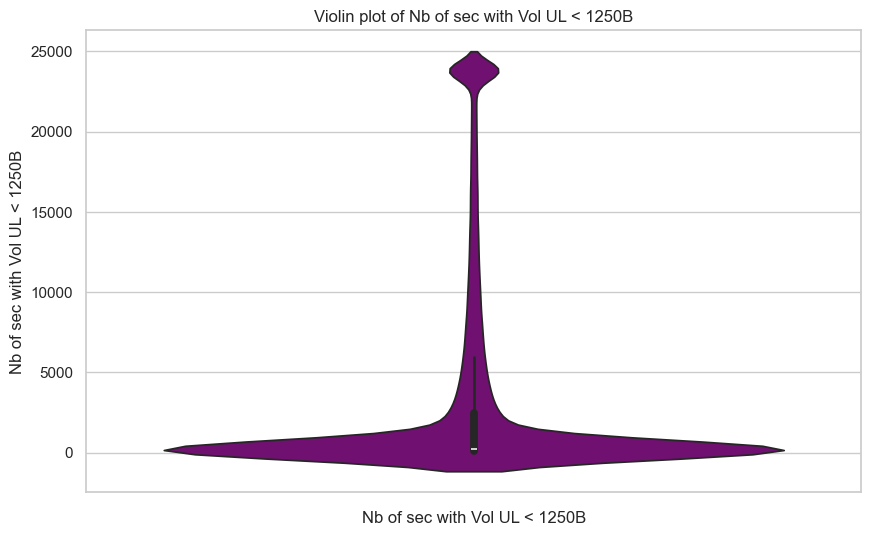

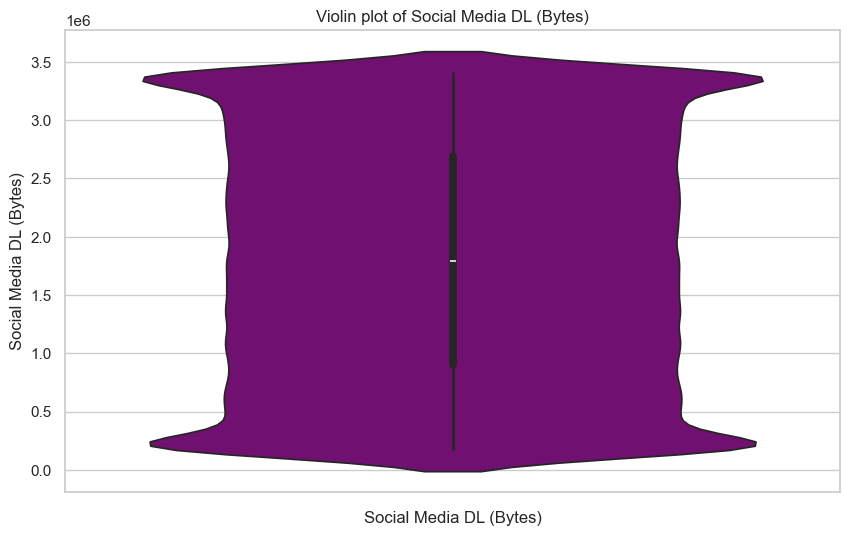

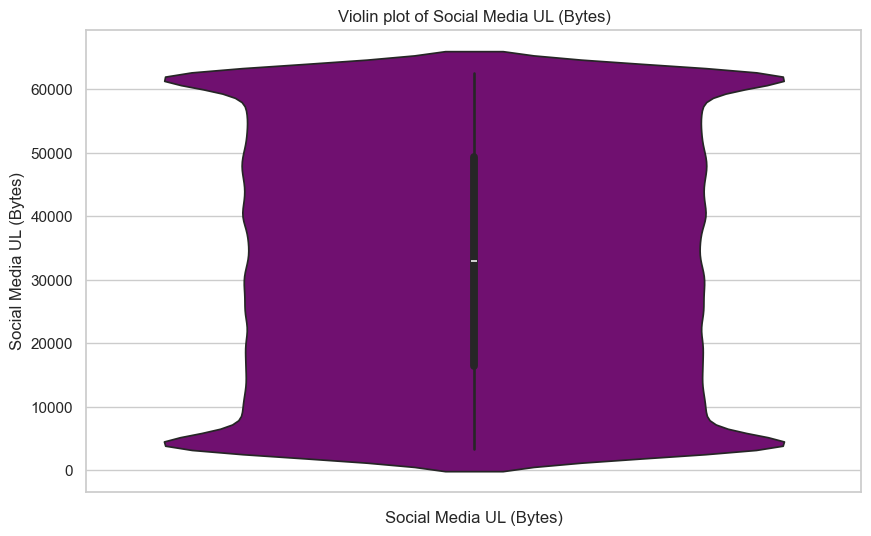

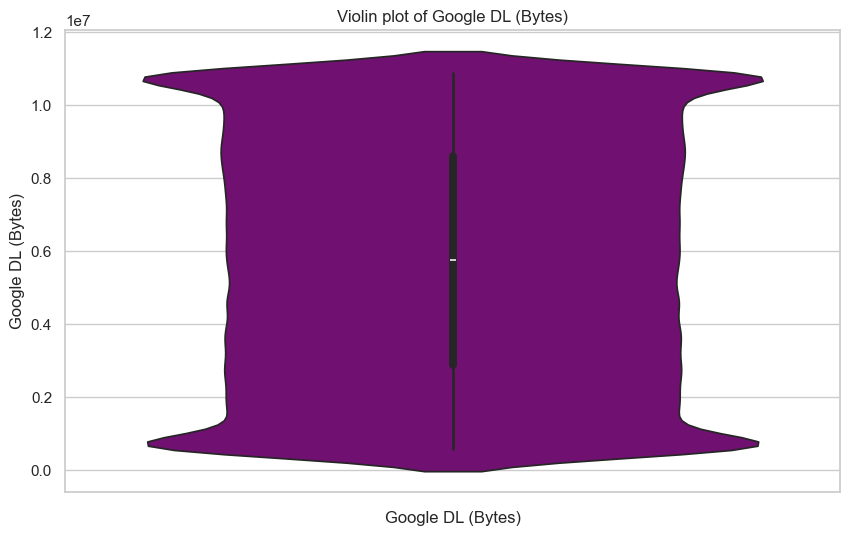

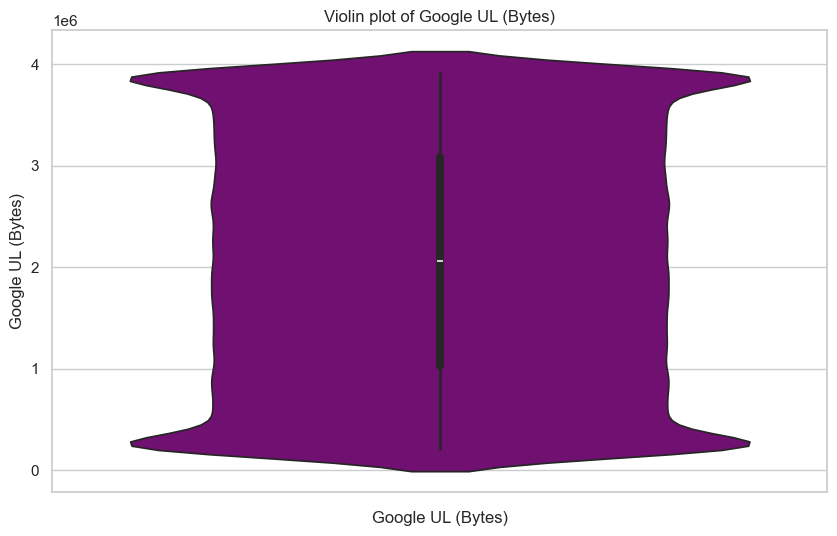

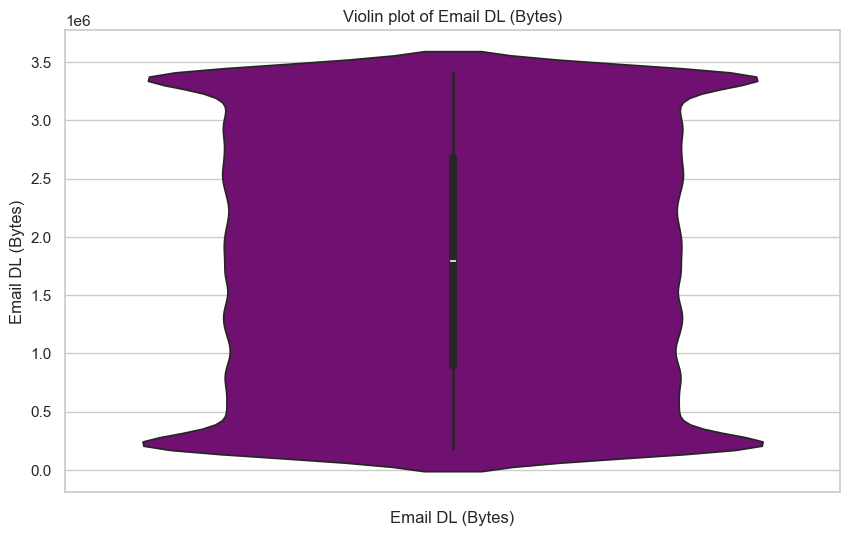

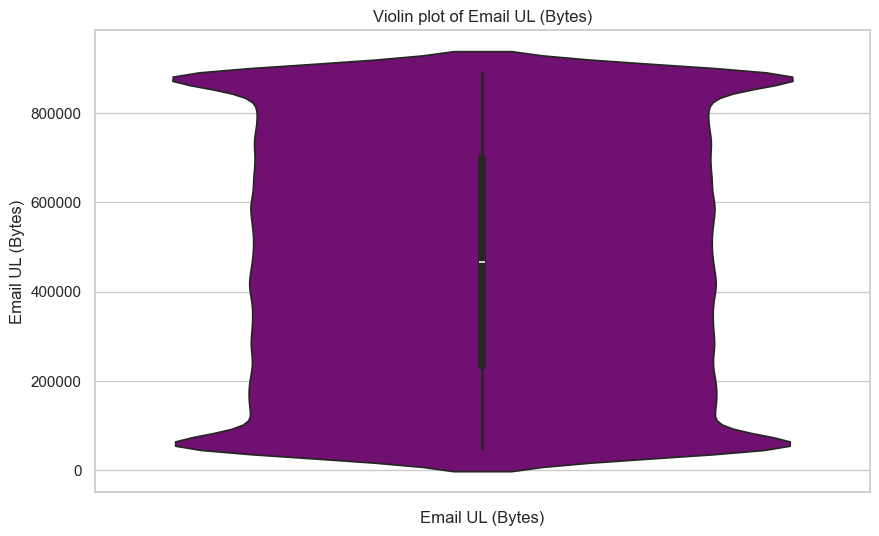

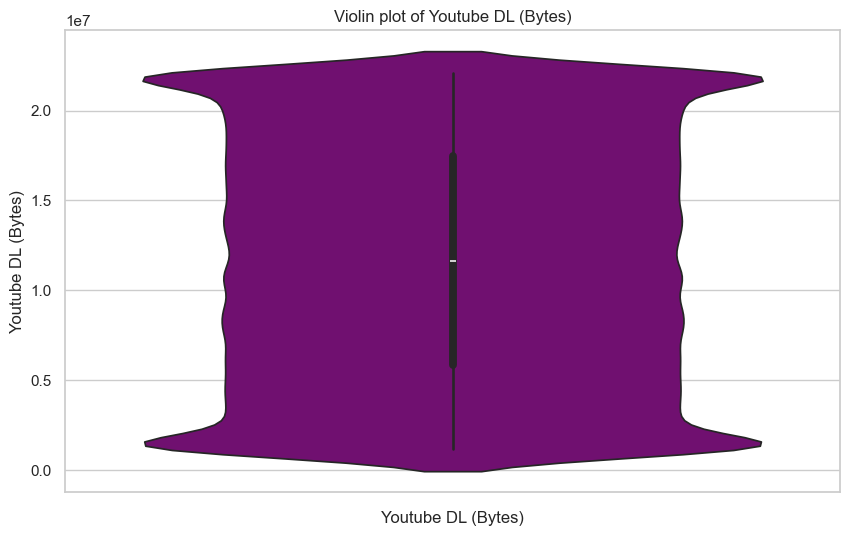

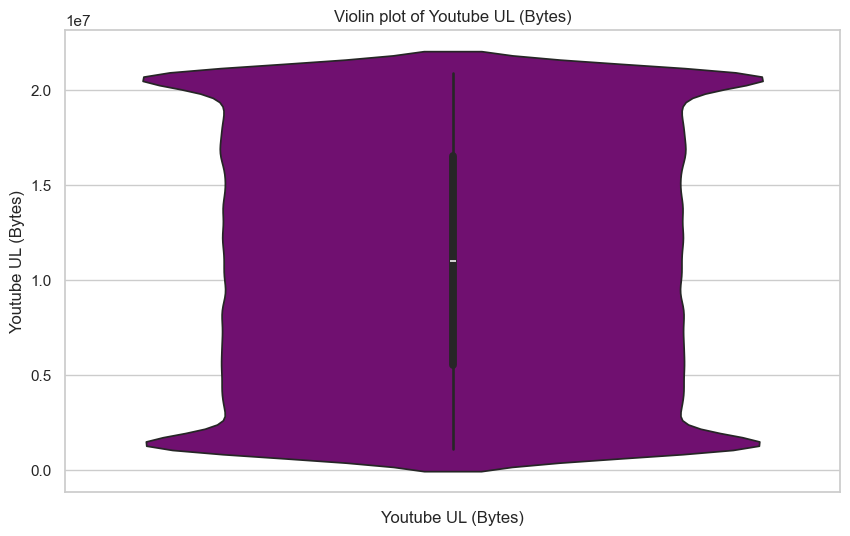

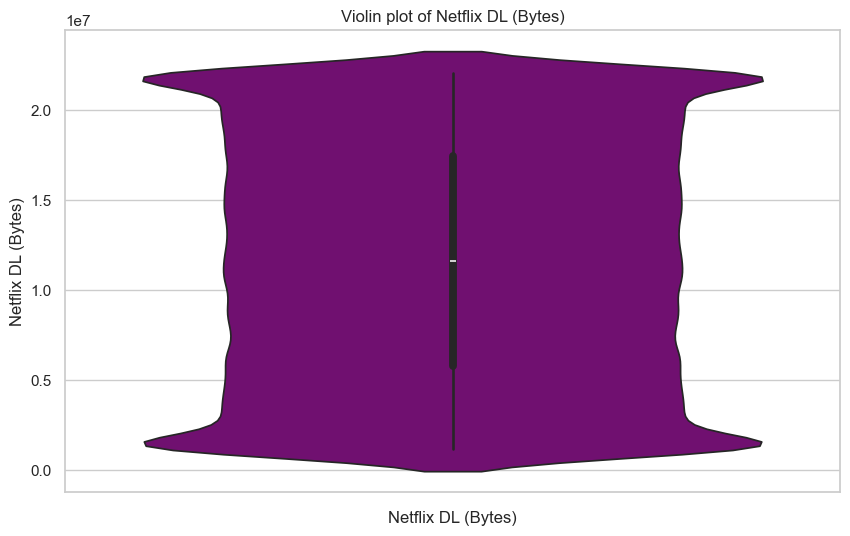

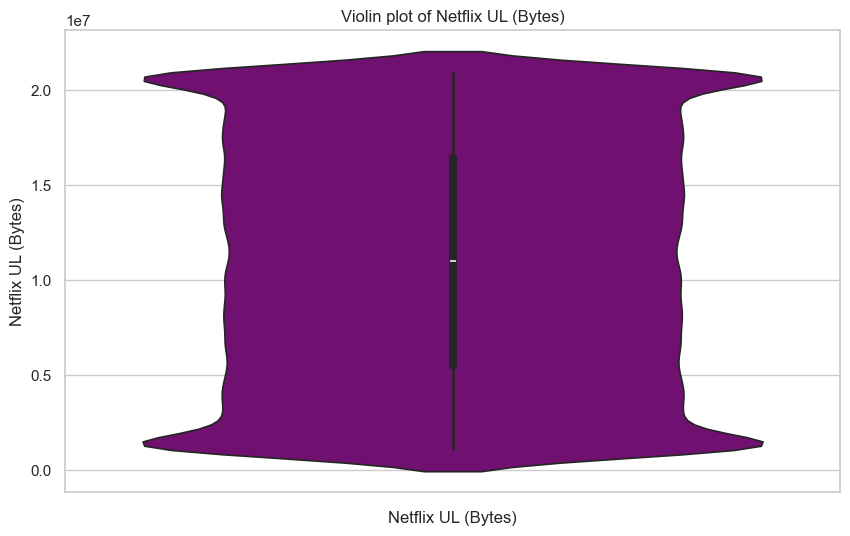

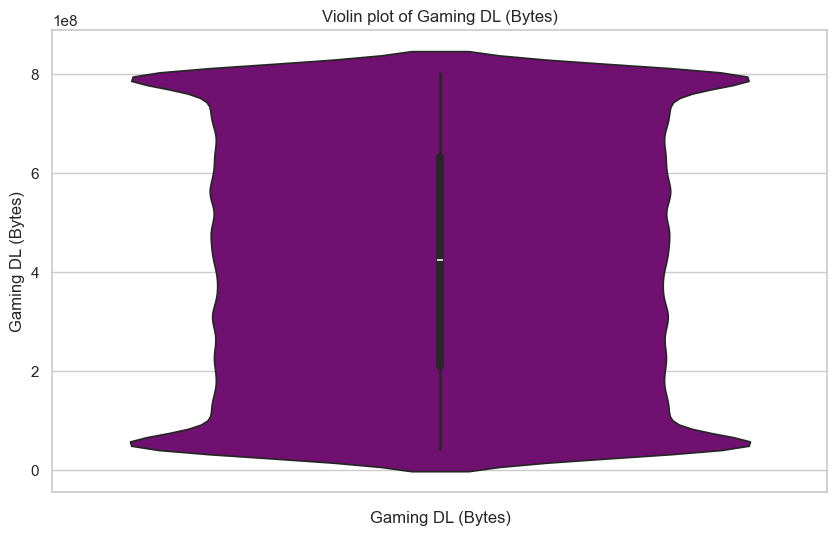

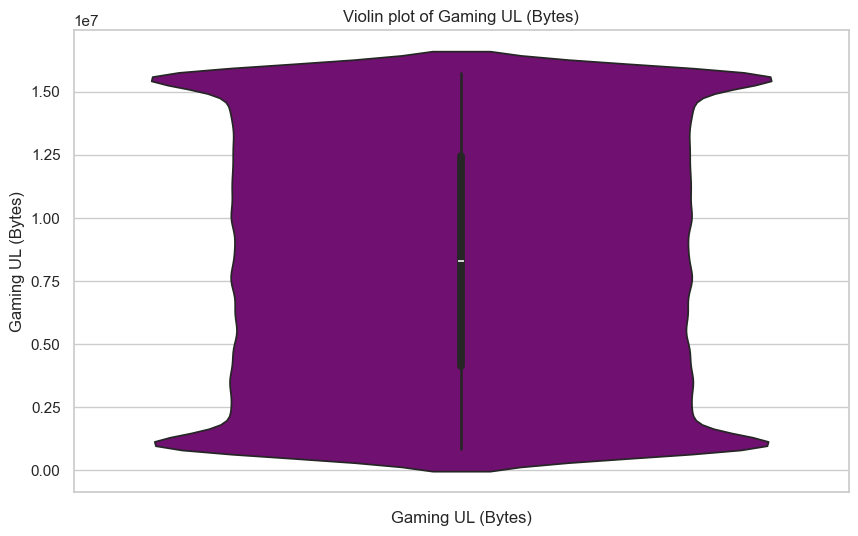

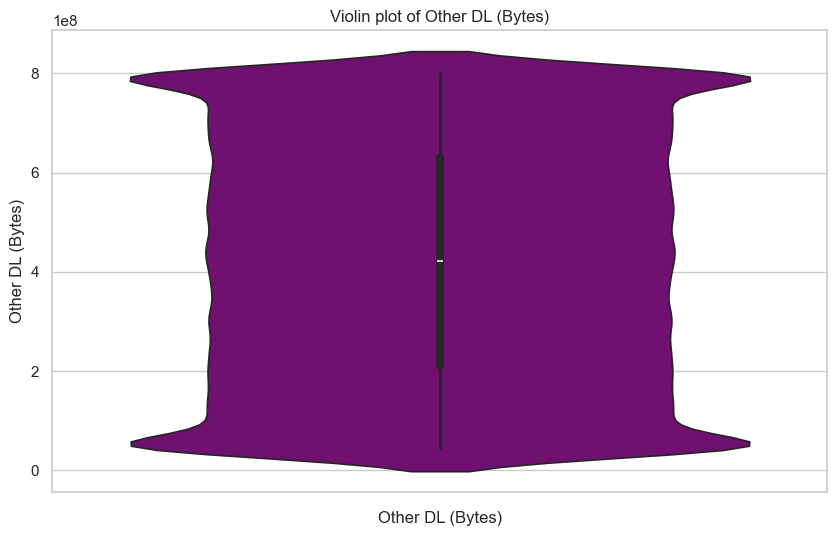

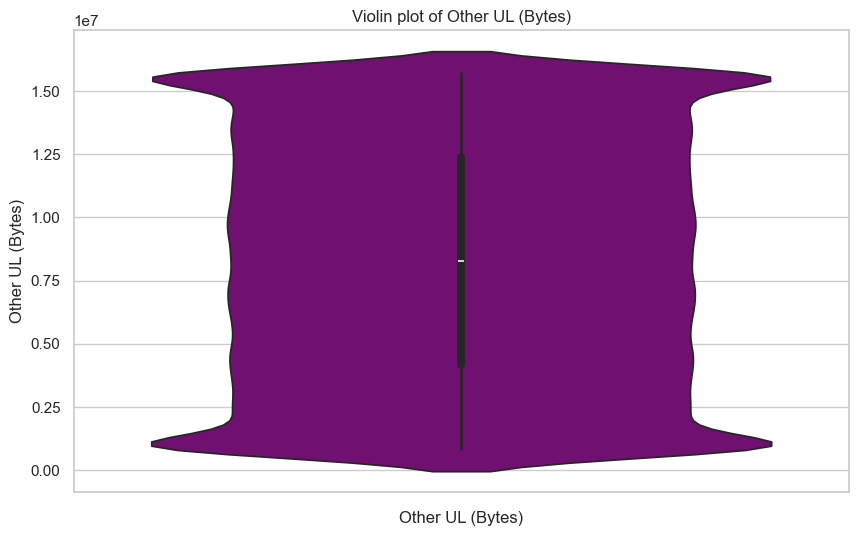

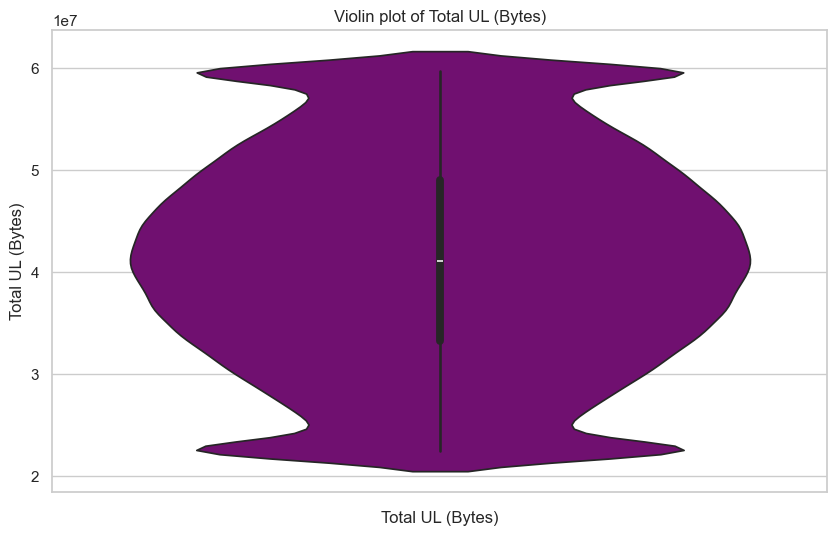

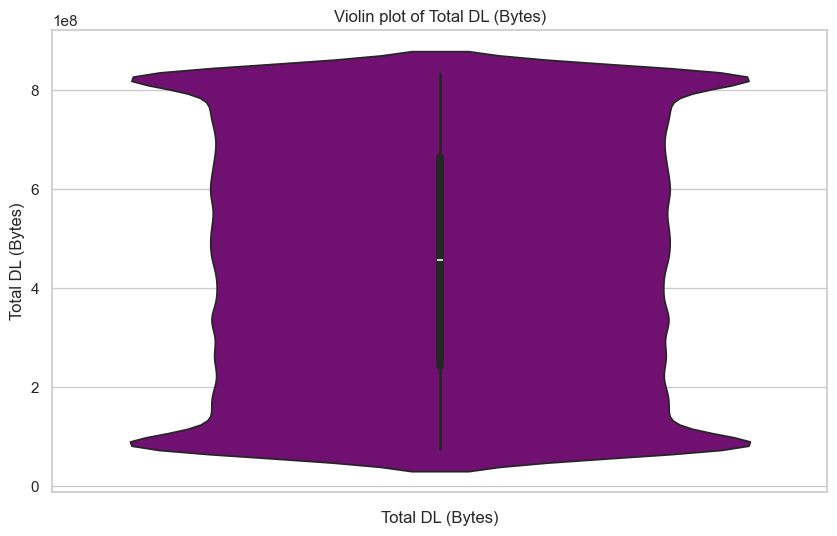

In [5]:
plot_graphical_analysis(cleaned_data_tel)


### bivariate analysis

In [9]:
print(cleaned_data_tel.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube U

    Application  Total Data Usage (MB)
0  Social Media           2.742394e+05
1       Youtube           3.396545e+06
2       Netflix           3.394314e+06
3        Google           1.171102e+06
4         Email           3.388676e+05
5        Gaming           6.455040e+07
6         Other           6.440523e+07


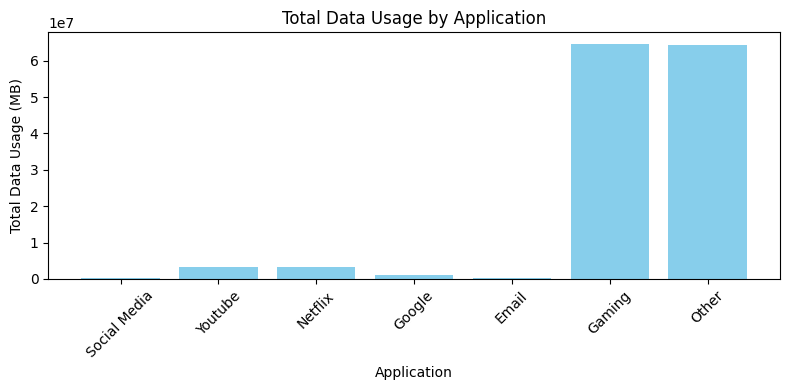

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the applications to calculate total data usage (DL + UL)
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']

# Loop through each application and calculate the total data usage (DL + UL)
for app in applications:
    transformed_data_tel[f'{app} Total'] = transformed_data_tel[f'{app} DL (MB)'] + transformed_data_tel[f'{app} UL (MB)']

# Create a dictionary to summarize total data usage for each application
total_usage = {app: transformed_data_tel[f'{app} Total'].sum() for app in applications}

# Convert the dictionary into a DataFrame for visualization
total_usage_transformed_telecom_data = pd.DataFrame(list(total_usage.items()), columns=['Application', 'Total Data Usage (MB)'])

# Display the DataFrame
print(total_usage_transformed_telecom_data)


# Plot the total data usage for each application
plt.figure(figsize=(8, 4))
plt.bar(total_usage_transformed_telecom_data['Application'], total_usage_transformed_telecom_data['Total Data Usage (MB)'], color='skyblue')
plt.title('Total Data Usage by Application')
plt.xlabel('Application')
plt.ylabel('Total Data Usage (MB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Step 1: Add a column for total data volume (DL + UL) per application for each session
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
for app in applications:
    transformed_data_tel[f'{app} Total'] = transformed_data_tel[f'{app} DL (MB)'] + transformed_data_tel[f'{app} UL (MB)']

# Step 2: Aggregate the data per user (IMSI)
user_behavior = transformed_data_tel.groupby('IMSI').agg(
    number_of_xdr_sessions=('Bearer Id', 'count'),               # Assuming 'Bearer Id' is session identifier
    total_session_duration=('Dur. (sec)', 'sum'),                # Sum of session durations
    total_social_media_data=('Social Media Total', 'sum'),       # Total data volume for Social Media
    total_youtube_data=('Youtube Total', 'sum'),                 # Total data volume for YouTube
    total_netflix_data=('Netflix Total', 'sum'),                 # Total data volume for Netflix
    total_google_data=('Google Total', 'sum'),                   # Total data volume for Google
    total_email_data=('Email Total', 'sum'),                     # Total data volume for Email
    total_gaming_data=('Gaming Total', 'sum'),                   # Total data volume for Gaming
    total_other_data=('Other Total', 'sum')                      # Total data volume for Other
)

# Step 3: Calculate total download and upload data per user
# Download data
user_behavior['total_download_data'] = transformed_data_tel.groupby('IMSI')[[
    'Social Media DL (MB)', 'Youtube DL (MB)', 'Netflix DL (MB)',
    'Google DL (MB)', 'Email DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)'
]].sum().sum(axis=1)

# Upload data
user_behavior['total_upload_data'] = transformed_data_tel.groupby('IMSI')[[
    'Social Media UL (MB)', 'Youtube UL (MB)', 'Netflix UL (MB)',
    'Google UL (MB)', 'Email UL (MB)', 'Gaming UL (MB)', 'Other UL (MB)'
]].sum().sum(axis=1)

# Step 4: Display the aggregated user behavior data
user_behavior.head()

number_of_xdr_sessions  total_session_duration  \
IMSI                                                           
2.040471e+14                       1                 869.844   
2.040808e+14                       1                 877.385   
2.082001e+14                       1                  86.019   
2.082001e+14                       1                  86.254   
2.082001e+14                       2                 573.923   

              total_social_media_data  total_youtube_data  total_netflix_data  \
IMSI                                                                            
2.040471e+14                 1.546088           40.940710           28.846230   
2.040808e+14                 0.715224           11.959905           26.592300   
2.082001e+14                 3.122781           19.882439           31.830562   
2.082001e+14                 2.577104           25.657632           27.785852   
2.082001e+14                 3.426716           13.840201           57.343415   

              total_google_data  total_email_data  total_gaming_data  \
IMSI                                                                   
2.040471e+14           9.218647          3.330974          43.070260   
2.040808e+14          10.438660          1.520771         178.048738   
2.082001e+14           1.624662          3.657501           9.124516   
2.082001e+14          13.811478          3.855734         344.105897   
2.082001e+14          11.665887          5.564462         917.684766   

              total_other_data  total_download_data  total_upload_data  
IMSI                                                                    
2.040471e+14        401.360457           467.857317          60.456049  
2.040808e+14        470.526473           662.506156          37.295915  
2.082001e+14        515.973704           531.421507          53.794658  
2.082001e+14        309.610741           693.821166          33.583272  
2.082001e+14       1079.435419          2017.635862          71.325004

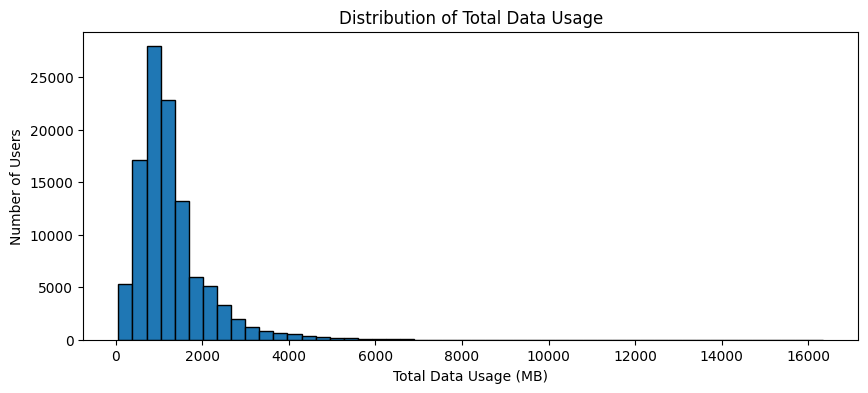

<Figure size 500x800 with 0 Axes>

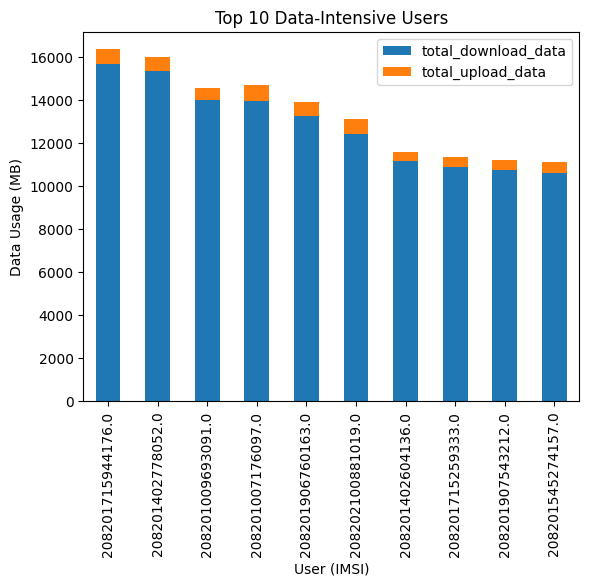

In [23]:
# Plot histogram of total data usage
plt.figure(figsize=(10, 4))
plt.hist(user_behavior['total_download_data'] + user_behavior['total_upload_data'], bins=50, edgecolor='k')
plt.xlabel('Total Data Usage (MB)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Data Usage')
plt.show()

top_users = user_behavior.sort_values(by='total_download_data', ascending=False).head(10)
plt.figure(figsize=(5, 8))
top_users[['total_download_data', 'total_upload_data']].plot(kind='bar', stacked=True)
plt.xlabel('User (IMSI)')
plt.ylabel('Data Usage (MB)')
plt.title('Top 10 Data-Intensive Users')
plt.show()

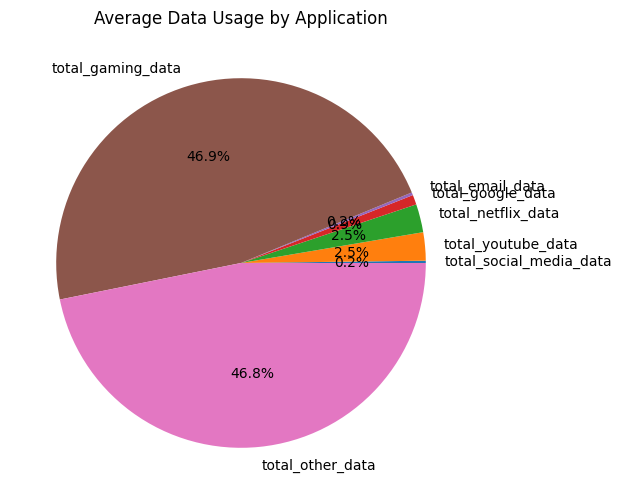

In [24]:
# Calculate average data usage by application
avg_data_by_app = user_behavior[['total_social_media_data', 'total_youtube_data', 'total_netflix_data',
                                 'total_google_data', 'total_email_data', 'total_gaming_data', 'total_other_data']].mean()

plt.figure(figsize=(10, 6))
avg_data_by_app.plot(kind='pie', autopct='%1.1f%%')
plt.title('Average Data Usage by Application')
plt.ylabel('')  # Hide y-label
plt.show()

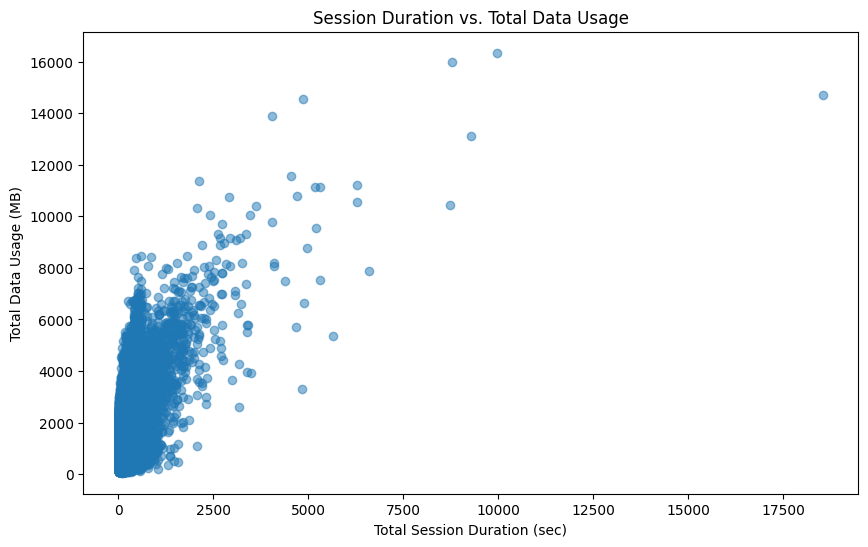

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(user_behavior['total_session_duration'], 
            user_behavior['total_download_data'] + user_behavior['total_upload_data'], alpha=0.5)
plt.xlabel('Total Session Duration (sec)')
plt.ylabel('Total Data Usage (MB)')
plt.title('Session Duration vs. Total Data Usage')
plt.show()

### Correlation Matrix

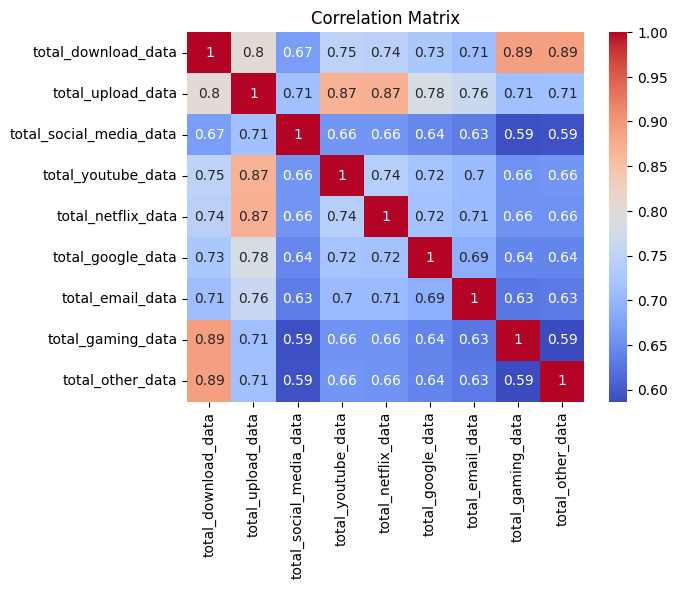

In [26]:
# Compute correlation matrix
correlation_matrix = user_behavior[['total_download_data', 'total_upload_data',
                                    'total_social_media_data', 'total_youtube_data',
                                    'total_netflix_data', 'total_google_data',
                                    'total_email_data', 'total_gaming_data',
                                    'total_other_data']].corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## PCA Analysis

In [27]:
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_behavior[['total_download_data', 'total_upload_data',
                                                  'total_social_media_data', 'total_youtube_data',
                                                  'total_netflix_data', 'total_google_data',
                                                  'total_email_data', 'total_gaming_data',
                                                  'total_other_data']])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')

Explained Variance Ratio: [0.74076028 0.06165813]


In [28]:
pca_df

PC1       PC2
0      -0.935340 -1.133314
1      -1.780897 -0.044242
2      -1.234917 -0.873118
3      -0.778318 -0.775338
4       1.720799  0.701745
...          ...       ...
107260 -1.289553  1.089291
107261 -0.387329  0.106428
107262 -1.518370 -0.135804
107263 -1.047539  1.202208
107264 -0.717606  0.383924

[107265 rows x 2 columns]

## User Engagement Analysis

C:\Users\fikad\AppData\Local\Temp\ipykernel_10660\2488211069.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMSI', y='session_frequency', data=top_10_users, palette='Blues_d')


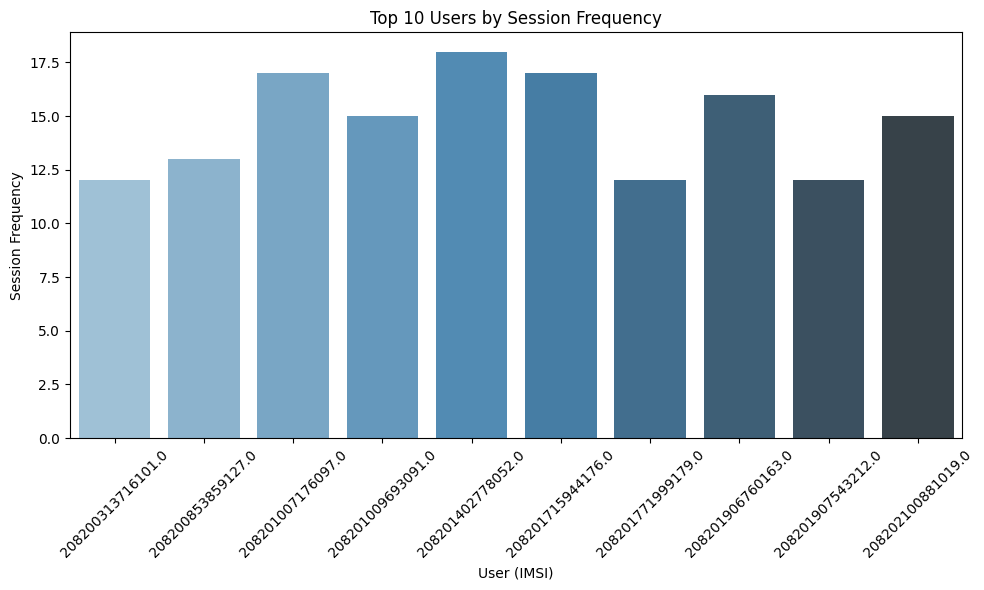

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate session frequency (number of sessions) for each user (IMSI)
user_engagement = transformed_data_tel.groupby('IMSI').agg(
    session_frequency=('Bearer Id', 'count')  # Assuming 'Bearer Id' is the session identifier
)
# Calculate total session duration per user
user_engagement['total_session_duration'] = transformed_data_tel.groupby('IMSI')['Dur. (sec)'].sum()
# Optionally, calculate the average session duration
user_engagement['avg_session_duration'] =transformed_data_tel.groupby('IMSI')['Dur. (sec)'].mean()
# Calculate total traffic (download + upload)
user_engagement['total_traffic'] = user_behavior['total_download_data'] + user_behavior['total_upload_data']

# Step 2: Sort the data by session frequency and get the top 10 users
top_10_users = user_engagement.sort_values(by='session_frequency', ascending=False).head(10)

# Step 3: Plot the top 10 users based on session frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='IMSI', y='session_frequency', data=top_10_users, palette='Blues_d')
plt.title('Top 10 Users by Session Frequency')
plt.xlabel('User (IMSI)')
plt.ylabel('Session Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\fikad\AppData\Local\Temp\ipykernel_10660\726458874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMSI', y='total_session_duration', data=top_10_users, palette='Blues_d')


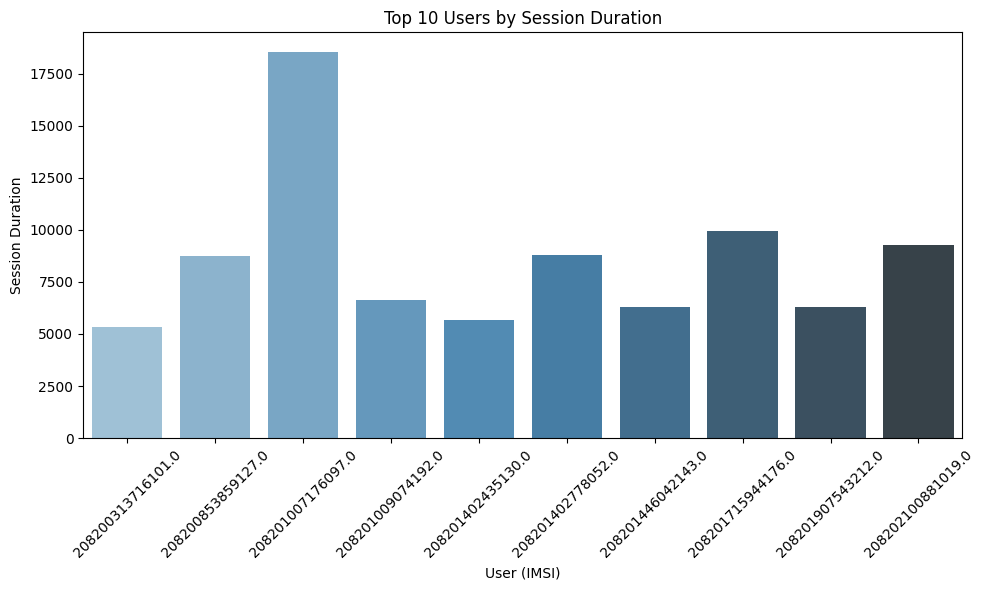

In [31]:
# Step 2: Sort the data by session frequency and get the top 10 users
top_10_users = user_engagement.sort_values(by='total_session_duration', ascending=False).head(10)

# Step 3: Plot the top 10 users based on session frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='IMSI', y='total_session_duration', data=top_10_users, palette='Blues_d')
plt.title('Top 10 Users by Session Duration')
plt.xlabel('User (IMSI)')
plt.ylabel('Session Duration')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the metrics
scaler = MinMaxScaler()
user_engagement[['session_frequency', 'total_session_duration', 'total_traffic']] = scaler.fit_transform(
    user_engagement[['session_frequency', 'total_session_duration', 'total_traffic']]
)

# Create an engagement score (weighted sum of metrics)
user_engagement['engagement_score'] = (
    0.4 * user_engagement['session_frequency'] +
    0.3 * user_engagement['total_session_duration'] +
    0.3 * user_engagement['total_traffic']
)

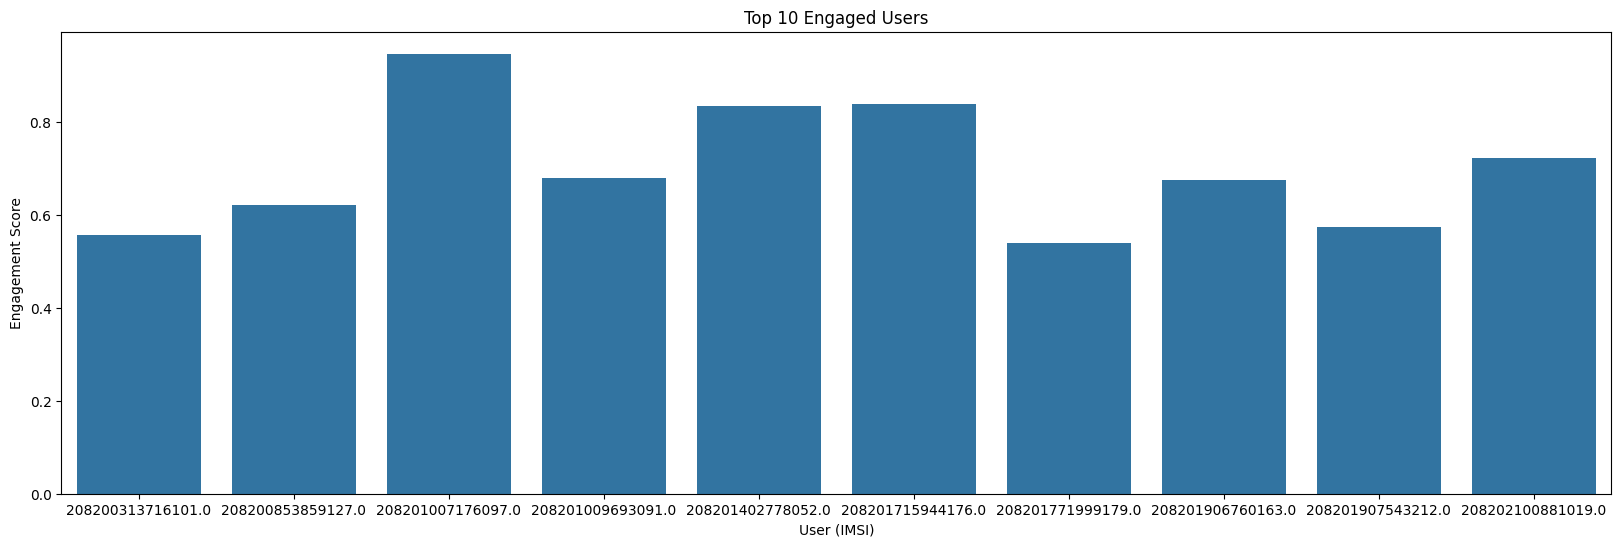

In [33]:
# Sort users by engagement score to find the most engaged users
top_engaged_users = user_engagement.sort_values(by='engagement_score', ascending=False).head(10)



plt.figure(figsize=(20, 6))
sns.barplot(x=top_engaged_users.index, y=top_engaged_users['engagement_score'])
plt.title('Top 10 Engaged Users')
plt.xlabel('User (IMSI)')
plt.ylabel('Engagement Score')
plt.show()

In [34]:
# Aggregate metrics per MSISDN
# Report top 10 customers per engagement metric
top_10_session_frequency = user_engagement.sort_values(by='session_frequency', ascending=False).head(10)
top_10_session_duration = user_engagement.sort_values(by='total_session_duration', ascending=False).head(10)
top_10_total_traffic = user_engagement.sort_values(by='total_traffic', ascending=False).head(10)

# Display top 10 customers for each metric
print("Top 10 Customers by Session Frequency:", top_10_session_frequency)
print("Top 10 Customers by Total Session Duration:", top_10_session_duration)
print("Top 10 Customers by Total Traffic:", top_10_total_traffic)

Top 10 Customers by Session Frequency:               session_frequency  total_session_duration  avg_session_duration  \
IMSI                                                                            
2.082014e+14           1.000000                0.473660            488.440389   
2.082010e+14           0.944444                1.000000           1091.397294   
2.082017e+14           0.944444                0.537012            586.288118   
2.082019e+14           0.888889                0.217198            252.214250   
2.082010e+14           0.833333                0.261978            324.396467   
2.082021e+14           0.833333                0.499945            618.628933   
2.082009e+14           0.722222                0.471125            672.685692   
2.082003e+14           0.666667                0.286550            443.472250   
2.082018e+14           0.666667                0.253220            391.959667   
2.082019e+14           0.666667                0.338640            523

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(user_engagement[['session_frequency', 'total_session_duration', 'total_traffic']])

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['cluster'] = kmeans.fit_predict(normalized_metrics)

# Assign the cluster labels back to the DataFrame
user_engagement['cluster'] = kmeans.labels_

In [36]:
# Compute aggregate metrics for each cluster
cluster_summary = user_engagement.groupby('cluster').agg({
    'session_frequency': ['min', 'max', 'mean', 'sum'],
    'total_session_duration': ['min', 'max', 'mean', 'sum'],
    'total_traffic': ['min', 'max', 'mean', 'sum']
})

# Display cluster summary
print(cluster_summary)

        session_frequency                                   \
                      min       max      mean          sum   
cluster                                                      
0                0.000000  0.111111  0.055935  4416.055556   
1                0.111111  1.000000  0.244085   904.333333   
2                0.055556  0.222222  0.120172  2957.444444   

        total_session_duration                                 total_traffic  \
                           min       max      mean         sum           min   
cluster                                                                        
0                     0.000000  0.055811  0.005144  406.094158      0.000000   
1                     0.003206  1.000000  0.034558  128.036645      0.064534   
2                     0.000598  0.084451  0.010914  268.586694      0.018530   

                                          
              max      mean          sum  
cluster                                   
0        0.144816

In [37]:
cluster_summary

session_frequency                                   \
                      min       max      mean          sum   
cluster                                                      
0                0.000000  0.111111  0.055935  4416.055556   
1                0.111111  1.000000  0.244085   904.333333   
2                0.055556  0.222222  0.120172  2957.444444   

        total_session_duration                                 total_traffic  \
                           min       max      mean         sum           min   
cluster                                                                        
0                     0.000000  0.055811  0.005144  406.094158      0.000000   
1                     0.003206  1.000000  0.034558  128.036645      0.064534   
2                     0.000598  0.084451  0.010914  268.586694      0.018530   

                                          
              max      mean          sum  
cluster                                   
0        0.144816  0.052793  4167.995419  
1        1.000000  0.249872   925.777067  
2        0.274568  0.119312  2936.258111

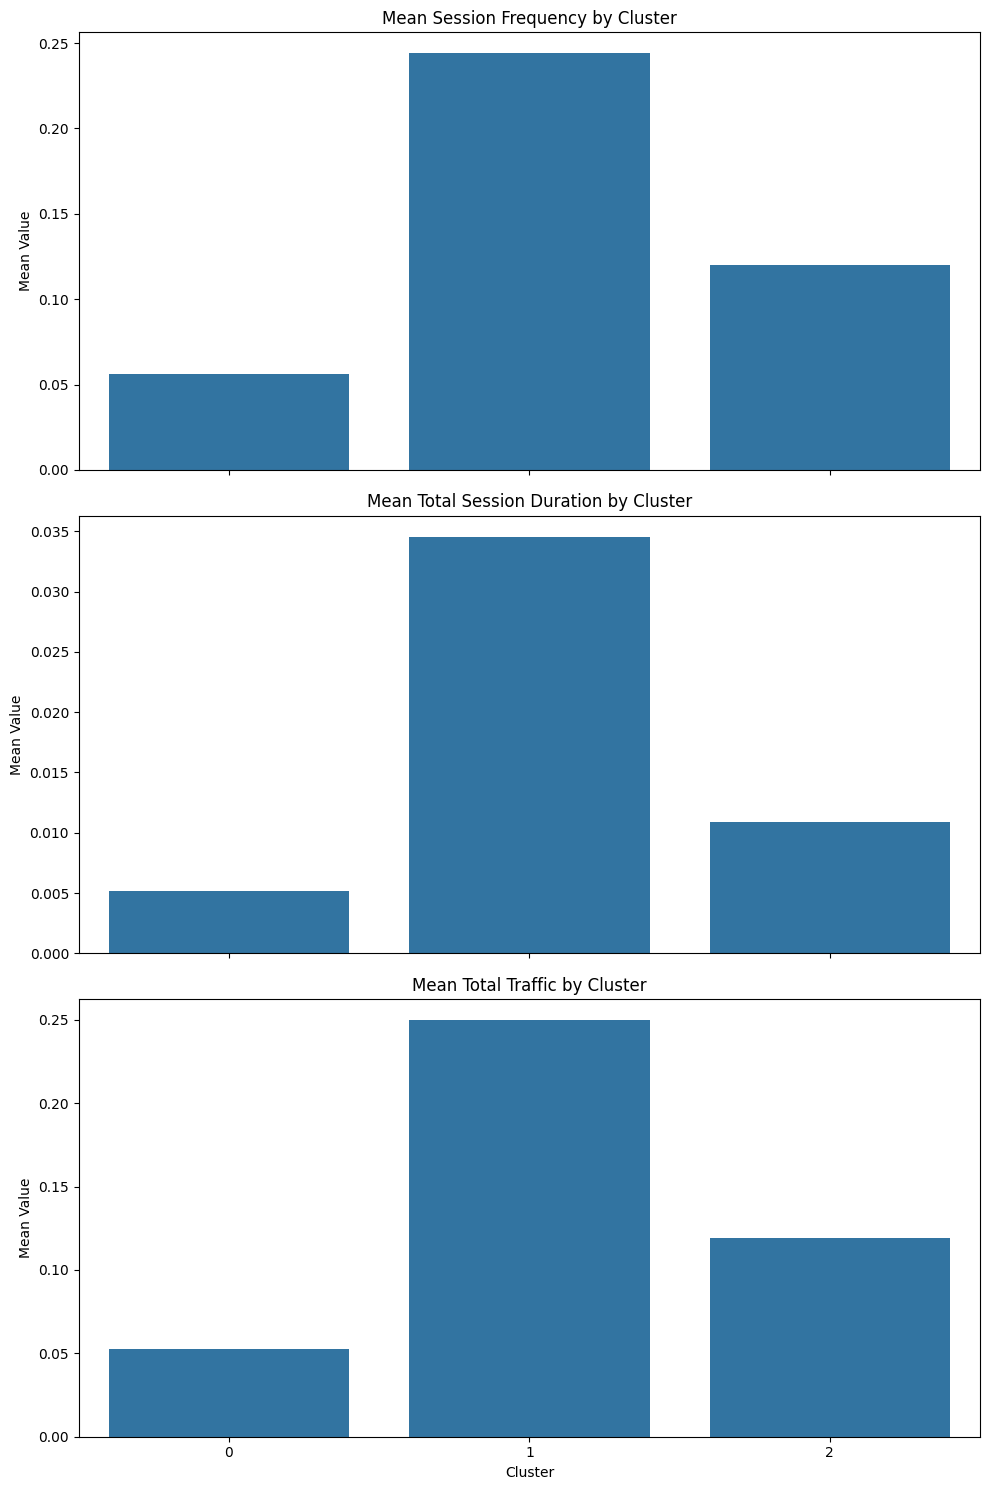

In [38]:


# Reset index to use cluster as a column
cluster_summary_df = cluster_summary.copy().reset_index()

# Plotting the mean values for each metric across clusters
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

metrics = ['session_frequency', 'total_session_duration', 'total_traffic']

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(x='cluster', y=(metric, 'mean'), data=cluster_summary_df, ax=ax)
    ax.set_title(f'Mean {metric.replace("_", " ").title()} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Mean Value')

plt.tight_layout()
plt.show()

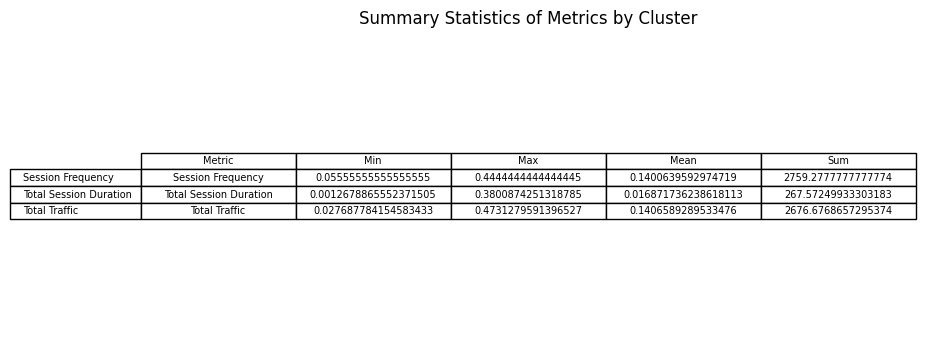

In [39]:
# Creating a DataFrame for the summary statistics table
summary_df = pd.DataFrame({
    'Metric': ['Session Frequency', 'Total Session Duration', 'Total Traffic'],
    'Min': [cluster_summary[('session_frequency', 'min')].mean(), 
            cluster_summary[('total_session_duration', 'min')].mean(), 
            cluster_summary[('total_traffic', 'min')].mean()],
    'Max': [cluster_summary[('session_frequency', 'max')].mean(), 
            cluster_summary[('total_session_duration', 'max')].mean(), 
            cluster_summary[('total_traffic', 'max')].mean()],
    'Mean': [cluster_summary[('session_frequency', 'mean')].mean(), 
             cluster_summary[('total_session_duration', 'mean')].mean(), 
             cluster_summary[('total_traffic', 'mean')].mean()],
    'Sum': [cluster_summary[('session_frequency', 'sum')].mean(), 
            cluster_summary[('total_session_duration', 'sum')].mean(), 
            cluster_summary[('total_traffic', 'sum')].mean()]
})

# Plotting table
fig, ax = plt.subplots(figsize=(10, 4)) # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 rowLabels=summary_df['Metric'],
                 cellLoc='center', 
                 loc='center')
plt.title('Summary Statistics of Metrics by Cluster')
plt.show()

In [44]:
# List of application columns for UL and DL traffic
applications_ul = ['Social Media UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)',
                   'Google UL (Bytes)', 'Email UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']

applications_dl = ['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
                   'Google DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Create total traffic for each application by summing UL and DL
for app_ul, app_dl in zip(applications_ul, applications_dl):
    app_name = app_ul.split()[0]  # Extracts app name like 'Social Media'
    user_engagement[f'{app_name.lower()}_total_traffic'] = data_tel.groupby('IMSI')[app_ul].sum() + data_tel.groupby('IMSI')[app_dl].sum()

# Derive the top 10 most engaged users per application
top_10_per_app = {}
for app_ul in applications_ul:
    app_name = app_ul.split()[0]  # Get the app name
    top_10_per_app[app_name] = user_engagement.sort_values(by=f'{app_name.lower()}_total_traffic', ascending=False).head(10)

# Display the top 10 users for each application
for app, top_users in top_10_per_app.items():
    print(f"Top 10 users for {app}:")
    print(top_users)
    print("\n")

Top 10 users for Social:
              session_frequency  total_session_duration  avg_session_duration  \
IMSI                                                                            
2.082014e+14           1.000000                0.473660            488.440389   
2.082021e+14           0.833333                0.499945            618.628933   
2.082019e+14           0.888889                0.217198            252.214250   
2.082017e+14           0.944444                0.537012            586.288118   
2.082010e+14           0.944444                1.000000           1091.397294   
2.082009e+14           0.722222                0.471125            672.685692   
2.082017e+14           0.666667                0.218504            338.304333   
2.082018e+14           0.611111                0.032548             55.527364   
2.082019e+14           0.666667                0.338640            523.980083   
2.082019e+14           0.500000                0.164701            340.197667   

  

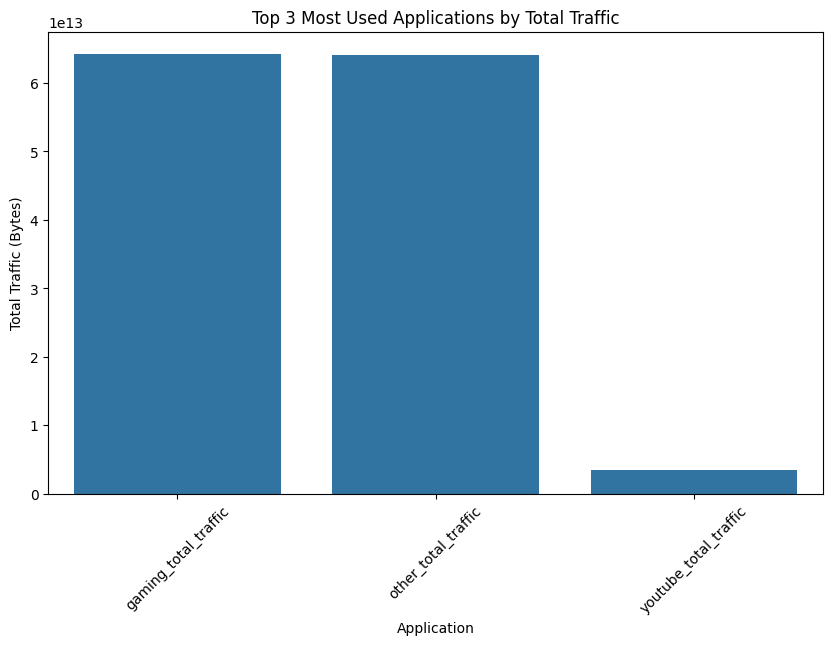

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of updated traffic columns
traffic_columns = [f'{app.split()[0].lower()}_total_traffic' for app in applications_ul]

# Compute total traffic per application
application_totals = user_engagement[traffic_columns].sum()

# Sort and get top 3 most used applications
top_3_apps = application_totals.sort_values(ascending=False).head(3)

# Plot the top 3 most used applications
plt.figure(figsize=(10,6))
sns.barplot(x=top_3_apps.index, y=top_3_apps.values)
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')  # Ensure the unit is accurate
plt.xticks(rotation=45)
plt.show()

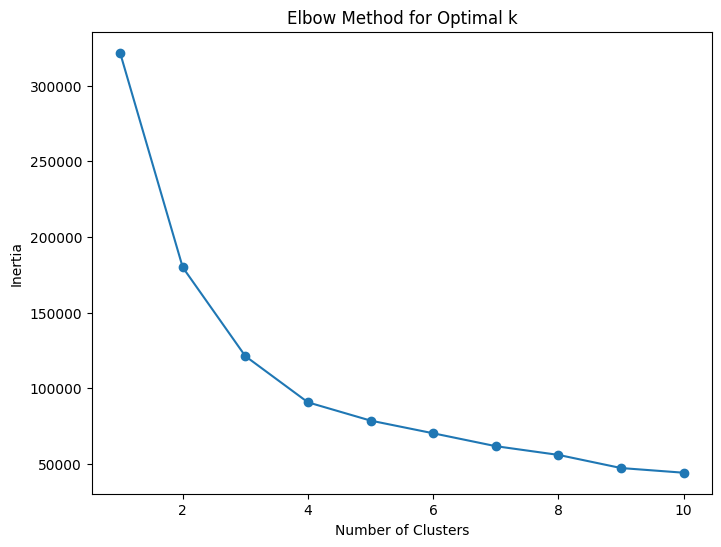

In [46]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Test different values of k using the elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [47]:
# After identifying the optimal k (e.g., k=4), run k-means
optimal_k = 3 # Replace with the value you find from the elbow method
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
user_engagement['cluster_optimal'] = kmeans_optimal.fit_predict(normalized_metrics)

# Display the distribution of users across the clusters
print(user_engagement['cluster_optimal'].value_counts())

cluster_optimal
0    78950
2    24610
1     3705
Name: count, dtype: int64
